# 🥖 빵

당신은 매일 아침 동네 빵집에서 식빵을 구입해왔다.  

이 식빵의 무게는 500g이라고 표시되어 있다. 하지만 당신은 자신이 구매하는 빵이 500g이 맞는 지 의구심이 들기 시작한다.  
그래서 1개월 간 식빵을 사온 뒤 매일 무게를 기록하였고, 그 결과는 bread 데이터셋으로 저장하였다.  

25일간 측정한 빵의 평균 무게는 480g이었다. 이 값을 가지고 식빵의 무게가 500g이 되지 않는다며 베이커리를 찾아가 컴플레인을 해야 할까?

In [148]:
from hossam import load_data
from scipy.stats import t, ttest_1samp, normaltest, bartlett, levene, ttest_ind, ttest_rel, mannwhitneyu, wilcoxon
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from math import sqrt, log10
from pandas import melt, DataFrame, pivot_table
from statannotations.Annotator import Annotator

In [2]:
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

In [3]:
origin=load_data('bread')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab10_/bread.xlsx
[desc] 매일 아침 동네 빵집에서 식빵을 구입해 무게를 기록한 데이터
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (25, 1)
행 개수 : 25개
열 개수 : 1개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   무게      25 non-null     int64
dtypes: int64(1)
memory usage: 332.0 bytes
None


,무게
0,482
1,479
2,485
3,474
4,479


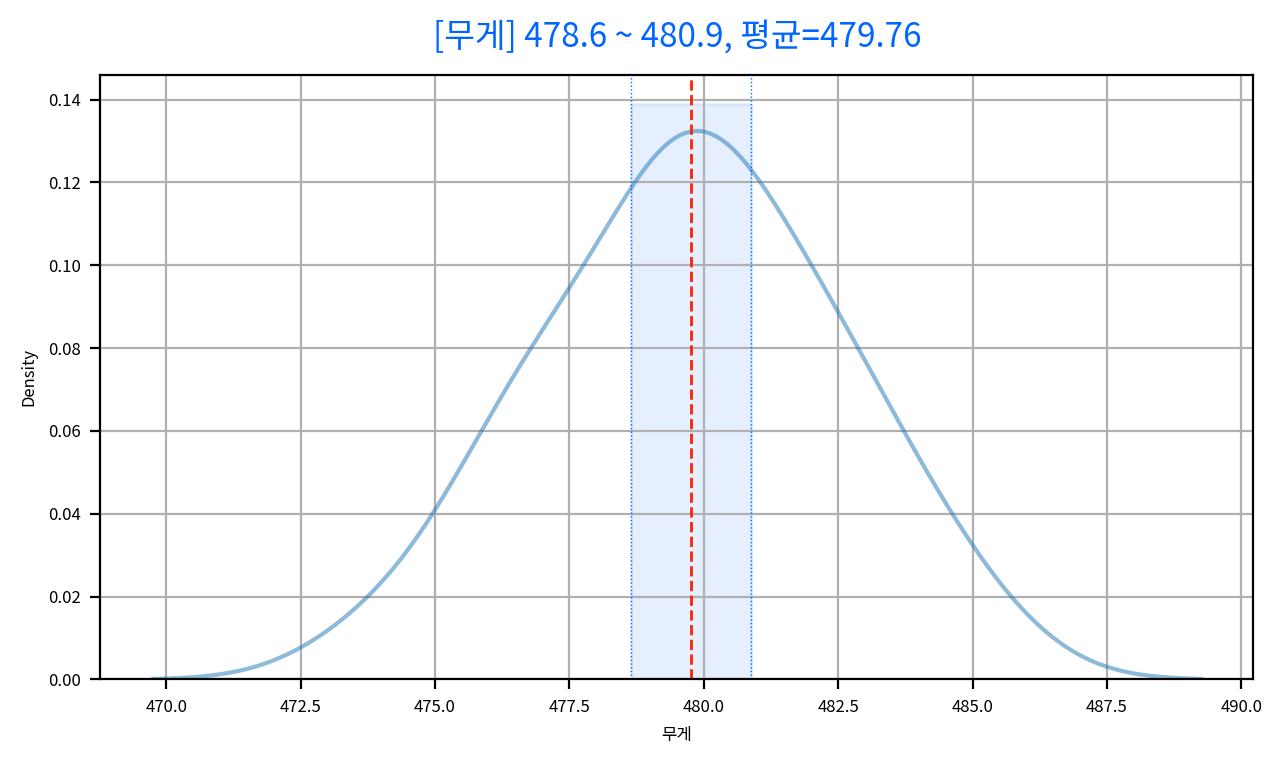

In [4]:
clevel=0.95
data=origin['무게']
n=len(data)
dof=n-1
sample_mean=data.mean()
sample_std=data.std()
sample_std_error=sample_std/sqrt(n)
cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)

width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)


sb.kdeplot(data=data, fill=False, alpha=0.5)

ax.axvline(cmin, linestyle=':', color='#0066ff', linewidth=0.5)
ax.axvline(cmax, linestyle=':', color='#0066ff', linewidth=0.5)

ymin, ymax=ax.get_ylim()
ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1, color='#0066ff88')

ax.axvline(sample_mean, linestyle='--', color='#ff2200', linewidth=1)

ax.grid(True)
ax.set_title(f'[{data.name}] {cmin:.1f} ~ {cmax:.1f}, 평균={sample_mean:0.2f}', color='#0066ff', fontsize=12, fontweight=1000, pad=10)


plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

In [5]:
s, p=normaltest(origin['무게'])
'statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}'.format(s,p,p>0.05)

'statistic: 0.083, p-value: 0.959, 정규성 충족 여부: True'

In [6]:
s, p=ttest_1samp(origin['무게'], 500, alternative='less')
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s,p,'대립' if p<=0.05 else '귀무')

'statistic: -37.524, p-value: 0.000, 대립가설 채택'

# 💊 약

어떤 화학 약품의 제조에 상표가 다른 두 종류의 원료가 사용되고 있다.  
각 원료에서 주성분 A의 함량은 matterial 데이터셋에 정리되어 있다.  
이 두 원료의 주성분 A의 함량이 다른지를 분석하라.

In [ ]:
from hossam import load_data
from scipy.stats import t, ttest_1samp, normaltest, bartlett, levene, ttest_ind, ttest_rel, mannwhitneyu, wilcoxon
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from math import sqrt, log10
from pandas import melt, DataFrame, pivot_table
from statannotations.Annotator import Annotator

In [8]:
origin=load_data('material')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab10_/material.xlsx
[desc] 어떤 화학 약품에 사용되는 서로 다른 상표의 주성분 A 함량표 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (11, 2)
행 개수 : 11개
열 개수 : 2개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상표1     11 non-null     float64
 1   상표2     11 non-null     float64
dtypes: float64(2)
memory usage: 308.0 bytes
None


,상표1,상표2
0,80.4,81.8
1,78.2,82.7
2,80.1,80.7
3,77.1,84.0
4,79.6,79.0


In [9]:
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

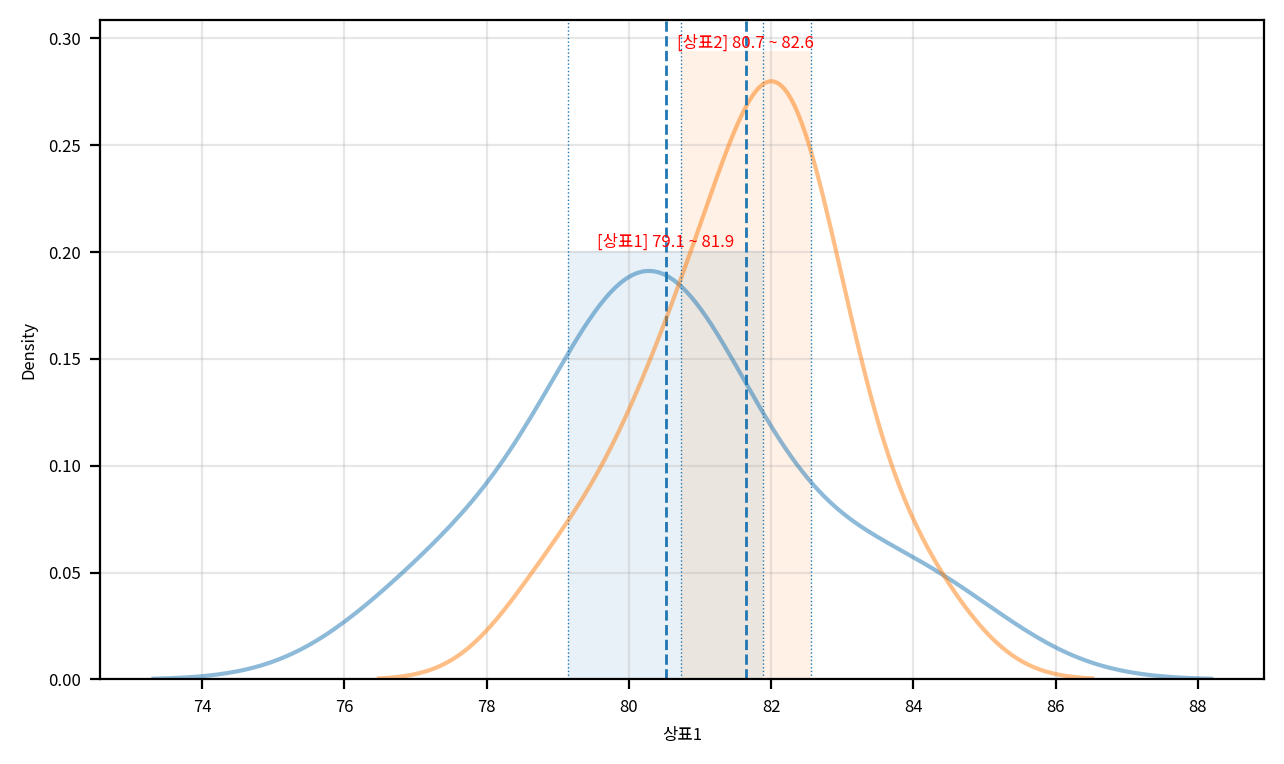

In [10]:
# 확인할 데이터
data=origin[['상표1','상표2']]

width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data.columns:
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 신뢰구간
    max=data[c].max()
    clevel=0.95
    dof=len(data[c])-1
    sp_mean=data[c].mean()
    sp_std=data[c].std(ddof=1)
    sp_std_error=sp_std/sqrt(len(data[c]))
    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax=ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s='[%s] %0.1f ~ %0.1f'%(c, cmin, cmax),
            horizontalalignment='center',
            verticalalignment='bottom',
            fontdict={'size':6, 'color':'red'})

ax.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

In [11]:
data=origin[['상표1','상표2']]

equal_var_fields=[]
normal_dist=True
report=[]

for c in data.columns:
    s, p=normaltest(data[c])

    normalize=(p>0.05)
    report.append({
        'field':c,
        'statistic':s,
        'p-value':p,
        'result':normalize
    })
    normal_dist=normal_dist and normalize

if len(data.columns)>1:
    if normal_dist:
        n='Bartlett'
        s, p=bartlett(*data.values.T)
    else:
        n='Levene'
        s, p=levene(*data.values.T, center='median')

    report.append({
        'field':n,
        'statistic':s,
        'p-value':p,
        'result':p>0.05
    })

report_df=DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
상표1,0.638272,0.726777,True
상표2,0.774961,0.678765,True
Bartlett,1.555316,0.212352,True


In [12]:
# 검정할 데이터 필드명
fields=['상표1', '상표2']

# 로그 적용 여부
use_log=False

# 검정할 데이터
df=origin[fields]

# 검사할 알고리즘
alternative=['two-sided', 'less', 'greater']

# 결과를 저장할 빈 리스트
result=[]

# 가설식 템플릿
fmt='μ({f0}) {0} μ({f1})'

# 등분산성 충족 여부
equal_var=True

for a in alternative:
    if use_log:
        input1=np.log(df[fields[0]])
        input2=np.log(df[fields[1]])
    else:
        input1=df[fields[0]]
        input2=df[fields[1]]
    s, p=ttest_ind(input1, input2, alternative=a, equal_var=equal_var)

    itp=None

    if a=='two-sided':
        itp=fmt.format('==' if p>0.05 else '≠', f0=fields[0], f1=fields[1])
    if a=='less':
        itp=fmt.format('>=' if p>0.05 else '<', f0=fields[0], f1=fields[1])
    if a=='greater':
        itp=fmt.format('<=' if p>0.05 else '>', f0=fields[0], f1=fields[1])

    result.append({
        'alternative':a,
        'statistic':s,
        'p-value':p,
        'H0':p>0.05,
        'H1':p<=0.05,
        'interpretation':itp
    })

    if a=='two-sided' and p>0.05:
        break

rdf=DataFrame(result)
rdf.set_index('alternative', inplace=True)
rdf

,statistic,p-value,H0,H1,interpretation
alternative,,,,,
two-sided,-1.528327,0.142093,True,False,μ(상표1) == μ(상표2)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

상표1 vs. 상표2: t-test independent samples, P_val:1.421e-01 t=-1.528e+00


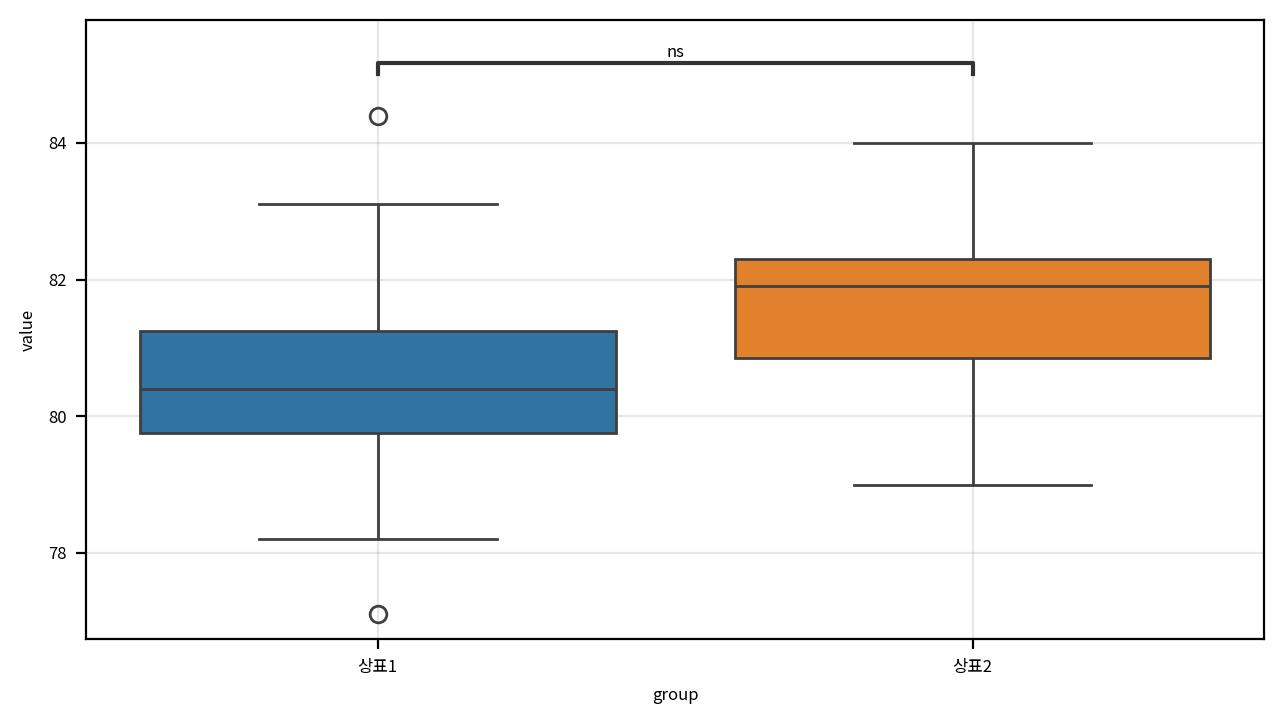

In [13]:
# 검정할 데이터 필드명
fields=['상표1', '상표2']

# 검정 방법
# 't-test_ind', 't-test_paired', 't-test_welch', 'Mann-Whitney', 'Mann-Whitney-gt', 'Mann-Whitney-ls', 'Levene', 'Wilcoxon', 'Kruskal'
test_method='t-test_ind'

# 데이터 재배치
df=melt(origin[fields], value_vars=fields, var_name='group', value_name='value')

# 1. 그래프 초기화
width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.boxplot(data=df, x='group', y='value', hue='group')
annotator=Annotator(ax, data=df, x='group', y='value', pairs=[fields])
annotator.configure(test=test_method)
annotator.apply_and_annotate()

# 3. 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

> 두 원료의 주성분 A의 함량은 다르지 않다 (귀무가설 채택)

# 🧛 혈압

blood_pressure 데이터셋은 부인 15명을 대상으로 평상시 혈압을 측정한 뒤, 이들에게 이 피임약을 일정 기간 복용하게 한 후 이들의 혈압을 다시 측정한 결과를 기록한 데이터이다.  
이 데이터를 통해 피임약 복용이 혈압에 영향을 주는 지 분석하라.

In [14]:
origin=load_data('blood_pressure')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab10_/blood_pressure.xlsx
[desc] 부인 15명을 대상으로 평상시 혈압을 측정한 뒤, 이들에게 이 피임약을 일정 기간 복용하게 한 후 이들의 혈압을 다시 측정한 결과를 기록한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (15, 2)
행 개수 : 15개
열 개수 : 2개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   복용전     15 non-null     int64
 1   복용후     15 non-null     int64
dtypes: int64(2)
memory usage: 372.0 bytes
None


,복용전,복용후
0,70,68
1,80,72
2,72,62
3,76,70
4,76,58


In [15]:
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

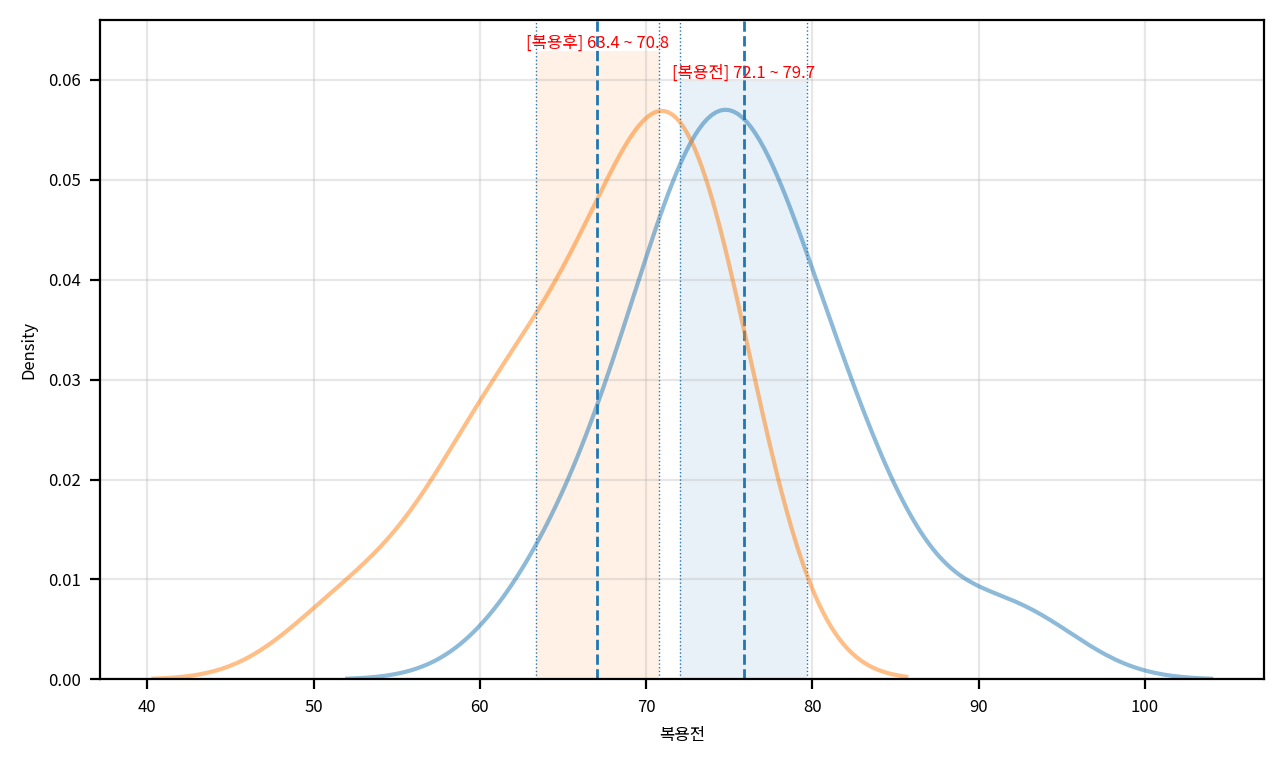

각 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 잇으며, 각 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 각 그룹 모두 표본 평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.


In [16]:
# 확인할 데이터
data=origin[['복용전','복용후']]

width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

mean_check=True

for c in data.columns:
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 신뢰구간
    max=data[c].max()
    clevel=0.95
    dof=len(data[c])-1
    sp_mean=data[c].mean()
    sp_std=data[c].std(ddof=1)
    sp_std_error=sp_std/sqrt(len(data[c]))
    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax=ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s='[%s] %0.1f ~ %0.1f'%(c, cmin, cmax),
            horizontalalignment='center',
            verticalalignment='bottom',
            fontdict={'size':6, 'color':'red'})
    
    mean_check=mean_check and (sp_mean>cmin) and (sp_mean<cmax)

ax.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

print('각 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 잇으며, 각 그룹의 데이터 분포가 서로 다르다고 할 수 있다.')
print('또한 각 그룹 모두 표본 평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.') if mean_check else print('하지만 표본 평균이 신뢰구간에 포함되어 있지 않은 그룹이 있기에, 데이터가 정상범위에 있지 않다고 할 수 있다.')

In [17]:
data=origin[['복용전','복용후']]

equal_var_fields=[]
normal_dist=True
report=[]

for c in data.columns:
    s, p=normaltest(data[c])

    normalize=(p>0.05)
    report.append({
        'field':c,
        'statistic':s,
        'p-value':p,
        'result':normalize
    })
    normal_dist=normal_dist and normalize

if len(data.columns)>1:
    if normal_dist:
        n='Bartlett'
        s, p=bartlett(*data.values.T)
        homos=(p>0.05)
        if homos:
            print('== 이 데이터는 정규성과 등분산성을 모두 만족한다. ==')
        else:
            print('== 이 데이터는 정규성은 만족하지만, 등분산성을 만족하지 못한다 ==')
    else:
        n='Levene'
        s, p=levene(*data.values.T, center='median')
        homos=(p>0.05)
        if homos:
            print('== 이 데이터는 정규성은 만족하지 못하지만, 등분산성은 만족한다. ==')
        else:
            print('== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==')

    report.append({
        'field':n,
        'statistic':s,
        'p-value':p,
        'result':p>0.05
    })

report_df=DataFrame(report).set_index('field')
report_df

== 이 데이터는 정규성과 등분산성을 모두 만족한다. ==


,statistic,p-value,result
field,,,
복용전,2.590682,0.273805,True
복용후,2.656338,0.264962,True
Bartlett,1.013185,0.314141,True


In [18]:
# 검정할 데이터 필드명
fields=['복용전','복용후']

# 독립 여부
independency=False

# 로그 적용 여부
use_log=False

# 검정할 데이터
df=origin[fields]

# 검사할 알고리즘
alternative=['two-sided', 'less', 'greater']

# 결과를 저장할 빈 리스트
result=[]

# 가설식 템플릿
fmt='μ({f0}) {0} μ({f1})'

# 등분산성 충족 여부
equal_var=True

for a in alternative:
    if use_log:
        input1=np.log(df[fields[0]])
        input2=np.log(df[fields[1]])
    else:
        input1=df[fields[0]]
        input2=df[fields[1]]
    if independency:
        s, p=ttest_ind(input1, input2, alternative=a, equal_var=homos)
    else:
        if homos:
            s, p=ttest_rel(input1, input2, alternative=a)
        else:
            s, p=mannwhitneyu(input1, input2, alternative=a)

    itp=None

    if a=='two-sided':
        itp=fmt.format('==' if p>0.05 else '≠', f0=fields[0], f1=fields[1])
        print('차이값에 대한 t 통계량의 값이 %.3f이고 이에 대응되는 유의확률이 %.3f이므로 (p<=0.05)'%(s,p), '귀무가설을 기각하고 대립가설을 채택한다.' if p<0.05 else '대립가설을 기각하고 귀무가설을 채택한다.')
    if a=='less':
        itp=fmt.format('>=' if p>0.05 else '<', f0=fields[0], f1=fields[1])
    if a=='greater':
        itp=fmt.format('<=' if p>0.05 else '>', f0=fields[0], f1=fields[1])

    result.append({
        'alternative':a,
        'statistic':s,
        'p-value':p,
        'H0':p>0.05,
        'H1':p<=0.05,
        'interpretation':itp
    })

    if a=='two-sided' and p>0.05:
        break

rdf=DataFrame(result)
rdf.set_index('alternative', inplace=True)
rdf

차이값에 대한 t 통계량의 값이 3.105이고 이에 대응되는 유의확률이 0.008이므로 (p<=0.05) 귀무가설을 기각하고 대립가설을 채택한다.


,statistic,p-value,H0,H1,interpretation
alternative,,,,,
two-sided,3.10536,0.007749,False,True,μ(복용전) ≠ μ(복용후)
less,3.10536,0.996125,True,False,μ(복용전) >= μ(복용후)
greater,3.10536,0.003875,False,True,μ(복용전) > μ(복용후)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

복용전 vs. 복용후: t-test paired samples, P_val:7.749e-03 t=3.105e+00


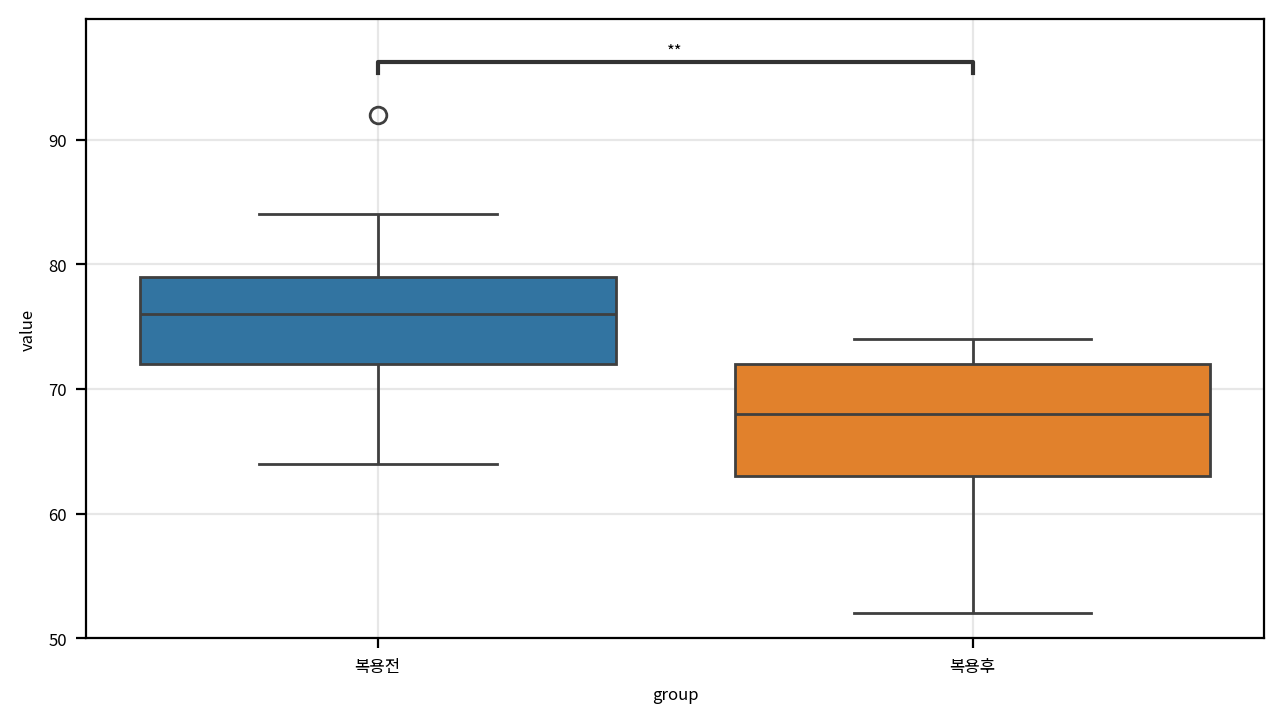

In [19]:
# 검정할 데이터 필드명
fields=['복용전','복용후']

# 검정 방법
# 't-test_ind', 't-test_paired', 't-test_welch', 'Mann-Whitney', 'Mann-Whitney-gt', 'Mann-Whitney-ls', 'Levene', 'Wilcoxon', 'Kruskal'
if independency and homos:
    test_method='t-test_ind'
if independency and not homos:
    test_method='t-test_welch'
if not independency and homos:
    test_method='t-test_paired'
if not independency and not homos:
    test_method='Mann-Whitney'

# 데이터 재배치
df=melt(origin[fields], value_vars=fields, var_name='group', value_name='value')

# 1. 그래프 초기화
width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.boxplot(data=df, x='group', y='value', hue='group')
annotator=Annotator(ax, data=df, x='group', y='value', pairs=[fields])
annotator.configure(test=test_method)
annotator.apply_and_annotate()

# 3. 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

# 🎮 게임

cookie_cats 데이터 셋은 어느 모바일 게임의 버전에 따른 유저별 총 플레이 시간을 조사한 데이터이다.  
개편 이전 버전을 A로 표시하고, 개편 후 버전을 B로 표시하였다.  
플레이 시간이 월등하게 많은 헤비유저들을 제외한 일반유저들을 대상으로 이번 개편이 플레이 시간에 어떤 영향을 주었는 지 알고자 한다.  
게임의 개편이 유저들의 플레이 시간에 어떤 영향을 주었는 지 분석하라.

In [141]:
origin=load_data('cookie_cats')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/etc/cookie_cats.xlsx
[desc] 어느 모바일 게임의 버전에 따른 유저별 총 플레이 시간을 조사한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (90189, 3)
행 개수 : 90189개
열 개수 : 3개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.1+ MB
None


,userid,version,sum_gamerounds
0,116,A,3
1,337,A,38
2,377,B,165
3,483,B,1
4,488,B,179


In [142]:
df=pivot_table(origin, index='userid', columns='version', values='sum_gamerounds').fillna(value=0)
df

version,A,B
userid,,
116,3.0,0.0
337,38.0,0.0
377,0.0,165.0
483,0.0,1.0
488,0.0,179.0
...,...,...
9999441,0.0,97.0
9999479,0.0,30.0
9999710,28.0,0.0


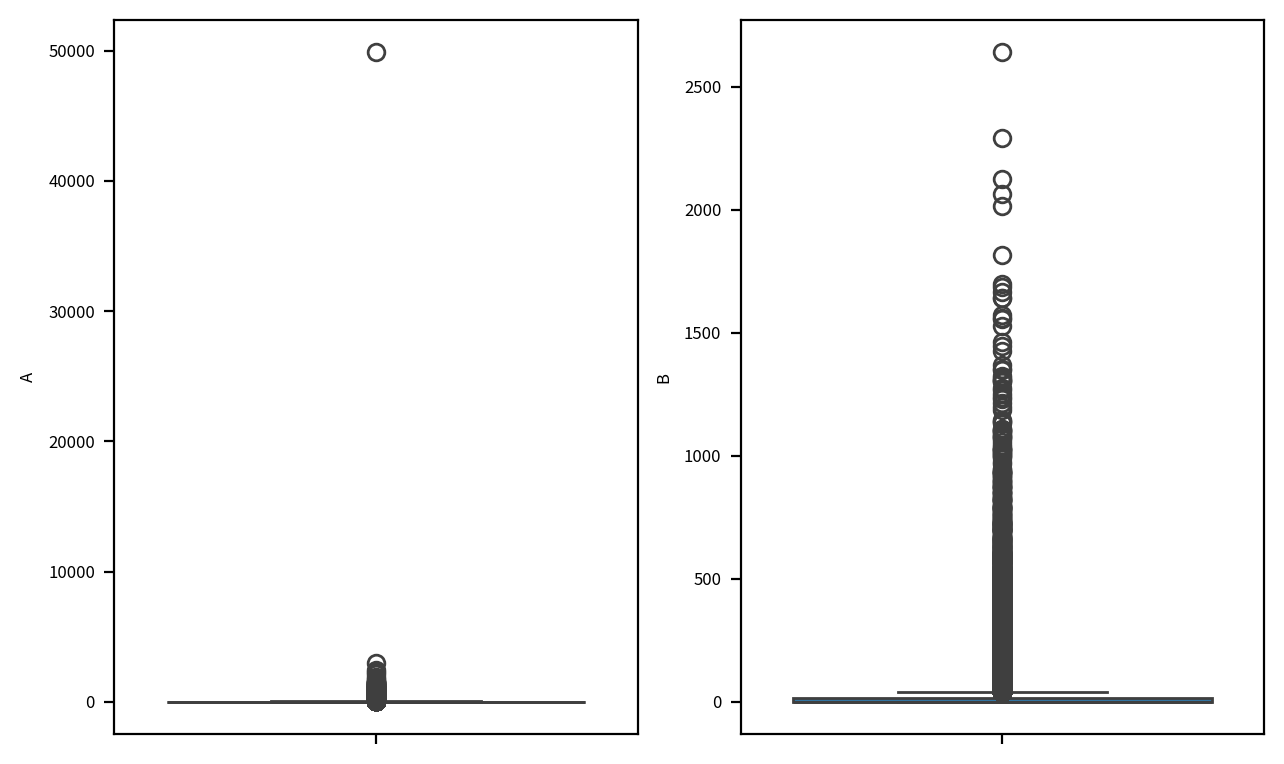

In [144]:
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=2
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.boxplot(data=df, y='A', ax=ax[0])
sb.boxplot(data=df, y='B', ax=ax[1])

# 3. 그래프 꾸미기
# ax.grid(True)
# ax.set_title('⭐', color='#0066ff', fontsize=12, fontweight=1000, pad=10)
# ax.set_xlabel('⭐', color='#ff6600', fontsize=16, labelpad=10)
# ax.set_ylabel('⭐', color='#ff00ff', fontsize=16, labelpad=10)
# ax.set_xlim([⭐,⭐])      # x축 범위
# ax.set_ylim([⭐,⭐])   # y축 범위
# ax.set_xticks([1,2,3,4], ['1학년','2학년','3학년','4학년'])
# ax.set_yticks(range(70,101,3),range(70,101,3))

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

In [145]:
df1=df.copy()

for c in ['A','B']:
    Q1=df1[c].quantile(0.25)
    Q3=df1[c].quantile(0.75)
    iqr=Q3-Q1
    outline_max=Q3+iqr*1.5
    outline_min=Q1-iqr*1.5
    print(f'{c} 상한 극단치 경계:', outline_max)
    print(f'{c} 하한 극단치 경계:', outline_min)

    df1.loc[df[c]>outline_max,c]=outline_max

A 상한 극단치 경계: 40.0
A 하한 극단치 경계: -24.0
B 상한 극단치 경계: 40.0
B 하한 극단치 경계: -24.0


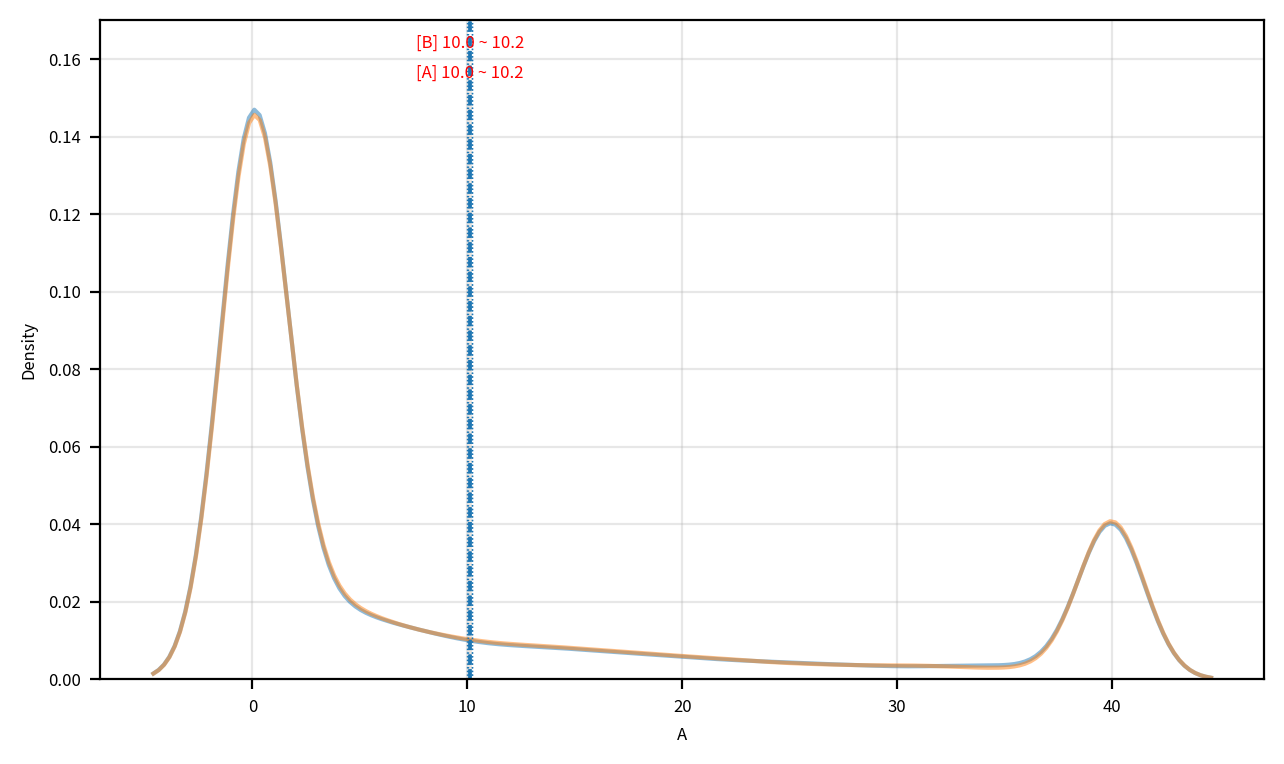

각 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 잇으며, 각 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 각 그룹 모두 표본 평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.


In [146]:
# 확인할 데이터
data=df1[['A','B']]

width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

mean_check=True

for c in data.columns:
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 신뢰구간
    max=data[c].max()
    clevel=0.95
    dof=len(data[c])-1
    sp_mean=data[c].mean()
    sp_std=data[c].std(ddof=1)
    sp_std_error=sp_std/sqrt(len(data[c]))
    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax=ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s='[%s] %0.1f ~ %0.1f'%(c, cmin, cmax),
            horizontalalignment='center',
            verticalalignment='bottom',
            fontdict={'size':6, 'color':'red'})
    
    mean_check=mean_check and (sp_mean>cmin) and (sp_mean<cmax)

ax.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

print('각 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 잇으며, 각 그룹의 데이터 분포가 서로 다르다고 할 수 있다.')
print('또한 각 그룹 모두 표본 평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.') if mean_check else print('하지만 표본 평균이 신뢰구간에 포함되어 있지 않은 그룹이 있기에, 데이터가 정상범위에 있지 않다고 할 수 있다.')

In [147]:
data=df1[['A','B']]

equal_var_fields=[]
normal_dist=True
report=[]

for c in data.columns:
    s, p=normaltest(data[c])

    normalize=(p>0.05)
    report.append({
        'field':c,
        'statistic':s,
        'p-value':p,
        'result':normalize
    })
    normal_dist=normal_dist and normalize

if len(data.columns)>1:
    if normal_dist:
        n='Bartlett'
        s, p=bartlett(*data.values.T)
        homos=(p>0.05)
        if homos:
            print('== 이 데이터는 정규성과 등분산성을 모두 만족한다. ==')
        else:
            print('== 이 데이터는 정규성은 만족하지만, 등분산성을 만족하지 못한다 ==')
    else:
        n='Levene'
        s, p=levene(*data.values.T, center='median')
        homos=(p>0.05)
        if homos:
            print('== 이 데이터는 정규성은 만족하지 못하지만, 등분산성은 만족한다. ==')
        else:
            print('== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==')

    report.append({
        'field':n,
        'statistic':s,
        'p-value':p,
        'result':p>0.05
    })

report_df=DataFrame(report).set_index('field')
report_df

== 이 데이터는 정규성은 만족하지 못하지만, 등분산성은 만족한다. ==


,statistic,p-value,result
field,,,
A,14211.951223,0.00000,False
B,14193.914882,0.00000,False
Levene,0.259071,0.61076,True


In [149]:
# 검정할 데이터 필드명
fields=['A','B']

# 독립 여부
independency=False

# 로그 적용 여부
use_log=False

# 검정할 데이터
df=df1[fields]

# 검사할 알고리즘
alternative=['two-sided', 'less', 'greater']

# 결과를 저장할 빈 리스트
result=[]

# 가설식 템플릿
fmt='μ({f0}) {0} μ({f1})'

# 등분산성 충족 여부
equal_var=True

for a in alternative:
    input1=df[fields[0]]
    input2=df[fields[1]]
    s, p=wilcoxon(input1, input2, alternative=a)

    itp=None

    if a=='two-sided':
        itp=fmt.format('==' if p>0.05 else '≠', f0=fields[0], f1=fields[1])
        print('차이값에 대한 t 통계량의 값이 %.3f이고 이에 대응되는 유의확률이 %.3f이므로 (p<=0.05)'%(s,p), '귀무가설을 기각하고 대립가설을 채택한다.' if p<0.05 else '대립가설을 기각하고 귀무가설을 채택한다.')
    if a=='less':
        itp=fmt.format('>=' if p>0.05 else '<', f0=fields[0], f1=fields[1])
    if a=='greater':
        itp=fmt.format('<=' if p>0.05 else '>', f0=fields[0], f1=fields[1])

    result.append({
        'alternative':a,
        'statistic':s,
        'p-value':p,
        'H0':p>0.05,
        'H1':p<=0.05,
        'interpretation':itp
    })

    if a=='two-sided' and p>0.05:
        break

rdf=DataFrame(result)
rdf.set_index('alternative', inplace=True)
rdf

차이값에 대한 t 통계량의 값이 1849969570.500이고 이에 대응되는 유의확률이 0.306이므로 (p<=0.05) 대립가설을 기각하고 귀무가설을 채택한다.


,statistic,p-value,H0,H1,interpretation
alternative,,,,,
two-sided,1.849970e+09,0.30605,True,False,μ(A) == μ(B)


# 🏃‍♂️ 달리기

runner_diet 데이터셋은 고등학교 육상선수 10명에게 감량훈련(2~4kg 정도)을 시킨 후 100m 달리기를 실시한 결과를 조사한 데이터이다.  
이를 통해 고등학교 육상선수에게 체중감량을 시키면 달리기에 어떤 변화가 일어나는지 조사하고자 한다.  
감량 전과 후에 달리기 속도에 차이가 있는 지 분석하라.

In [23]:
origin=load_data('runner_diet')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab10_/runner_diet.xlsx
[desc] 고등학교 육상선수 10명에게 감량훈련(2~4kg 정도)을 시킨 후 100m 달리기를 실시한 결과를 조사한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (10, 2)
행 개수 : 10개
열 개수 : 2개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   감량전     10 non-null     float64
 1   감량후     10 non-null     float64
dtypes: float64(2)
memory usage: 292.0 bytes
None


,감량전,감량후
0,14.5,14.3
1,13.4,13.4
2,13.0,13.1
3,14.5,13.9
4,13.3,13.1


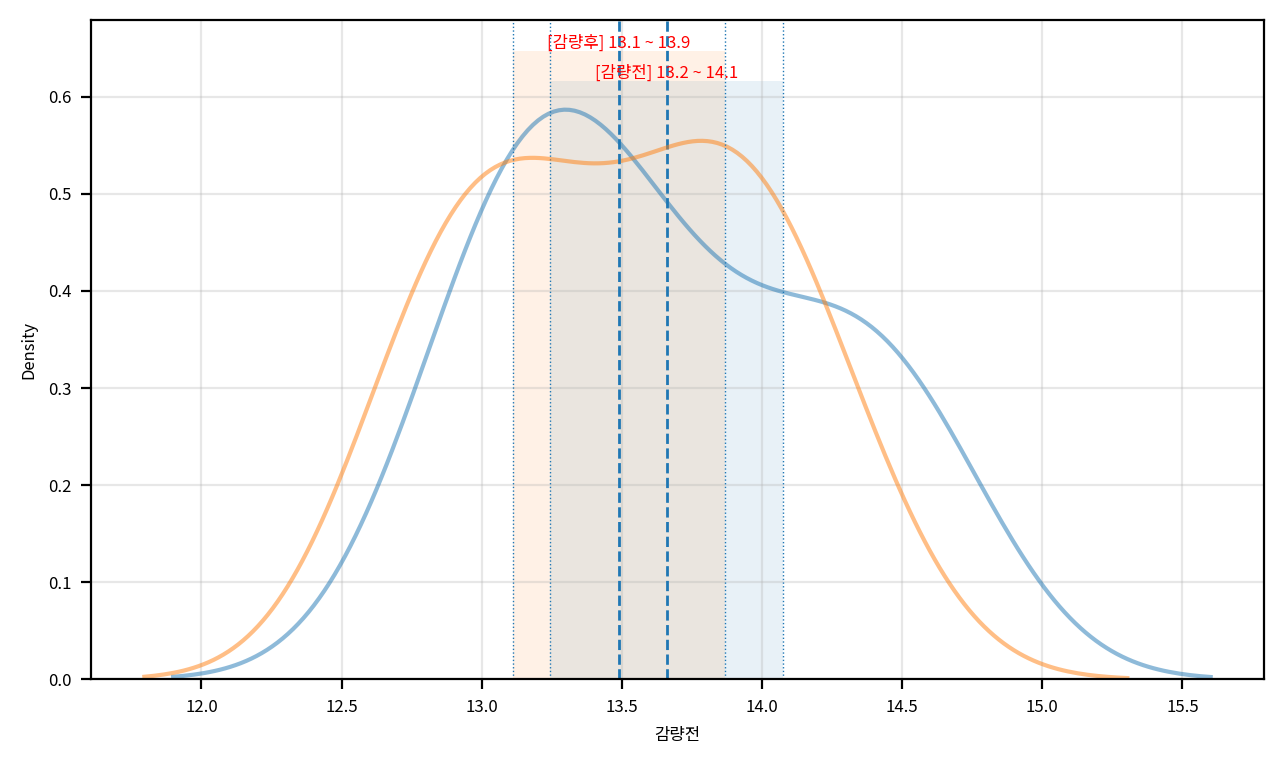

각 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 잇으며, 각 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 각 그룹 모두 표본 평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.


In [24]:
# 확인할 데이터
data=origin[['감량전','감량후']]

width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

mean_check=True

for c in data.columns:
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 신뢰구간
    max=data[c].max()
    clevel=0.95
    dof=len(data[c])-1
    sp_mean=data[c].mean()
    sp_std=data[c].std(ddof=1)
    sp_std_error=sp_std/sqrt(len(data[c]))
    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax=ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s='[%s] %0.1f ~ %0.1f'%(c, cmin, cmax),
            horizontalalignment='center',
            verticalalignment='bottom',
            fontdict={'size':6, 'color':'red'})
    
    mean_check=mean_check and (sp_mean>cmin) and (sp_mean<cmax)

ax.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

print('각 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 잇으며, 각 그룹의 데이터 분포가 서로 다르다고 할 수 있다.')
print('또한 각 그룹 모두 표본 평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.') if mean_check else print('하지만 표본 평균이 신뢰구간에 포함되어 있지 않은 그룹이 있기에, 데이터가 정상범위에 있지 않다고 할 수 있다.')

In [25]:
data=origin[['감량전','감량후']]

equal_var_fields=[]
normal_dist=True
report=[]

for c in data.columns:
    s, p=normaltest(data[c])

    normalize=(p>0.05)
    report.append({
        'field':c,
        'statistic':s,
        'p-value':p,
        'result':normalize
    })
    normal_dist=normal_dist and normalize

if len(data.columns)>1:
    if normal_dist:
        n='Bartlett'
        s, p=bartlett(*data.values.T)
        homos=(p>0.05)
        if homos:
            print('== 이 데이터는 정규성과 등분산성을 모두 만족한다. ==')
        else:
            print('== 이 데이터는 정규성은 만족하지만, 등분산성을 만족하지 못한다 ==')
    else:
        n='Levene'
        s, p=levene(*data.values.T, center='median')
        homos=(p>0.05)
        if homos:
            print('== 이 데이터는 정규성은 만족하지 못하지만, 등분산성은 만족한다. ==')
        else:
            print('== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==')

    report.append({
        'field':n,
        'statistic':s,
        'p-value':p,
        'result':p>0.05
    })

report_df=DataFrame(report).set_index('field')
report_df

== 이 데이터는 정규성과 등분산성을 모두 만족한다. ==


,statistic,p-value,result
field,,,
감량전,2.063078,0.356458,True
감량후,1.646609,0.438979,True
Bartlett,0.073124,0.786842,True


In [26]:
# 검정할 데이터 필드명
fields=['감량전','감량후']

# 독립 여부
independency=False

# 로그 적용 여부
use_log=False

# 검정할 데이터
df=origin[fields]

# 검사할 알고리즘
alternative=['two-sided', 'less', 'greater']

# 결과를 저장할 빈 리스트
result=[]

# 가설식 템플릿
fmt='μ({f0}) {0} μ({f1})'

# 등분산성 충족 여부
equal_var=True

for a in alternative:
    if use_log:
        input1=np.log(df[fields[0]])
        input2=np.log(df[fields[1]])
    else:
        input1=df[fields[0]]
        input2=df[fields[1]]
    if independency:
        s, p=ttest_ind(input1, input2, alternative=a, equal_var=homos)
    else:
        if homos:
            s, p=ttest_rel(input1, input2, alternative=a)
        else:
            s, p=mannwhitneyu(input1, input2, alternative=a)

    itp=None

    if a=='two-sided':
        itp=fmt.format('==' if p>0.05 else '≠', f0=fields[0], f1=fields[1])
        print('차이값에 대한 t 통계량의 값이 %.3f이고 이에 대응되는 유의확률이 %.3f이므로 (p<=0.05)'%(s,p), '귀무가설을 기각하고 대립가설을 채택한다.' if p<0.05 else '대립가설을 기각하고 귀무가설을 채택한다.')
    if a=='less':
        itp=fmt.format('>=' if p>0.05 else '<', f0=fields[0], f1=fields[1])
    if a=='greater':
        itp=fmt.format('<=' if p>0.05 else '>', f0=fields[0], f1=fields[1])

    result.append({
        'alternative':a,
        'statistic':s,
        'p-value':p,
        'H0':p>0.05,
        'H1':p<=0.05,
        'interpretation':itp
    })

    if a=='two-sided' and p>0.05:
        break

rdf=DataFrame(result)
rdf.set_index('alternative', inplace=True)
rdf

차이값에 대한 t 통계량의 값이 2.375이고 이에 대응되는 유의확률이 0.042이므로 (p<=0.05) 귀무가설을 기각하고 대립가설을 채택한다.


,statistic,p-value,H0,H1,interpretation
alternative,,,,,
two-sided,2.375307,0.041546,False,True,μ(감량전) ≠ μ(감량후)
less,2.375307,0.979227,True,False,μ(감량전) >= μ(감량후)
greater,2.375307,0.020773,False,True,μ(감량전) > μ(감량후)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

감량전 vs. 감량후: t-test paired samples, P_val:4.155e-02 t=2.375e+00


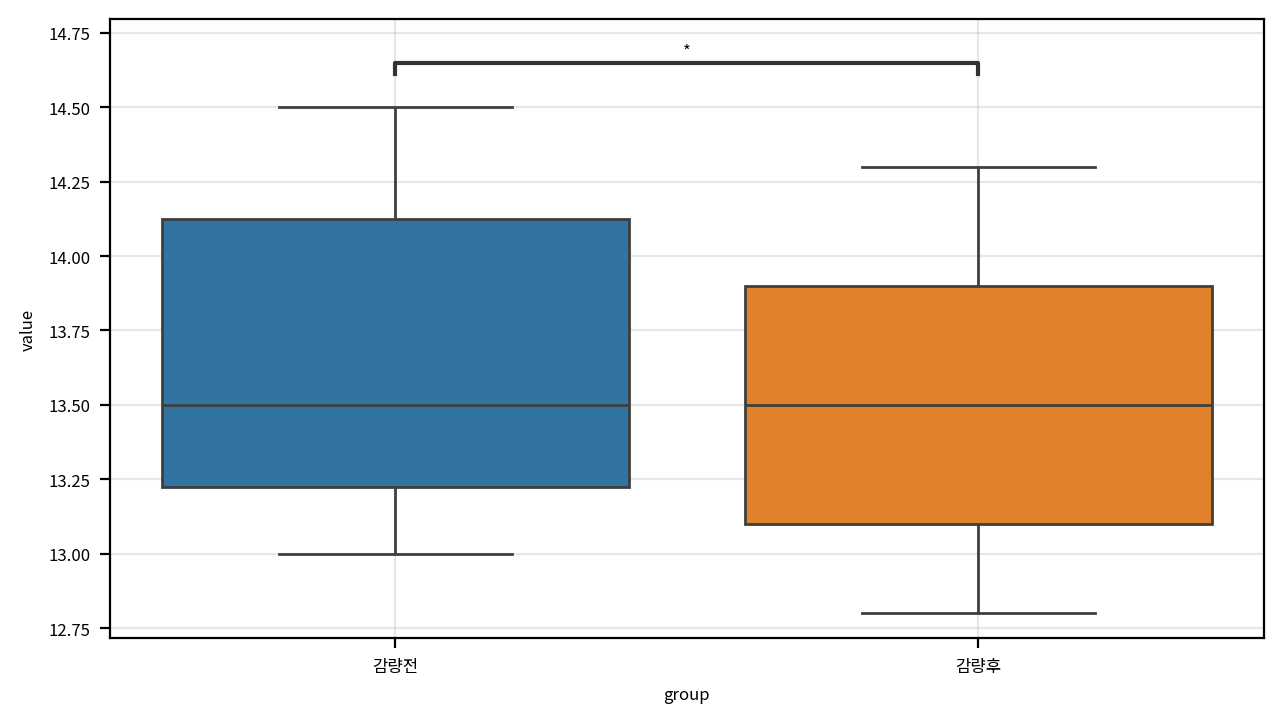

In [27]:
# 검정할 데이터 필드명
fields=['감량전','감량후']

# 검정 방법
# 't-test_ind', 't-test_paired', 't-test_welch', 'Mann-Whitney', 'Mann-Whitney-gt', 'Mann-Whitney-ls', 'Levene', 'Wilcoxon', 'Kruskal'
if independency and homos:
    test_method='t-test_ind'
if independency and not homos:
    test_method='t-test_welch'
if not independency and homos:
    test_method='t-test_paired'
if not independency and not homos:
    test_method='Mann-Whitney'

# 데이터 재배치
df=melt(origin[fields], value_vars=fields, var_name='group', value_name='value')

# 1. 그래프 초기화
width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.boxplot(data=df, x='group', y='value', hue='group')
annotator=Annotator(ax, data=df, x='group', y='value', pairs=[fields])
annotator.configure(test=test_method)
annotator.apply_and_annotate()

# 3. 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

# 🤼 레슬링

wrestler_diet 데이터셋은 고등학교 레슬링 선수에게 체중감량을 시키면 체력에 어떤 변화가 일어나는 지 조사하기 위하여, 어느 고등학교의 레슬링 선수 12명을 표본추출하여 감량시킨 후 얻은 데이터이다.  
감량 전과 감량 후 간에 차이가 있는가에 대한 대응비교를 악력, 윗몸일으키기, 턱걸이에 대하여 실시하고 분석하라.

In [151]:
origin=load_data('wrestler_diet')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab10_/wrestler_diet.xlsx
[desc] 고등학교 레슬링 선수에게 체중감량을 시키면 체력에 어떤 변화가 일어나는지 조사하기 위하여, 어느 고등학교의 레슬링 선수 12명을 표본추출하여 감량시킨 후 얻은 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (12, 7)
행 개수 : 12개
열 개수 : 7개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   이름          12 non-null     object
 1   감량전 악력      12 non-null     int64 
 2   감량후 악력      12 non-null     int64 
 3   감량전 윗몸일으키기  12 non-null     int64 
 4   감량후 윗몸일으키기  12 non-null     int64 
 5   감량전 턱걸이     12 non-null     int64 
 6   감량후 턱걸이     12 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 804.0+ bytes
None


,이름,감량전 악력,감량후 악력,감량전 윗몸일으키기,감량후 윗몸일으키기,감량전 턱걸이,감량후 턱걸이
0,B.S,43,41,35,41,25,29
1,P.J,42,41,40,44,25,29
2,G.G,52,50,36,41,22,23
3,A.L,53,52,38,42,10,15
4,I.H,44,40,36,42,15,19


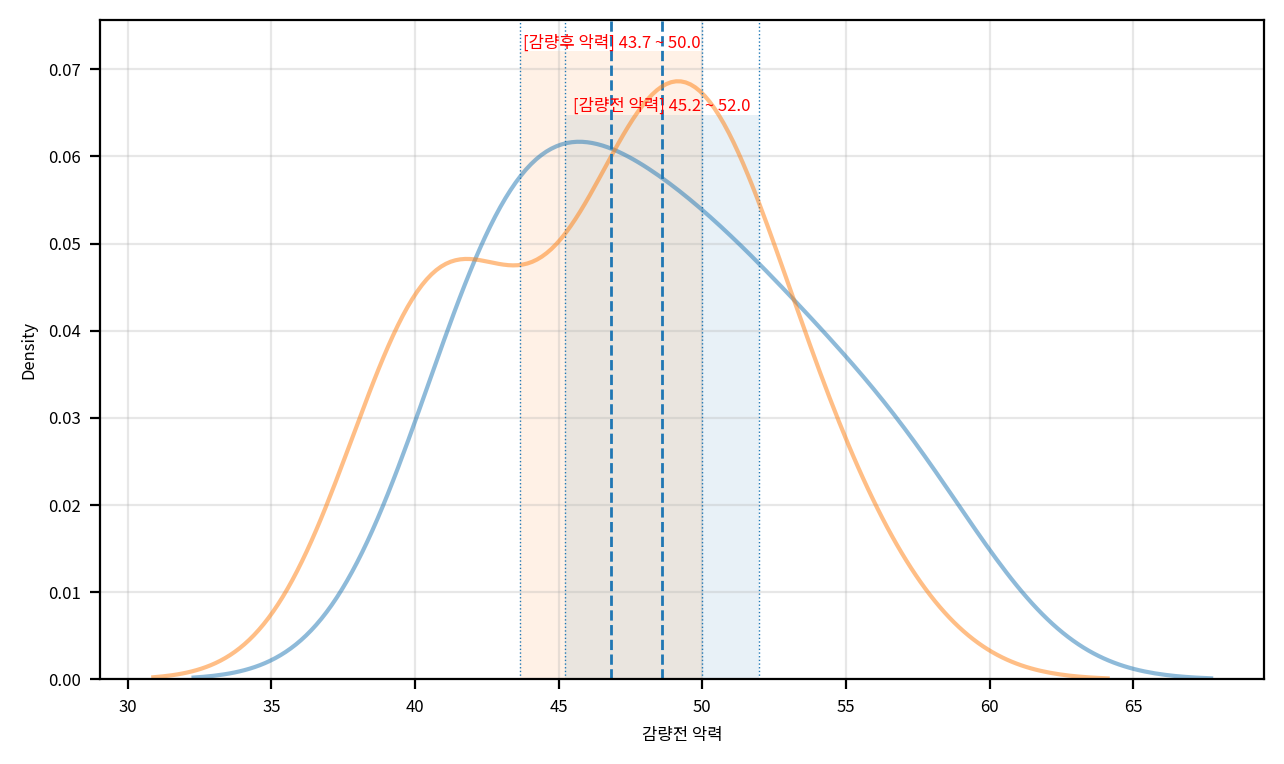

각 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 잇으며, 각 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 각 그룹 모두 표본 평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.


,statistic,p-value,result
field,,,
감량전 악력,1.146496,0.563692,False
감량후 악력,1.358430,0.507015,False


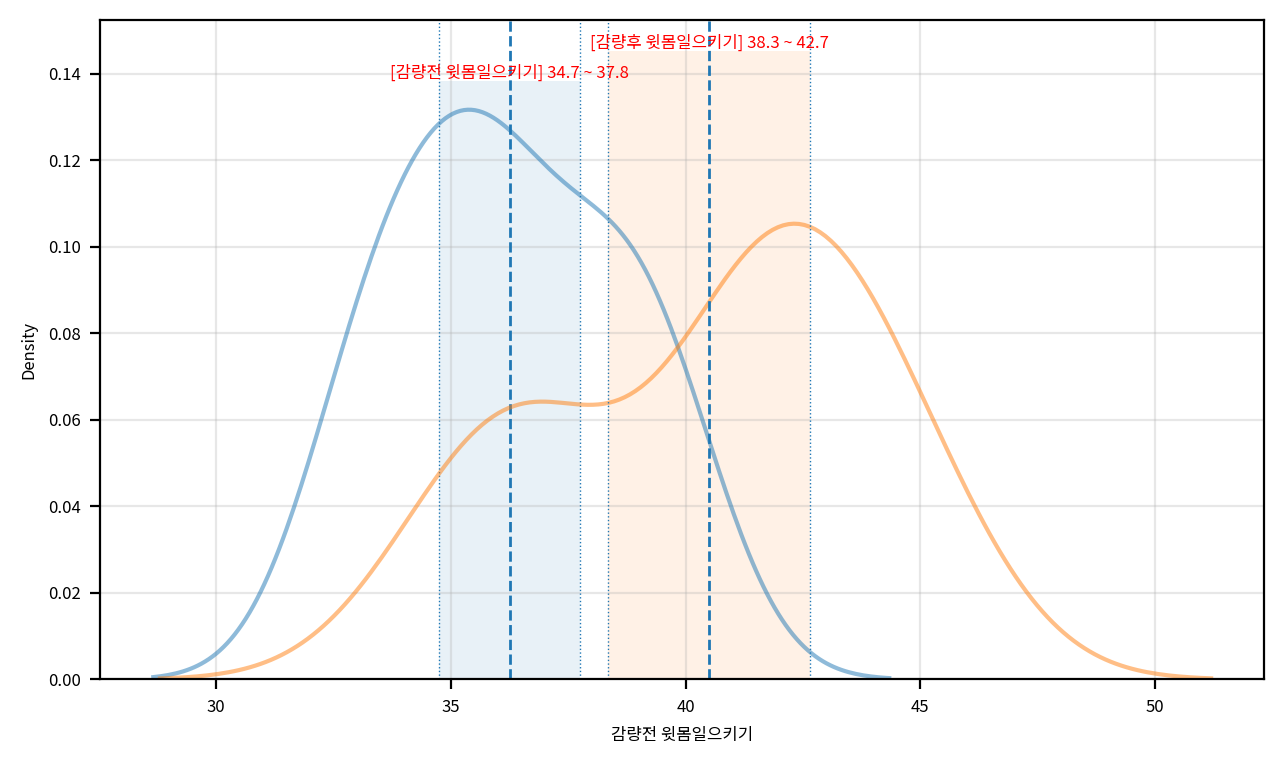

각 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 잇으며, 각 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 각 그룹 모두 표본 평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.


,statistic,p-value,result
field,,,
감량전 윗몸일으키기,1.362864,0.505892,False
감량후 윗몸일으키기,2.007707,0.366465,False


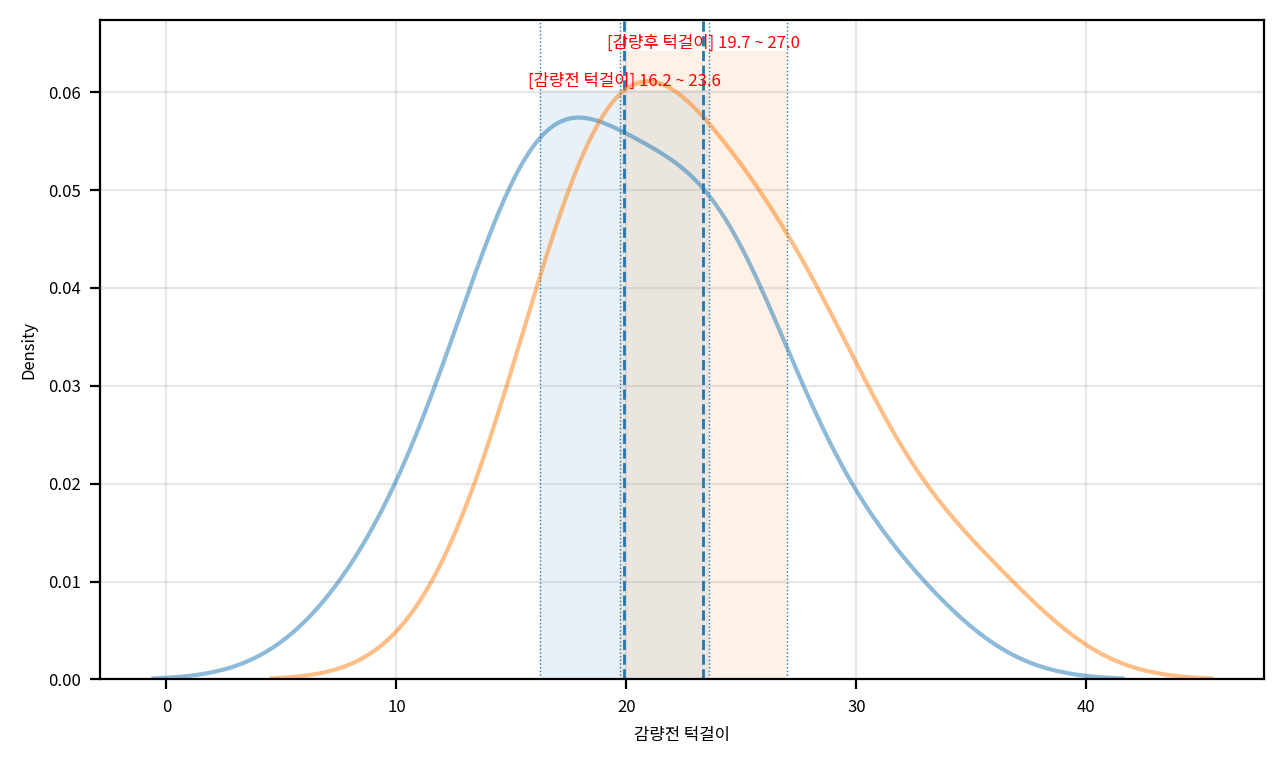

각 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 잇으며, 각 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 각 그룹 모두 표본 평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.


,statistic,p-value,result
field,,,
감량전 턱걸이,0.154328,0.925738,False
감량후 턱걸이,1.021094,0.600167,False


In [152]:
field_group=[['감량전 악력','감량후 악력'],['감량전 윗몸일으키기','감량후 윗몸일으키기'],['감량전 턱걸이', '감량후 턱걸이']]

for field in field_group:
    data=origin[field]

    width_px=1280
    height_px=760
    rows=1
    cols=1
    figsize=(width_px/my_dpi, height_px/my_dpi)
    fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

    mean_check=True

    for c in data.columns:
        sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

        # 신뢰구간
        max=data[c].max()
        clevel=0.95
        dof=len(data[c])-1
        sp_mean=data[c].mean()
        sp_std=data[c].std(ddof=1)
        sp_std_error=sp_std/sqrt(len(data[c]))
        cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

        ax.axvline(cmin, linestyle=':', linewidth=0.5)
        ax.axvline(cmax, linestyle=':', linewidth=0.5)

        # 평균 표시
        ymin, ymax=ax.get_ylim()
        ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
        ax.axvline(sp_mean, linestyle='--', linewidth=1)

        # 텍스트 그리기
        ax.text(x=(cmax-cmin)/2+cmin,
                y=ymax,
                s='[%s] %0.1f ~ %0.1f'%(c, cmin, cmax),
                horizontalalignment='center',
                verticalalignment='bottom',
                fontdict={'size':6, 'color':'red'})
        
        mean_check=mean_check and (sp_mean>cmin) and (sp_mean<cmax)

    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    # plt.savefig('myplot.png',dpi=my_dpi)
    plt.show()
    plt.close()

    print('각 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 잇으며, 각 그룹의 데이터 분포가 서로 다르다고 할 수 있다.')
    print('또한 각 그룹 모두 표본 평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.') if mean_check else print('하지만 표본 평균이 신뢰구간에 포함되어 있지 않은 그룹이 있기에, 데이터가 정상범위에 있지 않다고 할 수 있다.')

    equal_var_fields=[]
    normal_dist=True
    report=[]

    for c in data.columns:
        s, p=normaltest(data[c])
        report.append({
            'field':c,
            'statistic':s,
            'p-value':p,
            'result':normalize
        })
        normal_dist=normal_dist and normalize
    
    report_df=DataFrame(report).set_index('field')
    display(report_df)

In [153]:
for fields in field_group:
    df=origin[fields]
    alternative=['two-sided', 'less', 'greater']
    result=[]
    fmt='μ({f0}) {0} μ({f1})'

    for a in alternative:
        input1=df[fields[0]]
        input2=df[fields[1]]
        s, p=ttest_rel(input1, input2, alternative=a)

        itp=None

        if a=='two-sided':
            itp=fmt.format('==' if p>0.05 else '≠', f0=fields[0], f1=fields[1])
            print('차이값에 대한 t 통계량의 값이 %.3f이고 이에 대응되는 유의확률이 %.3f이므로 (p<=0.05)'%(s,p), '귀무가설을 기각하고 대립가설을 채택한다.' if p<0.05 else '대립가설을 기각하고 귀무가설을 채택한다.')
        if a=='less':
            itp=fmt.format('>=' if p>0.05 else '<', f0=fields[0], f1=fields[1])
        if a=='greater':
            itp=fmt.format('<=' if p>0.05 else '>', f0=fields[0], f1=fields[1])

        result.append({
            'alternative':a,
            'statistic':s,
            'p-value':p,
            'H0':p>0.05,
            'H1':p<=0.05,
            'interpretation':itp
        })

        if a=='two-sided' and p>0.05:
            break

    rdf=DataFrame(result)
    rdf.set_index('alternative', inplace=True)
    display(rdf)

차이값에 대한 t 통계량의 값이 2.365이고 이에 대응되는 유의확률이 0.037이므로 (p<=0.05) 귀무가설을 기각하고 대립가설을 채택한다.


,statistic,p-value,H0,H1,interpretation
alternative,,,,,
two-sided,2.365408,0.037454,False,True,μ(감량전 악력) ≠ μ(감량후 악력)
less,2.365408,0.981273,True,False,μ(감량전 악력) >= μ(감량후 악력)
greater,2.365408,0.018727,False,True,μ(감량전 악력) > μ(감량후 악력)


차이값에 대한 t 통계량의 값이 -7.180이고 이에 대응되는 유의확률이 0.000이므로 (p<=0.05) 귀무가설을 기각하고 대립가설을 채택한다.


,statistic,p-value,H0,H1,interpretation
alternative,,,,,
two-sided,-7.179927,0.000018,False,True,μ(감량전 윗몸일으키기) ≠ μ(감량후 윗몸일으키기)
less,-7.179927,0.000009,False,True,μ(감량전 윗몸일으키기) < μ(감량후 윗몸일으키기)
greater,-7.179927,0.999991,True,False,μ(감량전 윗몸일으키기) <= μ(감량후 윗몸일으키기)


차이값에 대한 t 통계량의 값이 -6.842이고 이에 대응되는 유의확률이 0.000이므로 (p<=0.05) 귀무가설을 기각하고 대립가설을 채택한다.


,statistic,p-value,H0,H1,interpretation
alternative,,,,,
two-sided,-6.841978,0.000028,False,True,μ(감량전 턱걸이) ≠ μ(감량후 턱걸이)
less,-6.841978,0.000014,False,True,μ(감량전 턱걸이) < μ(감량후 턱걸이)
greater,-6.841978,0.999986,True,False,μ(감량전 턱걸이) <= μ(감량후 턱걸이)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

감량전 악력 vs. 감량후 악력: t-test paired samples, P_val:3.745e-02 t=2.365e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

감량전 윗몸일으키기 vs. 감량후 윗몸일으키기: t-test paired samples, P_val:1.798e-05 t=-7.180e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

감량전 턱걸이 vs. 감량후 턱걸이: t-test paired samples, P_val:2.794e-05 t=-6.842e+00


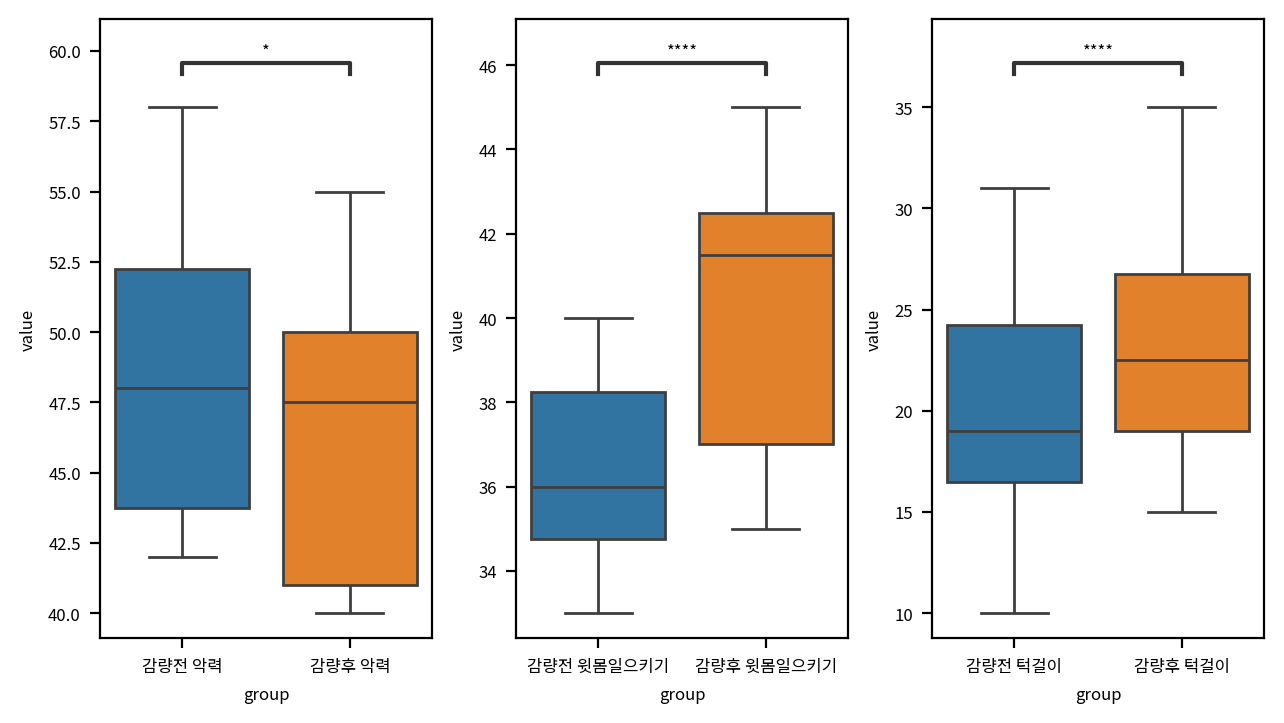

In [36]:
# 검정할 데이터 필드명
fields=['감량전 악력','감량후 악력','감량전 윗몸일으키기','감량후 윗몸일으키기','감량전 턱걸이', '감량후 턱걸이']

# 검정 방법
# 't-test_ind', 't-test_paired', 't-test_welch', 'Mann-Whitney', 'Mann-Whitney-gt', 'Mann-Whitney-ls', 'Levene', 'Wilcoxon', 'Kruskal'
if independency and homos:
    test_method='t-test_ind'
if independency and not homos:
    test_method='t-test_welch'
if not independency and homos:
    test_method='t-test_paired'
if not independency and not homos:
    test_method='Mann-Whitney'

# 데이터 재배치
# df=melt(origin[fields], value_vars=fields, var_name='group', value_name='value')

# 1. 그래프 초기화
width_px=1280
height_px=720
rows=1
cols=3
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
df=melt(origin[['감량전 악력','감량후 악력']], value_vars=['감량전 악력','감량후 악력'], var_name='group', value_name='value')
sb.boxplot(data=df, x='group', y='value', hue='group', ax=ax[0])
annotator=Annotator(ax=ax[0], data=df, x='group', y='value', pairs=[('감량전 악력','감량후 악력')])
annotator.configure(test=test_method)
annotator.apply_and_annotate()

df=melt(origin[['감량전 윗몸일으키기','감량후 윗몸일으키기']], value_vars=['감량전 윗몸일으키기','감량후 윗몸일으키기'], var_name='group', value_name='value')
sb.boxplot(data=df, x='group', y='value', hue='group', ax=ax[1])
annotator=Annotator(ax=ax[1], data=df, x='group', y='value', pairs=[('감량전 윗몸일으키기','감량후 윗몸일으키기')])
annotator.configure(test=test_method)
annotator.apply_and_annotate()

df=melt(origin[['감량전 턱걸이','감량후 턱걸이']], value_vars=['감량전 턱걸이','감량후 턱걸이'], var_name='group', value_name='value')
sb.boxplot(data=df, x='group', y='value', hue='group', ax=ax[2])
annotator=Annotator(ax=ax[2], data=df, x='group', y='value', pairs=[('감량전 턱걸이','감량후 턱걸이')])
annotator.configure(test=test_method)
annotator.apply_and_annotate()

# 3. 그래프 꾸미기
# ax.grid(True, alpha=0.3)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

# 🏬 상권

서울시에서 정의하는 상권의 종류는 발달상권, 골목상권, 관광특구, 전통시장이 있다.  
commercial 데이터는 서울시의 2023년 상권에 따른 분기별 매출액과 매출건수에 대한 자료이다.  
주어진 데이터를 활용하여 서울시 골목상권의 2023년 상반기(1,2분기)와 하반기(3,4분기) 매출액이 어떤 차이를 보이는 지 분석하라.  
주어진 데이터는 서울시에서 제공하는 집계가 완료된 데이터이므로 모든 결측치는 없는 상태이며, 이상치도 실제 매출액 데이터이므로 별도의 정제 과정 없이 진행하는 것으로 한다.

In [155]:
from pandas import pivot_table

In [156]:
origin=load_data('commercial')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab10_/commercial.xlsx
[desc] 서울시의 2023년 상권에 따른 분기별 매출액과 매출건수에 대한 자료 (출처: 서울 열린데이터 광장)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (6222, 6)
행 개수 : 6222개
열 개수 : 6개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6222 entries, 0 to 6221
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   quarter          6222 non-null   int64 
 1   code             6222 non-null   int64 
 2   type             6222 non-null   object
 3   name             6222 non-null   object
 4   sales_amount     6222 non-null   int64 
 5   number_of_sales  6222 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 291.8+ KB
None


,quarter,code,type,name,sales_amount,number_of_sales
0,1,3001491,관광특구,이태원 관광특구,72523644100,2496865
1,1,3001492,관광특구,명동 남대문 북창동 다동 무교동 관광특구,283332346393,10246122
2,1,3001493,관광특구,동대문패션타운 관광특구,81696730221,2880324
3,1,3001494,관광특구,종로·청계 관광특구,212062656625,4960006
4,1,3001495,관광특구,잠실 관광특구,231338386876,5995166


In [158]:
my_list=[]
for i in range(0,len(origin)):
    if origin['quarter'][i]==1 or origin['quarter'][i]==2:
        my_list.append('상반기')
    else:
        my_list.append('하반기')
origin['half_quarter']=my_list
origin[origin['type']=='골목상권']

,quarter,code,type,name,sales_amount,number_of_sales,half_quarter
6,1,3110001,골목상권,이북5도청사,435264344,13080,상반기
7,1,3110002,골목상권,독립문역 1번,4062721649,339647,상반기
8,1,3110003,골목상권,세검정초등학교,576819152,16978,상반기
9,1,3110004,골목상권,대신고등학교,312840339,7706,상반기
10,1,3110005,골목상권,세검정,666679997,10162,상반기
...,...,...,...,...,...,...,...
5690,4,3111086,골목상권,한영중고,4733024545,196999,하반기
5691,4,3111087,골목상권,고덕중학교(고덕2동주민센터),1644486933,65056,하반기
5692,4,3111088,골목상권,고덕동성당,2953618538,158690,하반기
5693,4,3111089,골목상권,상일여고(상일초등학교),12713570299,430385,하반기


In [169]:
mydata=origin[origin['type']=='골목상권']
mydata

,quarter,code,type,name,sales_amount,number_of_sales,half_quarter
6,1,3110001,골목상권,이북5도청사,435264344,13080,상반기
7,1,3110002,골목상권,독립문역 1번,4062721649,339647,상반기
8,1,3110003,골목상권,세검정초등학교,576819152,16978,상반기
9,1,3110004,골목상권,대신고등학교,312840339,7706,상반기
10,1,3110005,골목상권,세검정,666679997,10162,상반기
...,...,...,...,...,...,...,...
5690,4,3111086,골목상권,한영중고,4733024545,196999,하반기
5691,4,3111087,골목상권,고덕중학교(고덕2동주민센터),1644486933,65056,하반기
5692,4,3111088,골목상권,고덕동성당,2953618538,158690,하반기
5693,4,3111089,골목상권,상일여고(상일초등학교),12713570299,430385,하반기


In [170]:
df1=mydata.copy()
df1['idx']=df1.groupby('half_quarter').cumcount()
df1

,quarter,code,type,name,sales_amount,number_of_sales,half_quarter,idx
6,1,3110001,골목상권,이북5도청사,435264344,13080,상반기,0
7,1,3110002,골목상권,독립문역 1번,4062721649,339647,상반기,1
8,1,3110003,골목상권,세검정초등학교,576819152,16978,상반기,2
9,1,3110004,골목상권,대신고등학교,312840339,7706,상반기,3
10,1,3110005,골목상권,세검정,666679997,10162,상반기,4
...,...,...,...,...,...,...,...,...
5690,4,3111086,골목상권,한영중고,4733024545,196999,하반기,2043
5691,4,3111087,골목상권,고덕중학교(고덕2동주민센터),1644486933,65056,하반기,2044
5692,4,3111088,골목상권,고덕동성당,2953618538,158690,하반기,2045
5693,4,3111089,골목상권,상일여고(상일초등학교),12713570299,430385,하반기,2046


In [171]:
df=pivot_table(df1,index='idx',columns='half_quarter',values='sales_amount')
df=df.dropna()
df

half_quarter,상반기,하반기
idx,,
0,4.352643e+08,6.649342e+08
1,4.062722e+09,7.453777e+09
2,5.768192e+08,9.344484e+08
3,3.128403e+08,3.723338e+08
4,6.666800e+08,7.563541e+08
...,...,...
2040,4.686728e+09,2.599024e+09
2041,1.400771e+09,1.100491e+08
2042,3.564871e+09,6.549150e+09


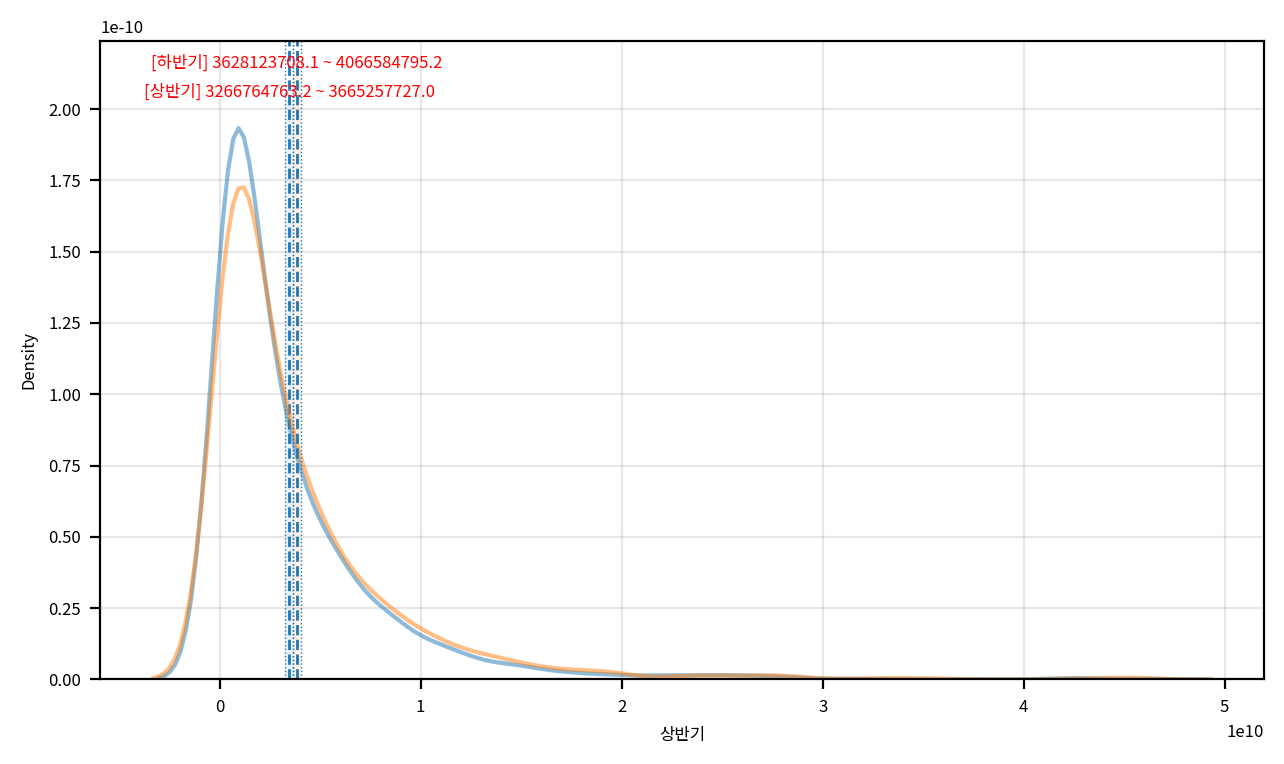

각 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 잇으며, 각 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 각 그룹 모두 표본 평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.


In [172]:
# 확인할 데이터
data=df[['상반기','하반기']]

width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

mean_check=True

for c in data.columns:
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 신뢰구간
    max=data[c].max()
    clevel=0.95
    dof=len(data[c])-1
    sp_mean=data[c].mean()
    sp_std=data[c].std(ddof=1)
    sp_std_error=sp_std/sqrt(len(data[c]))
    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax=ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s='[%s] %0.1f ~ %0.1f'%(c, cmin, cmax),
            horizontalalignment='center',
            verticalalignment='bottom',
            fontdict={'size':6, 'color':'red'})
    
    mean_check=mean_check and (sp_mean>cmin) and (sp_mean<cmax)

ax.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

print('각 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 잇으며, 각 그룹의 데이터 분포가 서로 다르다고 할 수 있다.')
print('또한 각 그룹 모두 표본 평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.') if mean_check else print('하지만 표본 평균이 신뢰구간에 포함되어 있지 않은 그룹이 있기에, 데이터가 정상범위에 있지 않다고 할 수 있다.')

In [173]:
data=df[['상반기','하반기']]

equal_var_fields=[]
normal_dist=True
report=[]

for c in data.columns:
    s, p=normaltest(data[c])

    normalize=(p>0.05)
    report.append({
        'field':c,
        'statistic':s,
        'p-value':p,
        'result':normalize
    })
    normal_dist=normal_dist and normalize

if len(data.columns)>1:
    if normal_dist:
        n='Bartlett'
        s, p=bartlett(*data.values.T)
    else:
        n='Levene'
        s, p=levene(*data.values.T, center='median')

    report.append({
        'field':n,
        'statistic':s,
        'p-value':p,
        'result':p>0.05
    })

report_df=DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
상반기,1493.423831,0.000000,False
하반기,1476.307840,0.000000,False
Levene,4.151945,0.041651,False


In [176]:
# 검정할 데이터 필드명
fields=['상반기','하반기']

# 독립 여부
independency=False

# 로그 적용 여부
use_log=False

# 검정할 데이터
k=df[fields]

# 검사할 알고리즘
alternative=['two-sided', 'less', 'greater']

# 결과를 저장할 빈 리스트
result=[]

# 가설식 템플릿
fmt='μ({f0}) {0} μ({f1})'

# 등분산성 충족 여부
equal_var=True

for a in alternative:
    if use_log:
        input1=np.log(k[fields[0]])
        input2=np.log(k[fields[1]])
    else:
        input1=k[fields[0]]
        input2=k[fields[1]]
    s, p=wilcoxon(input1, input2, alternative=a)

    itp=None

    if a=='two-sided':
        itp=fmt.format('==' if p>0.05 else '≠', f0=fields[0], f1=fields[1])
        print('차이값에 대한 t 통계량의 값이 %.3f이고 이에 대응되는 유의확률이 %.3f이므로 (p<=0.05)'%(s,p), '귀무가설을 기각하고 대립가설을 채택한다.' if p<0.05 else '대립가설을 기각하고 귀무가설을 채택한다.')
    if a=='less':
        itp=fmt.format('>=' if p>0.05 else '<', f0=fields[0], f1=fields[1])
    if a=='greater':
        itp=fmt.format('<=' if p>0.05 else '>', f0=fields[0], f1=fields[1])

    result.append({
        'alternative':a,
        'statistic':s,
        'p-value':p,
        'H0':p>0.05,
        'H1':p<=0.05,
        'interpretation':itp
    })

    if a=='two-sided' and p>0.05:
        break

rdf=DataFrame(result)
rdf.set_index('alternative', inplace=True)
rdf

차이값에 대한 t 통계량의 값이 898435.000이고 이에 대응되는 유의확률이 0.000이므로 (p<=0.05) 귀무가설을 기각하고 대립가설을 채택한다.


,statistic,p-value,H0,H1,interpretation
alternative,,,,,
two-sided,898435.0,4.824982e-08,False,True,μ(상반기) ≠ μ(하반기)
less,898435.0,2.412491e-08,False,True,μ(상반기) < μ(하반기)
greater,898435.0,1.000000e+00,True,False,μ(상반기) <= μ(하반기)


# 💑 성별과 키

'adult_height' 데이터셋은 성인 30명의 성별(sex)과 신장(height) 데이터이다.  
다음 물음에 답하시오.

1. 귀무가설과 대립가설은 각각 무엇인가?
2. 1번의 가설을 검정하고 결과를 해석하시오.

-> 지금까지 학습한 세 가지 검정방법 중에서 어던 방법을 사용해야 하는지 판단해서 진행하시오.

In [134]:
origin=load_data('adult_height')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab10_/adult_height.xlsx
[desc] 성인 30명의 성별(sex), 신장(height) 데이터 (출처: 방송통신대학교 바이오통계학)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (30, 2)
행 개수 : 30개
열 개수 : 2개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     30 non-null     object
 1   height  30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes
None


,sex,height
0,F,161
1,F,160
2,F,164
3,F,172
4,F,157


In [135]:
# df=DataFrame(origin)
# df['M']=origin[origin['sex']=='M']['height']
# df['W']=origin[origin['sex']=='W']['height']
# df
mylist=[]
mylist.append(list(origin[origin['sex']=='M']['height']))
mylist.append(list(origin[origin['sex']=='F']['height']))
k=DataFrame(mylist).T
k.columns=['M','F']
k

,M,F
0,166,161
1,157,160
2,171,164
3,174,172
4,170,157
5,172,164
6,165,166
7,182,169
8,170,166
9,168,164


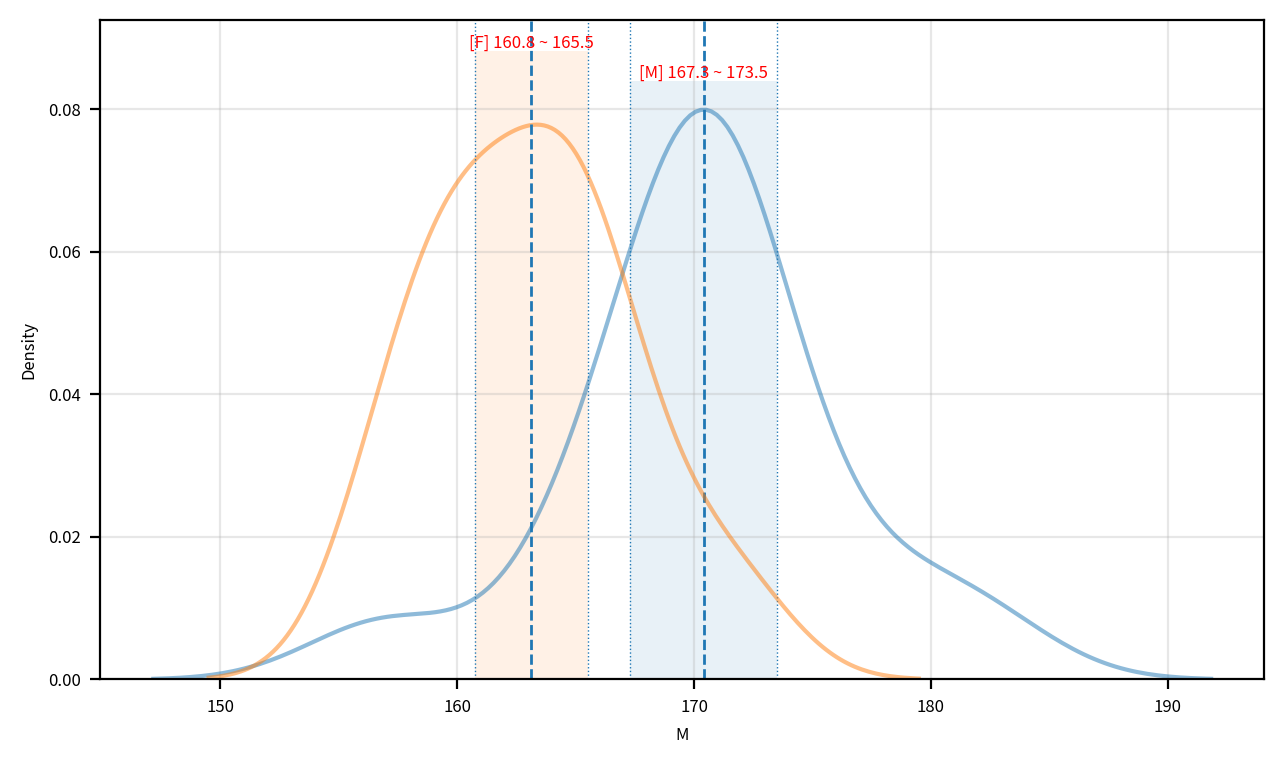

각 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 잇으며, 각 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 각 그룹 모두 표본 평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.


In [136]:
# 확인할 데이터
data=k[['M','F']]

width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

mean_check=True

for c in data.columns:
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 신뢰구간
    max=data[c].max()
    clevel=0.95
    dof=len(data[c])-1
    sp_mean=data[c].mean()
    sp_std=data[c].std(ddof=1)
    sp_std_error=sp_std/sqrt(len(data[c]))
    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax=ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s='[%s] %0.1f ~ %0.1f'%(c, cmin, cmax),
            horizontalalignment='center',
            verticalalignment='bottom',
            fontdict={'size':6, 'color':'red'})
    
    mean_check=mean_check and (sp_mean>cmin) and (sp_mean<cmax)

ax.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

print('각 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 잇으며, 각 그룹의 데이터 분포가 서로 다르다고 할 수 있다.')
print('또한 각 그룹 모두 표본 평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.') if mean_check else print('하지만 표본 평균이 신뢰구간에 포함되어 있지 않은 그룹이 있기에, 데이터가 정상범위에 있지 않다고 할 수 있다.')

In [138]:
data=k[['M','F']]

equal_var_fields=[]
normal_dist=True
report=[]

for c in data.columns:
    s, p=normaltest(data[c])

    normalize=(p>0.05)
    report.append({
        'field':c,
        'statistic':s,
        'p-value':p,
        'result':normalize
    })
    normal_dist=normal_dist and normalize

if len(data.columns)>1:
    if normal_dist:
        n='Bartlett'
        s, p=bartlett(*data.values.T)
        homos=(p>0.05)
        if homos:
            print('== 이 데이터는 정규성과 등분산성을 모두 만족한다. ==')
        else:
            print('== 이 데이터는 정규성은 만족하지만, 등분산성을 만족하지 못한다 ==')
    else:
        n='Levene'
        s, p=levene(*data.values.T, center='median')
        homos=(p>0.05)
        if homos:
            print('== 이 데이터는 정규성은 만족하지 못하지만, 등분산성은 만족한다. ==')
        else:
            print('== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==')

    report.append({
        'field':n,
        'statistic':s,
        'p-value':p,
        'result':p>0.05
    })

report_df=DataFrame(report).set_index('field')
report_df

== 이 데이터는 정규성과 등분산성을 모두 만족한다. ==


,statistic,p-value,result
field,,,
M,3.245853,0.197320,True
F,0.478834,0.787086,True
Bartlett,2.055126,0.151695,True


In [139]:
# 검정할 데이터 필드명
fields=['M','F']

# 독립 여부
independency=False

# 로그 적용 여부
use_log=False

# 검정할 데이터
df=k[fields]

# 검사할 알고리즘
alternative=['two-sided', 'less', 'greater']

# 결과를 저장할 빈 리스트
result=[]

# 가설식 템플릿
fmt='μ({f0}) {0} μ({f1})'

# 등분산성 충족 여부
equal_var=True

for a in alternative:
    if use_log:
        input1=np.log(df[fields[0]])
        input2=np.log(df[fields[1]])
    else:
        input1=df[fields[0]]
        input2=df[fields[1]]
    if independency:
        s, p=ttest_ind(input1, input2, alternative=a, equal_var=homos)
    else:
        if homos:
            s, p=ttest_rel(input1, input2, alternative=a)
        else:
            s, p=mannwhitneyu(input1, input2, alternative=a)

    itp=None

    if a=='two-sided':
        itp=fmt.format('==' if p>0.05 else '≠', f0=fields[0], f1=fields[1])
        print('차이값에 대한 t 통계량의 값이 %.3f이고 이에 대응되는 유의확률이 %.3f이므로 (p<=0.05)'%(s,p), '귀무가설을 기각하고 대립가설을 채택한다.' if p<0.05 else '대립가설을 기각하고 귀무가설을 채택한다.')
    if a=='less':
        itp=fmt.format('>=' if p>0.05 else '<', f0=fields[0], f1=fields[1])
    if a=='greater':
        itp=fmt.format('<=' if p>0.05 else '>', f0=fields[0], f1=fields[1])

    result.append({
        'alternative':a,
        'statistic':s,
        'p-value':p,
        'H0':p>0.05,
        'H1':p<=0.05,
        'interpretation':itp
    })

    if a=='two-sided' and p>0.05:
        break

rdf=DataFrame(result)
rdf.set_index('alternative', inplace=True)
rdf

차이값에 대한 t 통계량의 값이 5.312이고 이에 대응되는 유의확률이 0.000이므로 (p<=0.05) 귀무가설을 기각하고 대립가설을 채택한다.


,statistic,p-value,H0,H1,interpretation
alternative,,,,,
two-sided,5.312335,0.000110,False,True,μ(M) ≠ μ(F)
less,5.312335,0.999945,True,False,μ(M) >= μ(F)
greater,5.312335,0.000055,False,True,μ(M) > μ(F)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

M vs. F: t-test paired samples, P_val:1.097e-04 t=5.312e+00


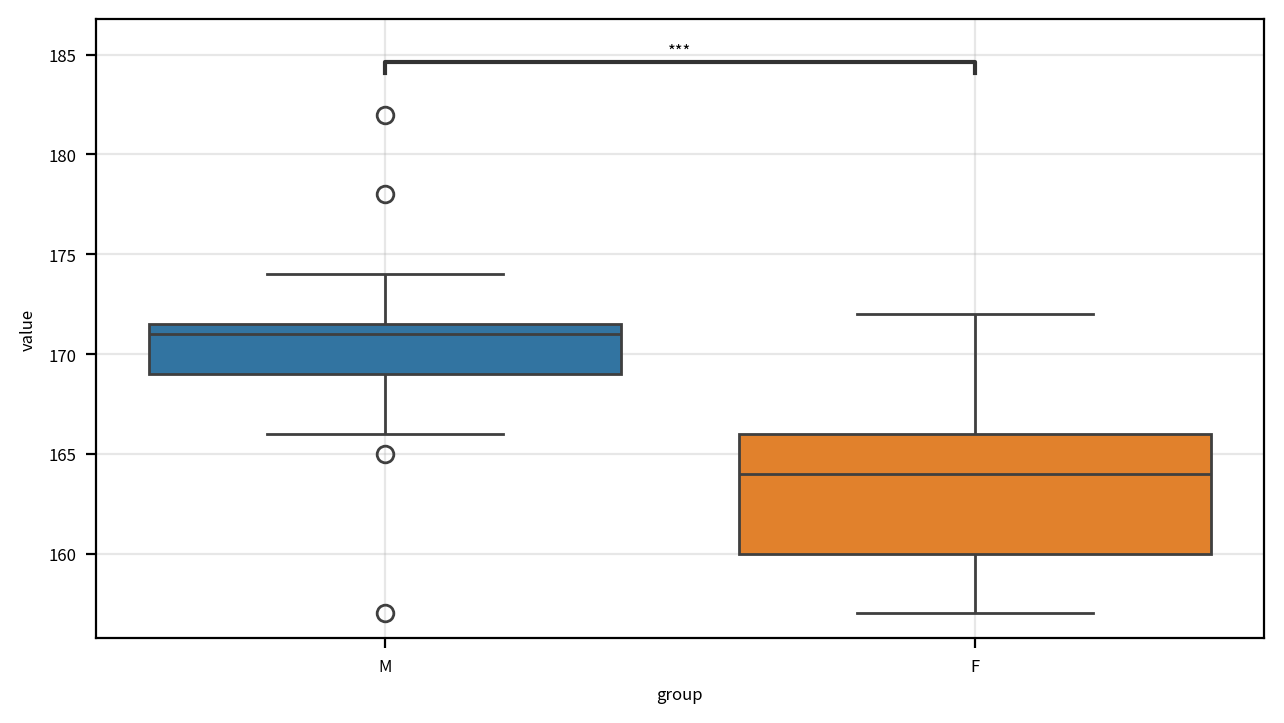

In [140]:
# 검정할 데이터 필드명
fields=['M','F']

# 검정 방법
# 't-test_ind', 't-test_paired', 't-test_welch', 'Mann-Whitney', 'Mann-Whitney-gt', 'Mann-Whitney-ls', 'Levene', 'Wilcoxon', 'Kruskal'
if independency and homos:
    test_method='t-test_ind'
if independency and not homos:
    test_method='t-test_welch'
if not independency and homos:
    test_method='t-test_paired'
if not independency and not homos:
    test_method='Mann-Whitney'

# 데이터 재배치
df=melt(k[fields], value_vars=fields, var_name='group', value_name='value')

# 1. 그래프 초기화
width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.boxplot(data=df, x='group', y='value', hue='group')
annotator=Annotator(ax, data=df, x='group', y='value', pairs=[fields])
annotator.configure(test=test_method)
annotator.apply_and_annotate()

# 3. 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

# 🌲 소나무

tree_weight 데이터셋은 소나무 품종별 무게를 조사한 데이터이다.  
소나무 품종별로 평균 무게에 차이가 있는 지 분석하라.

In [1]:
from hossam import load_data
from pandas import melt, DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from math import sqrt

from scipy.stats import t, normaltest, bartlett, levene, f_oneway, ttest_ind

from pingouin import anova
from pingouin import welch_anova

from pingouin import pairwise_tukey, pairwise_tests, pairwise_gameshowell

In [3]:
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

In [2]:
origin=load_data('tree_weight')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab10_/tree_weight.xlsx
[desc] 소나무 품종별 무게를 조사한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (30, 2)
행 개수 : 30개
열 개수 : 2개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  30 non-null     float64
 1   group   30 non-null     object 
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes
None


,weight,group
0,4.17,A
1,5.58,A
2,5.18,A
3,6.11,A
4,4.50,A


In [8]:
df=origin.copy()

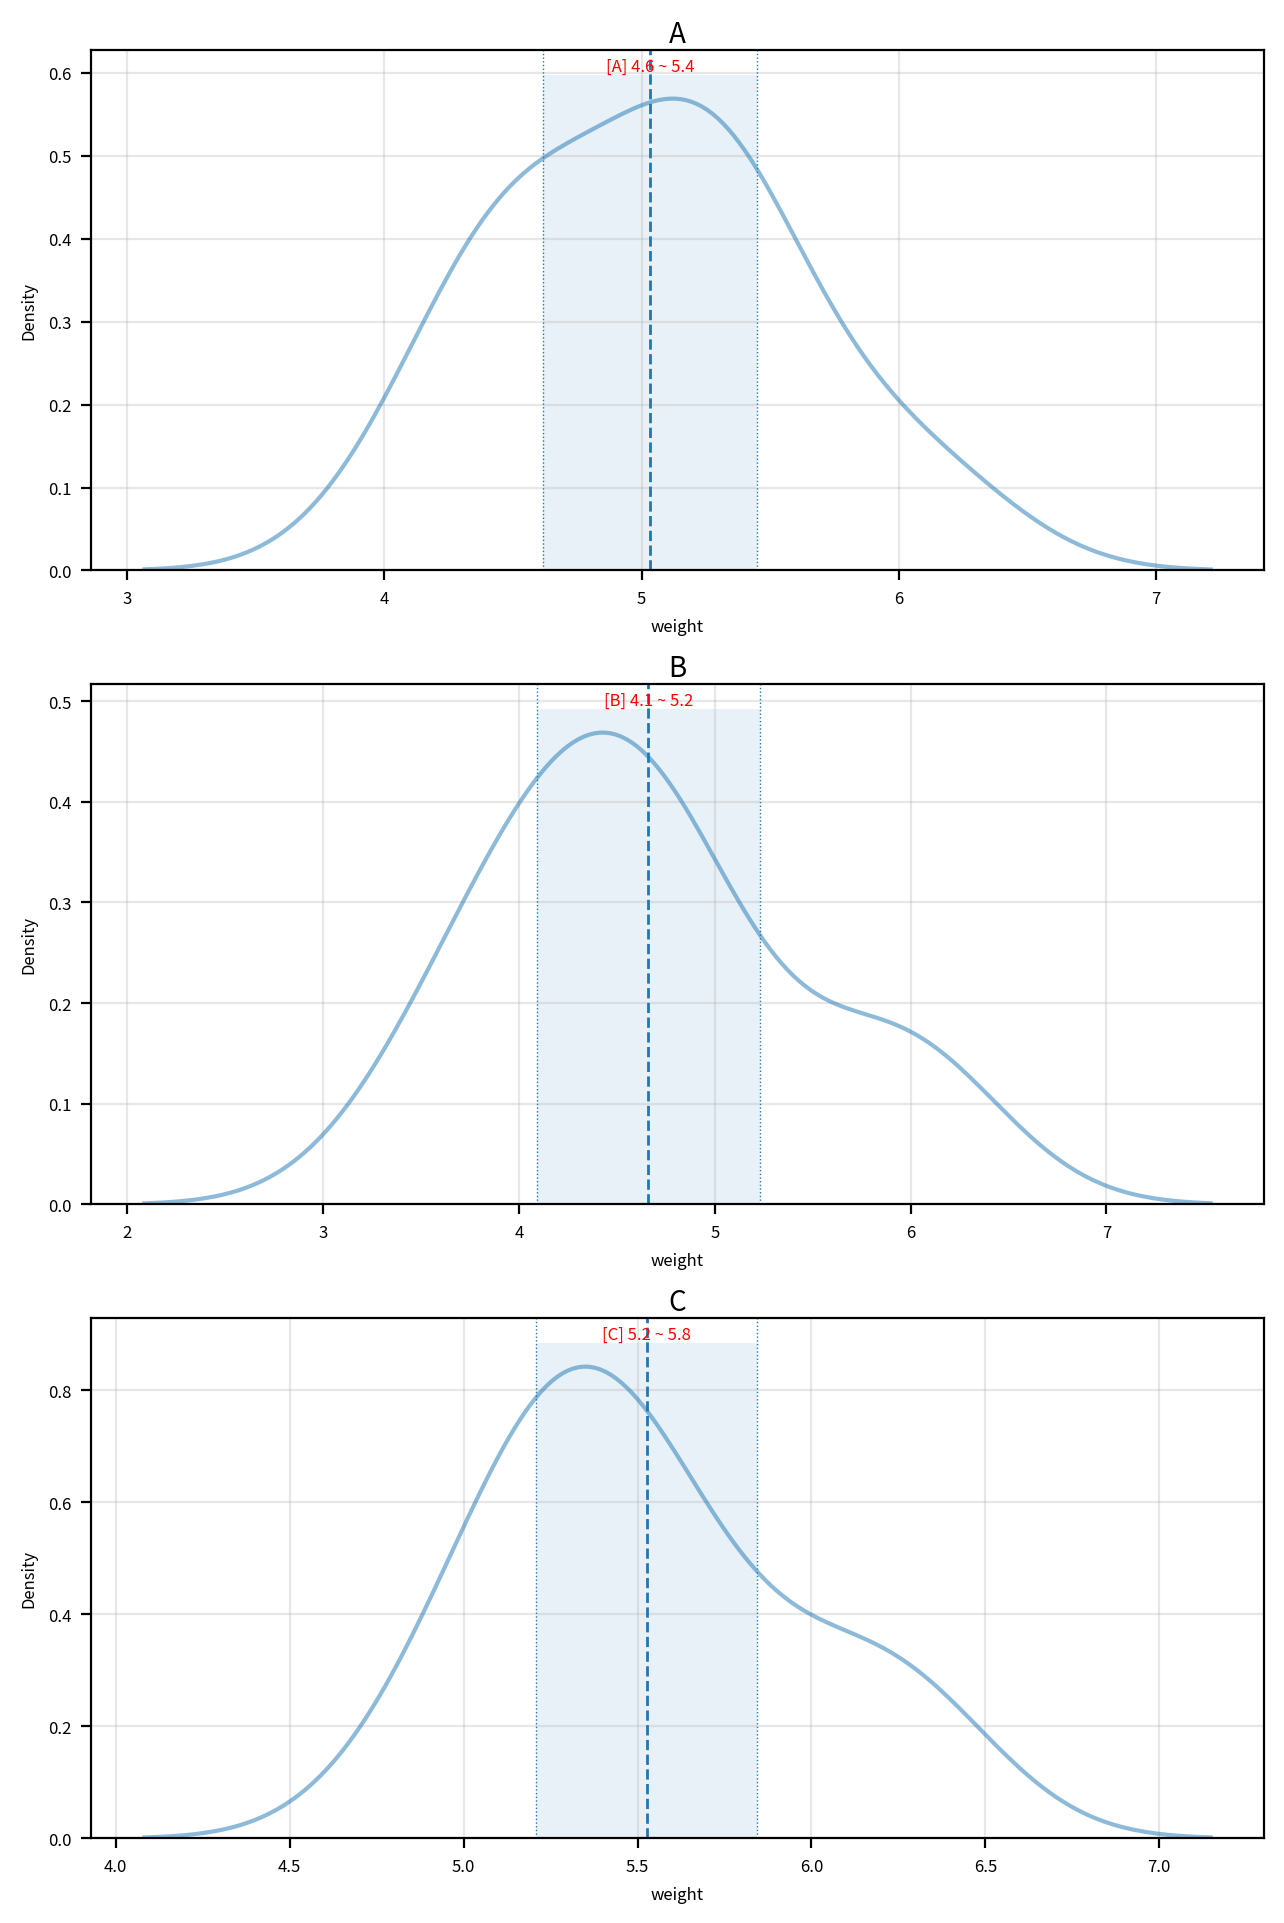

각 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 잇으며, 각 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 각 그룹 모두 표본 평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.


In [9]:
# 확인할 데이터
field='weight'
hue_field='group'
hue_values=df[hue_field].unique()
hue_count=len(hue_values)

width_px=1280
height_px=640*3
rows=3
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

mean_check=True

for i, v in enumerate(hue_values):
    temp=df[df[hue_field]==v]
    
    sb.kdeplot(data=temp, x=field, fill=False, alpha=0.5, ax=ax[i])
    ax[i].grid(True, alpha=0.3)
    ax[i].set_title(v, fontsize=10, pad=3)

    # 신뢰구간
    max=temp[field].max()
    clevel=0.95
    dof=len(temp[field])-1
    sp_mean=temp[field].mean()
    sp_std=temp[field].std(ddof=1)
    sp_std_error=sp_std/sqrt(len(temp[field]))
    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax[i].axvline(cmin, linestyle=':', linewidth=0.5)
    ax[i].axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax=ax[i].get_ylim()
    ax[i].fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax[i].axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax[i].text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s='[%s] %0.1f ~ %0.1f'%(v, cmin, cmax),
            horizontalalignment='center',
            verticalalignment='bottom',
            fontdict={'size':6, 'color':'red'})
    
    mean_check=mean_check and (sp_mean>cmin) and (sp_mean<cmax)


plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

print('각 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 잇으며, 각 그룹의 데이터 분포가 서로 다르다고 할 수 있다.')
print('또한 각 그룹 모두 표본 평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.') if mean_check else print('하지만 표본 평균이 신뢰구간에 포함되어 있지 않은 그룹이 있기에, 데이터가 정상범위에 있지 않다고 할 수 있다.')

In [10]:
groups=[(name, grp['weight']) for name, grp in df.groupby('group')]

equal_var_fields=[]
normal_dist=True
report=[]

for name, series in groups:
    s, p=normaltest(series)

    normalize=(p>0.05)
    report.append({
        'field':name,
        'statistic':s,
        'p-value':p,
        'result':normalize
    })
    normal_dist=normal_dist and normalize

if normal_dist:
    n='Bartlett'
    s, p=bartlett(*[s.values for _, s in groups])
    homos=(p>0.05)
    if homos:
        print('== 이 데이터는 정규성과 등분산성을 모두 만족한다. ==')
    else:
        print('== 이 데이터는 정규성은 만족하지만, 등분산성을 만족하지 못한다 ==')
else:
    n='Levene'
    s, p=levene(*[s.values for _, s in groups], center='median')
    homos=(p>0.05)
    if homos:
        print('== 이 데이터는 정규성은 만족하지 못하지만, 등분산성은 만족한다. ==')
    else:
        print('== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==')

equal_var=p>0.05
report.append({
    'field':n,
    'statistic':s,
    'p-value':p,
    'result':equal_var
})

report_df=DataFrame(report).set_index('field')
report_df

== 이 데이터는 정규성과 등분산성을 모두 만족한다. ==


,statistic,p-value,result
field,,,
A,0.233496,0.889810,True
B,0.967741,0.616393,True
C,1.013177,0.602548,True
Bartlett,2.878574,0.237097,True


In [11]:
anova_df=origin[['weight','group']].copy()
anova_df

,weight,group
0,4.17,A
1,5.58,A
2,5.18,A
3,6.11,A
4,4.50,A
5,4.61,A
6,5.17,A
7,4.53,A
8,5.33,A
9,5.14,A


In [13]:
if equal_var:
    pg_anova=anova(data=anova_df, dv='weight', between='group')
else:
    pg_anova=welch_anova(data=anova_df, dv='weight', between='group')

pg_anova

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,27,4.846088,0.01591,0.264148


In [14]:
f_val=pg_anova['F'].iloc[0]
p_val=pg_anova['p-unc'].iloc[0]
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(f_val, p_val, '대립' if p_val<=0.05 else '귀무')

'statistic: 4.846, p-value: 0.016, 대립가설 채택'

In [15]:
if equal_var:
    print('=== Tukey Hsd ===')
    hoc_df=pairwise_tukey(data=anova_df, dv='weight', between='group')
else:
    print('=== Games-Howell ===')
    hoc_df=pairwise_gameshowell(data=anova_df, dv='weight', between='group')

hoc_df

=== Tukey Hsd ===


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,5.032,4.661,0.371,0.278782,1.330791,0.390871,0.510237
1,A,C,5.032,5.526,-0.494,0.278782,-1.771996,0.197996,-0.914038
2,B,C,4.661,5.526,-0.865,0.278782,-3.102787,0.012006,-1.289277


> 소나무 B와 C를 비교했을 때에 p-tukey < 0.05 이므로, 소나무 B와 C 사이에는 유의미한 평균 무게 차이가 존재함을 알 수 있다.  
> 소나무 A와 B, 소나무 A와 C는 p-tukey > 0.05 이므로 유의미한 차이가 존재하지 않는다.

# 📕 독서

reading 데이터셋은 유아들을 대상으로 세 가지 읽는 방법을 비교, 실험하여 얻은 독서평가 점수 데이터이다.  
세 방법에 통계적으로 유의한 차이가 있는 지 검정하라.

In [16]:
origin=load_data('reading')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab10_/reading.xlsx
[desc] 유아들을 대상으로 세 가지 읽는 방법을 비교,실험하여 얻은 독서평가 점수 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (90, 2)
행 개수 : 90개
열 개수 : 2개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   독서방법    90 non-null     object 
 1   점수      90 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB
None


,독서방법,점수
0,B,7.7
1,B,1.5
2,B,4.3
3,B,5.4
4,B,4.3


In [17]:
df=origin.copy()

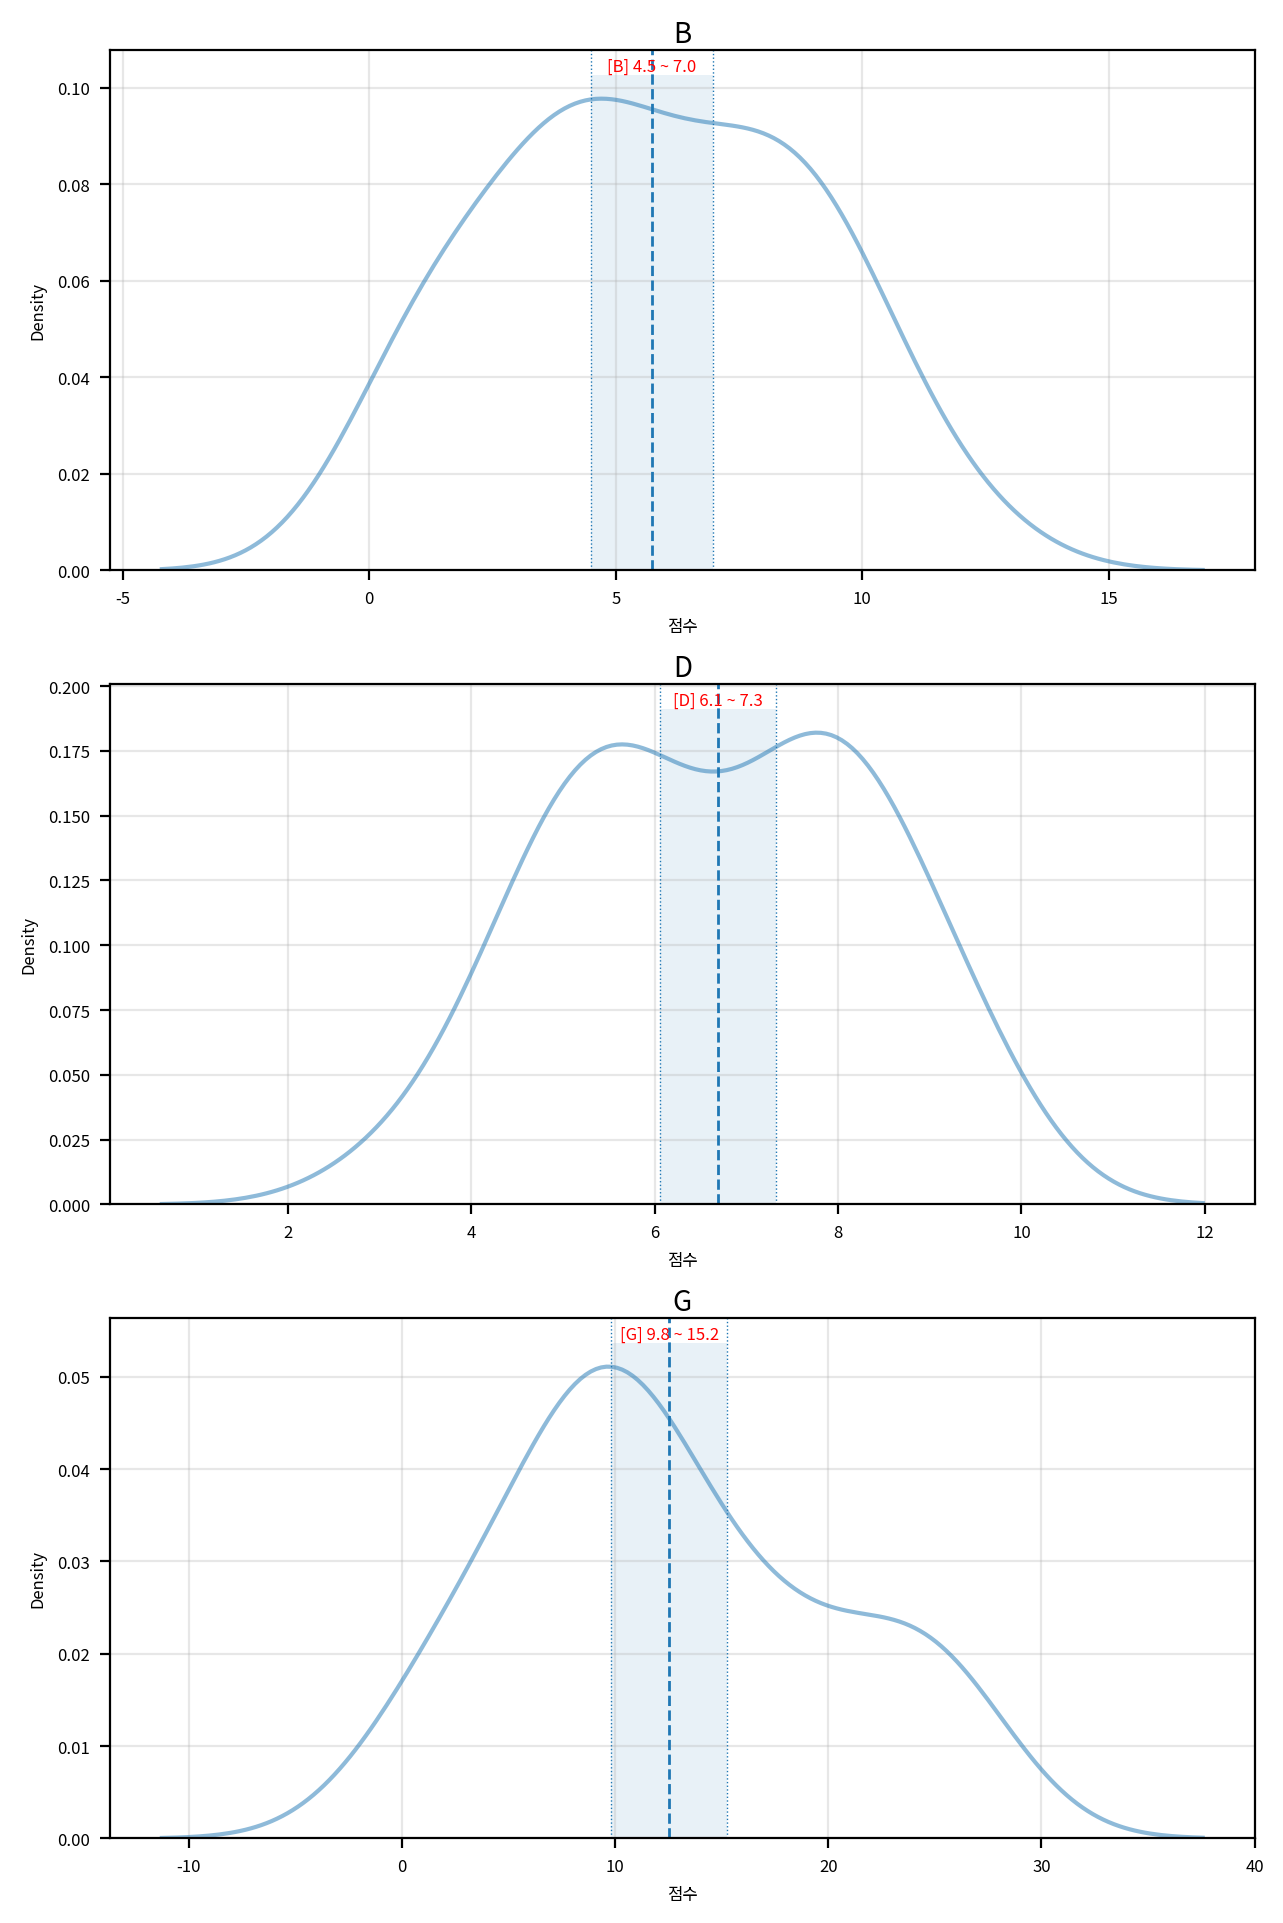

각 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 잇으며, 각 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 각 그룹 모두 표본 평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.


In [18]:
# 확인할 데이터
field='점수'
hue_field='독서방법'
hue_values=df[hue_field].unique()
hue_count=len(hue_values)

width_px=1280
height_px=640*3
rows=3
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

mean_check=True

for i, v in enumerate(hue_values):
    temp=df[df[hue_field]==v]
    
    sb.kdeplot(data=temp, x=field, fill=False, alpha=0.5, ax=ax[i])
    ax[i].grid(True, alpha=0.3)
    ax[i].set_title(v, fontsize=10, pad=3)

    # 신뢰구간
    max=temp[field].max()
    clevel=0.95
    dof=len(temp[field])-1
    sp_mean=temp[field].mean()
    sp_std=temp[field].std(ddof=1)
    sp_std_error=sp_std/sqrt(len(temp[field]))
    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax[i].axvline(cmin, linestyle=':', linewidth=0.5)
    ax[i].axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax=ax[i].get_ylim()
    ax[i].fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax[i].axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax[i].text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s='[%s] %0.1f ~ %0.1f'%(v, cmin, cmax),
            horizontalalignment='center',
            verticalalignment='bottom',
            fontdict={'size':6, 'color':'red'})
    
    mean_check=mean_check and (sp_mean>cmin) and (sp_mean<cmax)


plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

print('각 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 잇으며, 각 그룹의 데이터 분포가 서로 다르다고 할 수 있다.')
print('또한 각 그룹 모두 표본 평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.') if mean_check else print('하지만 표본 평균이 신뢰구간에 포함되어 있지 않은 그룹이 있기에, 데이터가 정상범위에 있지 않다고 할 수 있다.')

In [19]:
groups=[(name, grp['점수']) for name, grp in df.groupby('독서방법')]

equal_var_fields=[]
normal_dist=True
report=[]

for name, series in groups:
    s, p=normaltest(series)

    normalize=(p>0.05)
    report.append({
        'field':name,
        'statistic':s,
        'p-value':p,
        'result':normalize
    })
    normal_dist=normal_dist and normalize

if normal_dist:
    n='Bartlett'
    s, p=bartlett(*[s.values for _, s in groups])
    homos=(p>0.05)
    if homos:
        print('== 이 데이터는 정규성과 등분산성을 모두 만족한다. ==')
    else:
        print('== 이 데이터는 정규성은 만족하지만, 등분산성을 만족하지 못한다 ==')
else:
    n='Levene'
    s, p=levene(*[s.values for _, s in groups], center='median')
    homos=(p>0.05)
    if homos:
        print('== 이 데이터는 정규성은 만족하지 못하지만, 등분산성은 만족한다. ==')
    else:
        print('== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==')

equal_var=p>0.05
report.append({
    'field':n,
    'statistic':s,
    'p-value':p,
    'result':equal_var
})

report_df=DataFrame(report).set_index('field')
report_df

== 이 데이터는 정규성은 만족하지만, 등분산성을 만족하지 못한다 ==


,statistic,p-value,result
field,,,
B,2.210100,3.311943e-01,True
D,2.396634,3.017015e-01,True
G,2.216900,3.300701e-01,True
Bartlett,58.099241,2.420528e-13,False


In [20]:
anova_df=origin[['점수','독서방법']].copy()
anova_df

,점수,독서방법
0,7.7,B
1,1.5,B
2,4.3,B
3,5.4,B
4,4.3,B
...,...,...
85,13.6,G
86,18.4,G
87,17.0,G
88,11.7,G


In [22]:
if equal_var:
    pg_anova=anova(data=anova_df, dv='점수', between='독서방법')
else:
    pg_anova=welch_anova(data=anova_df, dv='점수', between='독서방법')

pg_anova

,Source,ddof1,ddof2,F,p-unc,np2
0,독서방법,2,48.204128,10.787455,0.000134,0.283461


In [23]:
f_val=pg_anova['F'].iloc[0]
p_val=pg_anova['p-unc'].iloc[0]
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(f_val, p_val, '대립' if p_val<=0.05 else '귀무')

'statistic: 10.787, p-value: 0.000, 대립가설 채택'

In [24]:
if equal_var:
    print('=== Tukey Hsd ===')
    hoc_df=pairwise_tukey(data=anova_df, dv='점수', between='독서방법')
else:
    print('=== Games-Howell ===')
    hoc_df=pairwise_gameshowell(data=anova_df, dv='점수', between='독서방법')

hoc_df

=== Games-Howell ===


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,B,D,5.732143,6.693333,-0.961190,0.676594,-1.420631,40.563109,0.339976,-0.375556
1,B,G,5.732143,12.531250,-6.799107,1.457054,-4.666340,42.964012,0.000088,-1.136960
2,D,G,6.693333,12.531250,-5.837917,1.362766,-4.283874,34.360873,0.000403,-1.043650


> 독서방법 B와 G, 독서방법 D와 G를 비교했을 때에 pval < 0.05 이므로, 독서방법 B와 G, 그리고 D와 G 사이에는 유의미한 평균 무게 차이가 존재함을 알 수 있다.  
> 독서방법 B와 D는 pval > 0.05 이므로 유의미한 차이가 존재하지 않는다.

# 🏢 상권 시즌2

서울시에서 정의하는 상권의 종류는 발달상권, 골목상권, 관광특구, 전통시장이 있다.  
commercial 데이터는 서울시의 2023년 상권에 따른 분기별 매출액과 매출건수에 대한 자료이다.  
상권 종류별 2023년 한 해 동안의 평균 매출액은 어떤 차이를 보이는 지 분석하라.  
주어진 데이터는 서울시에서 제공하는 집계가 완료된 데이터이므로 모든 결측치는 없는 상태이며, 이상치도 실제 매출액 데이터이므로 별도의 정제 과정 없이 진행하는 것으로 한다.

In [25]:
origin=load_data('commercial')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab10_/commercial.xlsx
[desc] 서울시의 2023년 상권에 따른 분기별 매출액과 매출건수에 대한 자료 (출처: 서울 열린데이터 광장)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (6222, 6)
행 개수 : 6222개
열 개수 : 6개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6222 entries, 0 to 6221
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   quarter          6222 non-null   int64 
 1   code             6222 non-null   int64 
 2   type             6222 non-null   object
 3   name             6222 non-null   object
 4   sales_amount     6222 non-null   int64 
 5   number_of_sales  6222 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 291.8+ KB
None


,quarter,code,type,name,sales_amount,number_of_sales
0,1,3001491,관광특구,이태원 관광특구,72523644100,2496865
1,1,3001492,관광특구,명동 남대문 북창동 다동 무교동 관광특구,283332346393,10246122
2,1,3001493,관광특구,동대문패션타운 관광특구,81696730221,2880324
3,1,3001494,관광특구,종로·청계 관광특구,212062656625,4960006
4,1,3001495,관광특구,잠실 관광특구,231338386876,5995166


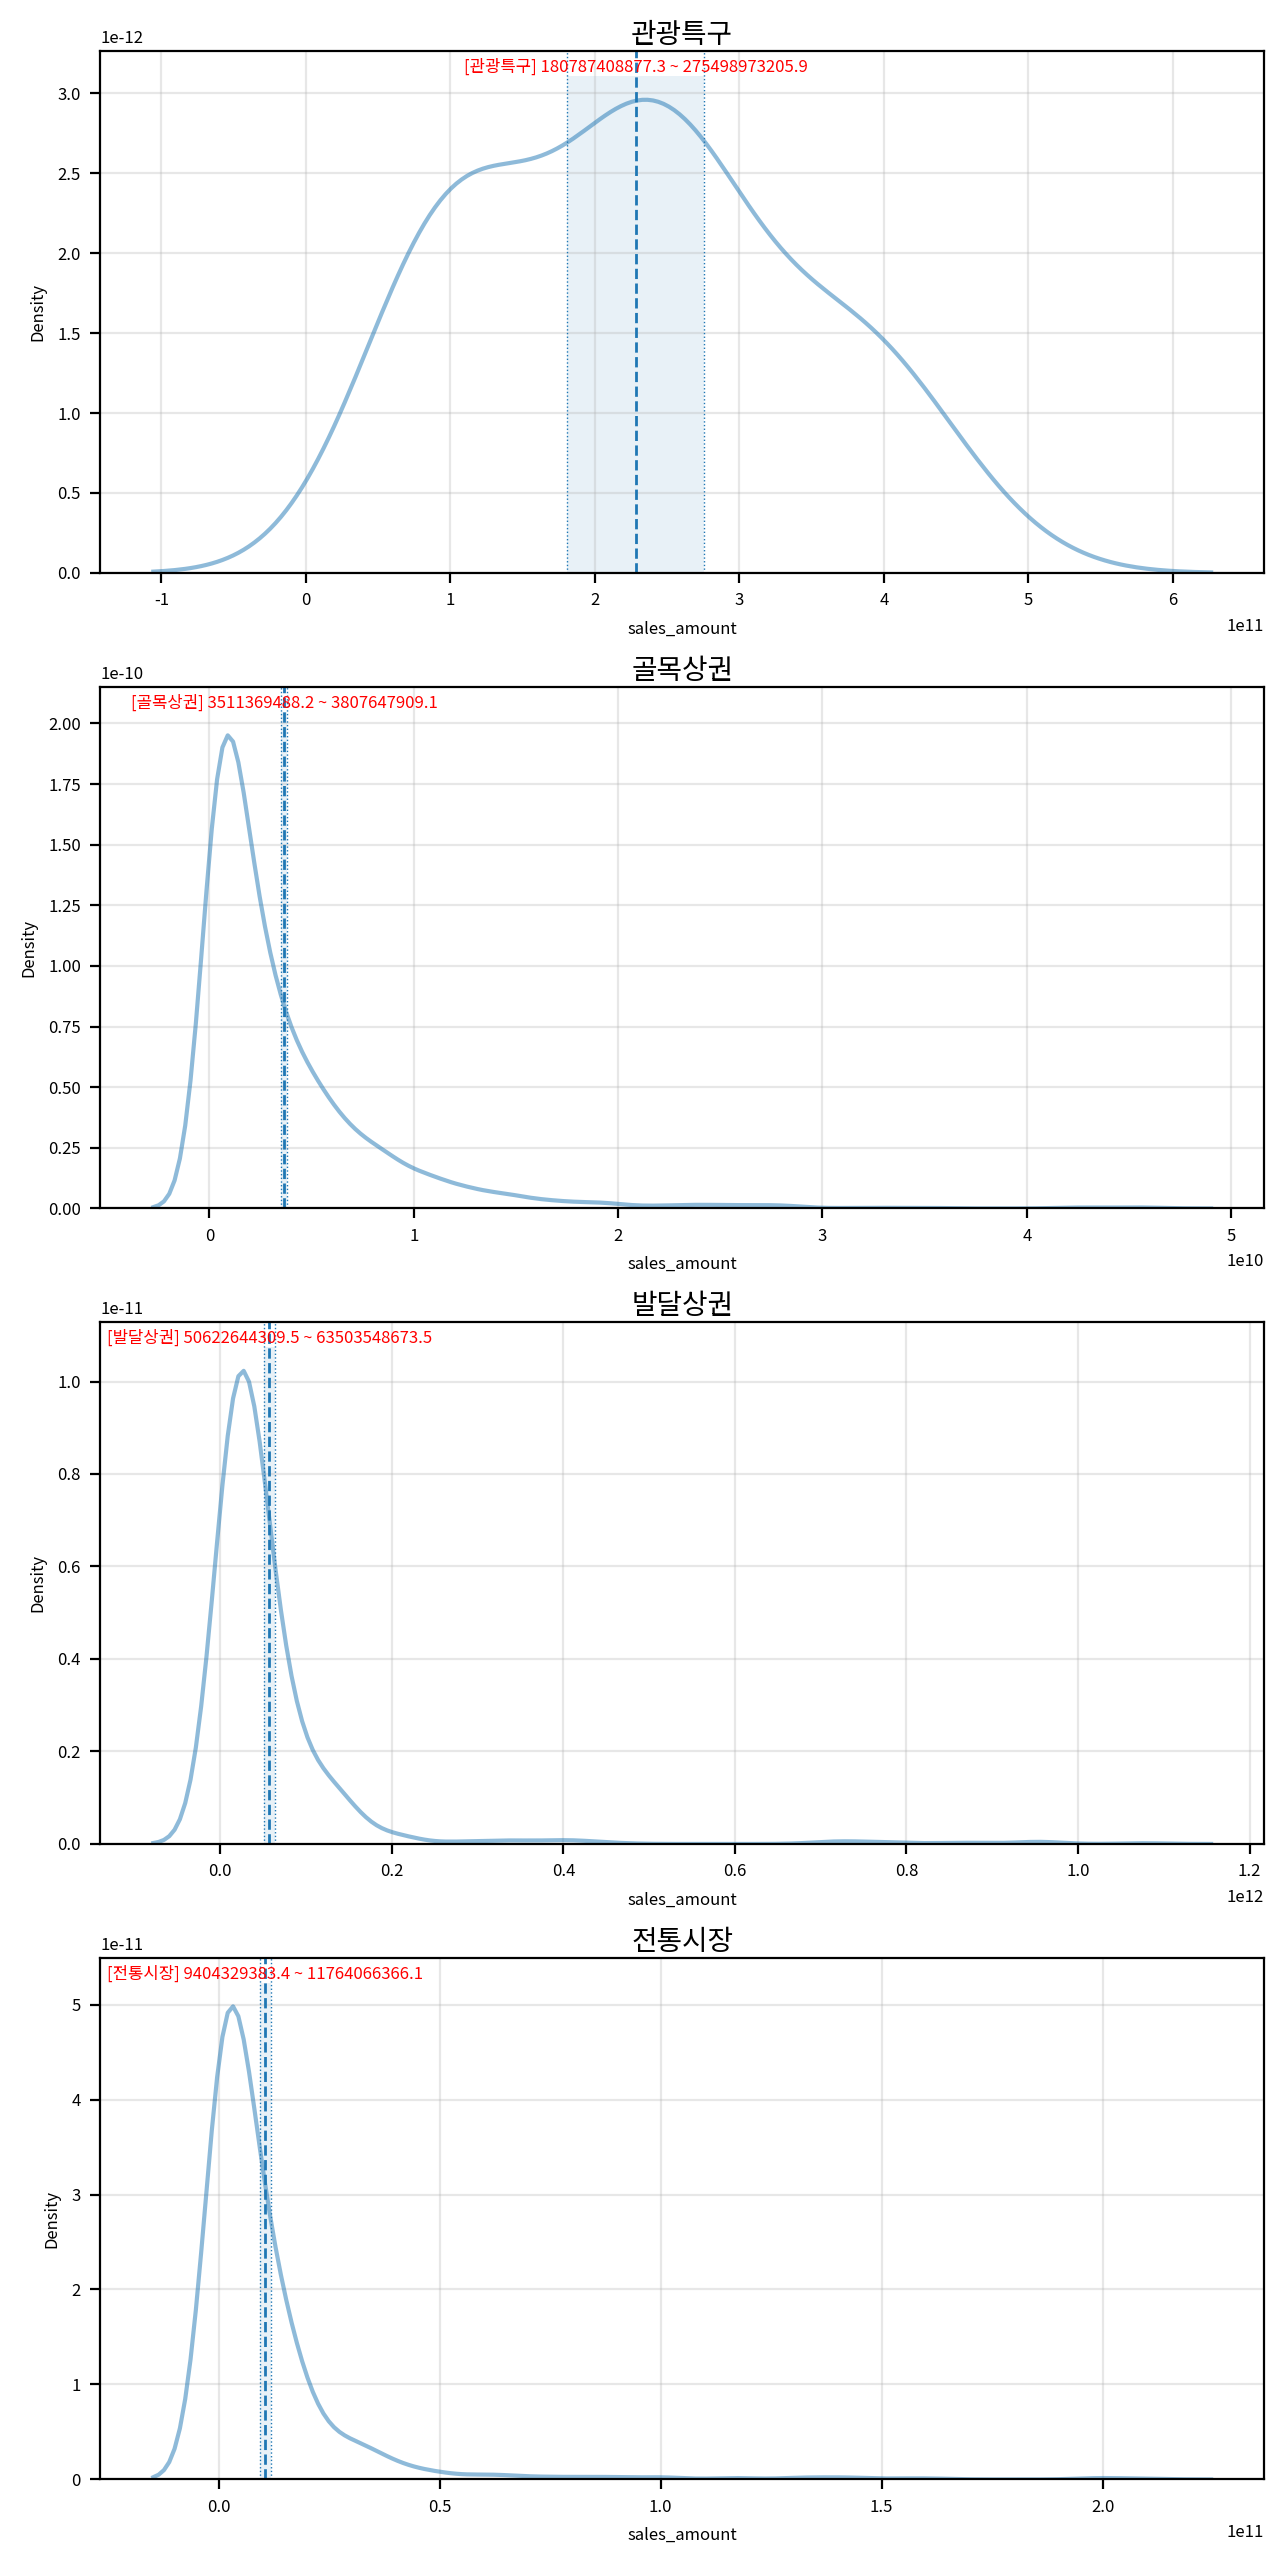

각 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 잇으며, 각 그룹의 데이터 분포가 서로 다르다고 할 수 있다.
또한 각 그룹 모두 표본 평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.


In [28]:
df=origin.copy()

# 확인할 데이터
field='sales_amount'
hue_field='type'
hue_values=df[hue_field].unique()
hue_count=len(hue_values)

width_px=1280
height_px=640*4
rows=4
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

mean_check=True

for i, v in enumerate(hue_values):
    temp=df[df[hue_field]==v]
    
    sb.kdeplot(data=temp, x=field, fill=False, alpha=0.5, ax=ax[i])
    ax[i].grid(True, alpha=0.3)
    ax[i].set_title(v, fontsize=10, pad=3)

    # 신뢰구간
    max=temp[field].max()
    clevel=0.95
    dof=len(temp[field])-1
    sp_mean=temp[field].mean()
    sp_std=temp[field].std(ddof=1)
    sp_std_error=sp_std/sqrt(len(temp[field]))
    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax[i].axvline(cmin, linestyle=':', linewidth=0.5)
    ax[i].axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax=ax[i].get_ylim()
    ax[i].fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax[i].axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax[i].text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s='[%s] %0.1f ~ %0.1f'%(v, cmin, cmax),
            horizontalalignment='center',
            verticalalignment='bottom',
            fontdict={'size':6, 'color':'red'})
    
    mean_check=mean_check and (sp_mean>cmin) and (sp_mean<cmax)


plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

print('각 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 잇으며, 각 그룹의 데이터 분포가 서로 다르다고 할 수 있다.')
print('또한 각 그룹 모두 표본 평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고 할 수 있다.') if mean_check else print('하지만 표본 평균이 신뢰구간에 포함되어 있지 않은 그룹이 있기에, 데이터가 정상범위에 있지 않다고 할 수 있다.')

In [29]:
groups=[(name, grp['sales_amount']) for name, grp in df.groupby('type')]

equal_var_fields=[]
normal_dist=True
report=[]

for name, series in groups:
    s, p=normaltest(series)

    normalize=(p>0.05)
    report.append({
        'field':name,
        'statistic':s,
        'p-value':p,
        'result':normalize
    })
    normal_dist=normal_dist and normalize

if normal_dist:
    n='Bartlett'
    s, p=bartlett(*[s.values for _, s in groups])
    homos=(p>0.05)
    if homos:
        print('== 이 데이터는 정규성과 등분산성을 모두 만족한다. ==')
    else:
        print('== 이 데이터는 정규성은 만족하지만, 등분산성을 만족하지 못한다 ==')
else:
    n='Levene'
    s, p=levene(*[s.values for _, s in groups], center='median')
    homos=(p>0.05)
    if homos:
        print('== 이 데이터는 정규성은 만족하지 못하지만, 등분산성은 만족한다. ==')
    else:
        print('== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==')

equal_var=p>0.05
report.append({
    'field':n,
    'statistic':s,
    'p-value':p,
    'result':equal_var
})

report_df=DataFrame(report).set_index('field')
report_df

== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==


,statistic,p-value,result
field,,,
골목상권,2949.769498,0.000000e+00,False
관광특구,2.023450,3.635912e-01,True
발달상권,1174.363632,9.776365e-256,False
전통시장,1194.779826,3.604601e-260,False
Levene,268.725277,5.300718e-164,False


In [30]:
anova_df=origin[['type', 'sales_amount']].copy()
anova_df

,type,sales_amount
0,관광특구,72523644100
1,관광특구,283332346393
2,관광특구,81696730221
3,관광특구,212062656625
4,관광특구,231338386876
...,...,...
6217,전통시장,13523478306
6218,전통시장,6236556030
6219,전통시장,3973269286
6220,전통시장,15013907999


In [31]:
if equal_var:
    pg_anova=anova(data=anova_df, dv='sales_amount', between='type')
else:
    pg_anova=welch_anova(data=anova_df, dv='sales_amount', between='type')

pg_anova

,Source,ddof1,ddof2,F,p-unc,np2
0,type,3,110.238825,161.432719,3.495920e-40,0.228001


In [32]:
f_val=pg_anova['F'].iloc[0]
p_val=pg_anova['p-unc'].iloc[0]
'statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(f_val, p_val, '대립' if p_val<=0.05 else '귀무')

'statistic: 161.433, p-value: 0.000, 대립가설 채택'

In [33]:
if equal_var:
    print('=== Tukey HSD ===')
    hoc_df=pairwise_tukey(data=anova_df, dv='sales_amount', between='type')
else:
    print('=== Games-Howell ===')
    hoc_df=pairwise_gameshowell(data=anova_df, dv='sales_amount', between='type')

hoc_df

=== Games-Howell ===


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,골목상권,관광특구,3.659509e+09,2.281432e+11,-2.244837e+11,2.289216e+10,-9.806138,23.000501,6.410146e-09,-23.206979
1,골목상권,발달상권,3.659509e+09,5.706310e+10,-5.340359e+10,3.282878e+09,-16.267309,996.054989,7.271961e-14,-1.160433
2,골목상권,전통시장,3.659509e+09,1.058420e+10,-6.924689e+09,6.060559e+08,-11.425826,1143.188337,0.000000e+00,-0.679464
3,관광특구,발달상권,2.281432e+11,5.706310e+10,1.710801e+11,2.312611e+10,7.397704,23.954998,7.128281e-07,1.647276
4,관광특구,전통시장,2.281432e+11,1.058420e+10,2.175590e+11,2.289993e+10,9.500421,23.031751,1.140238e-08,8.536768
5,발달상권,전통시장,5.706310e+10,1.058420e+10,4.647890e+10,3.336641e+09,13.929848,1061.849622,3.926859e-13,0.638976


> 모든 상권들의 pval 값이 0.05보다 작으므로, 각 상권들의 평균 매출액은 서로 차이가 있음을 보여주고 있다.  
> 상권 별 평균 매출액을 크기 순으로 나열하면 "관광특구 > 발달상권 > 전통시장 > 골목상권"이 된다.

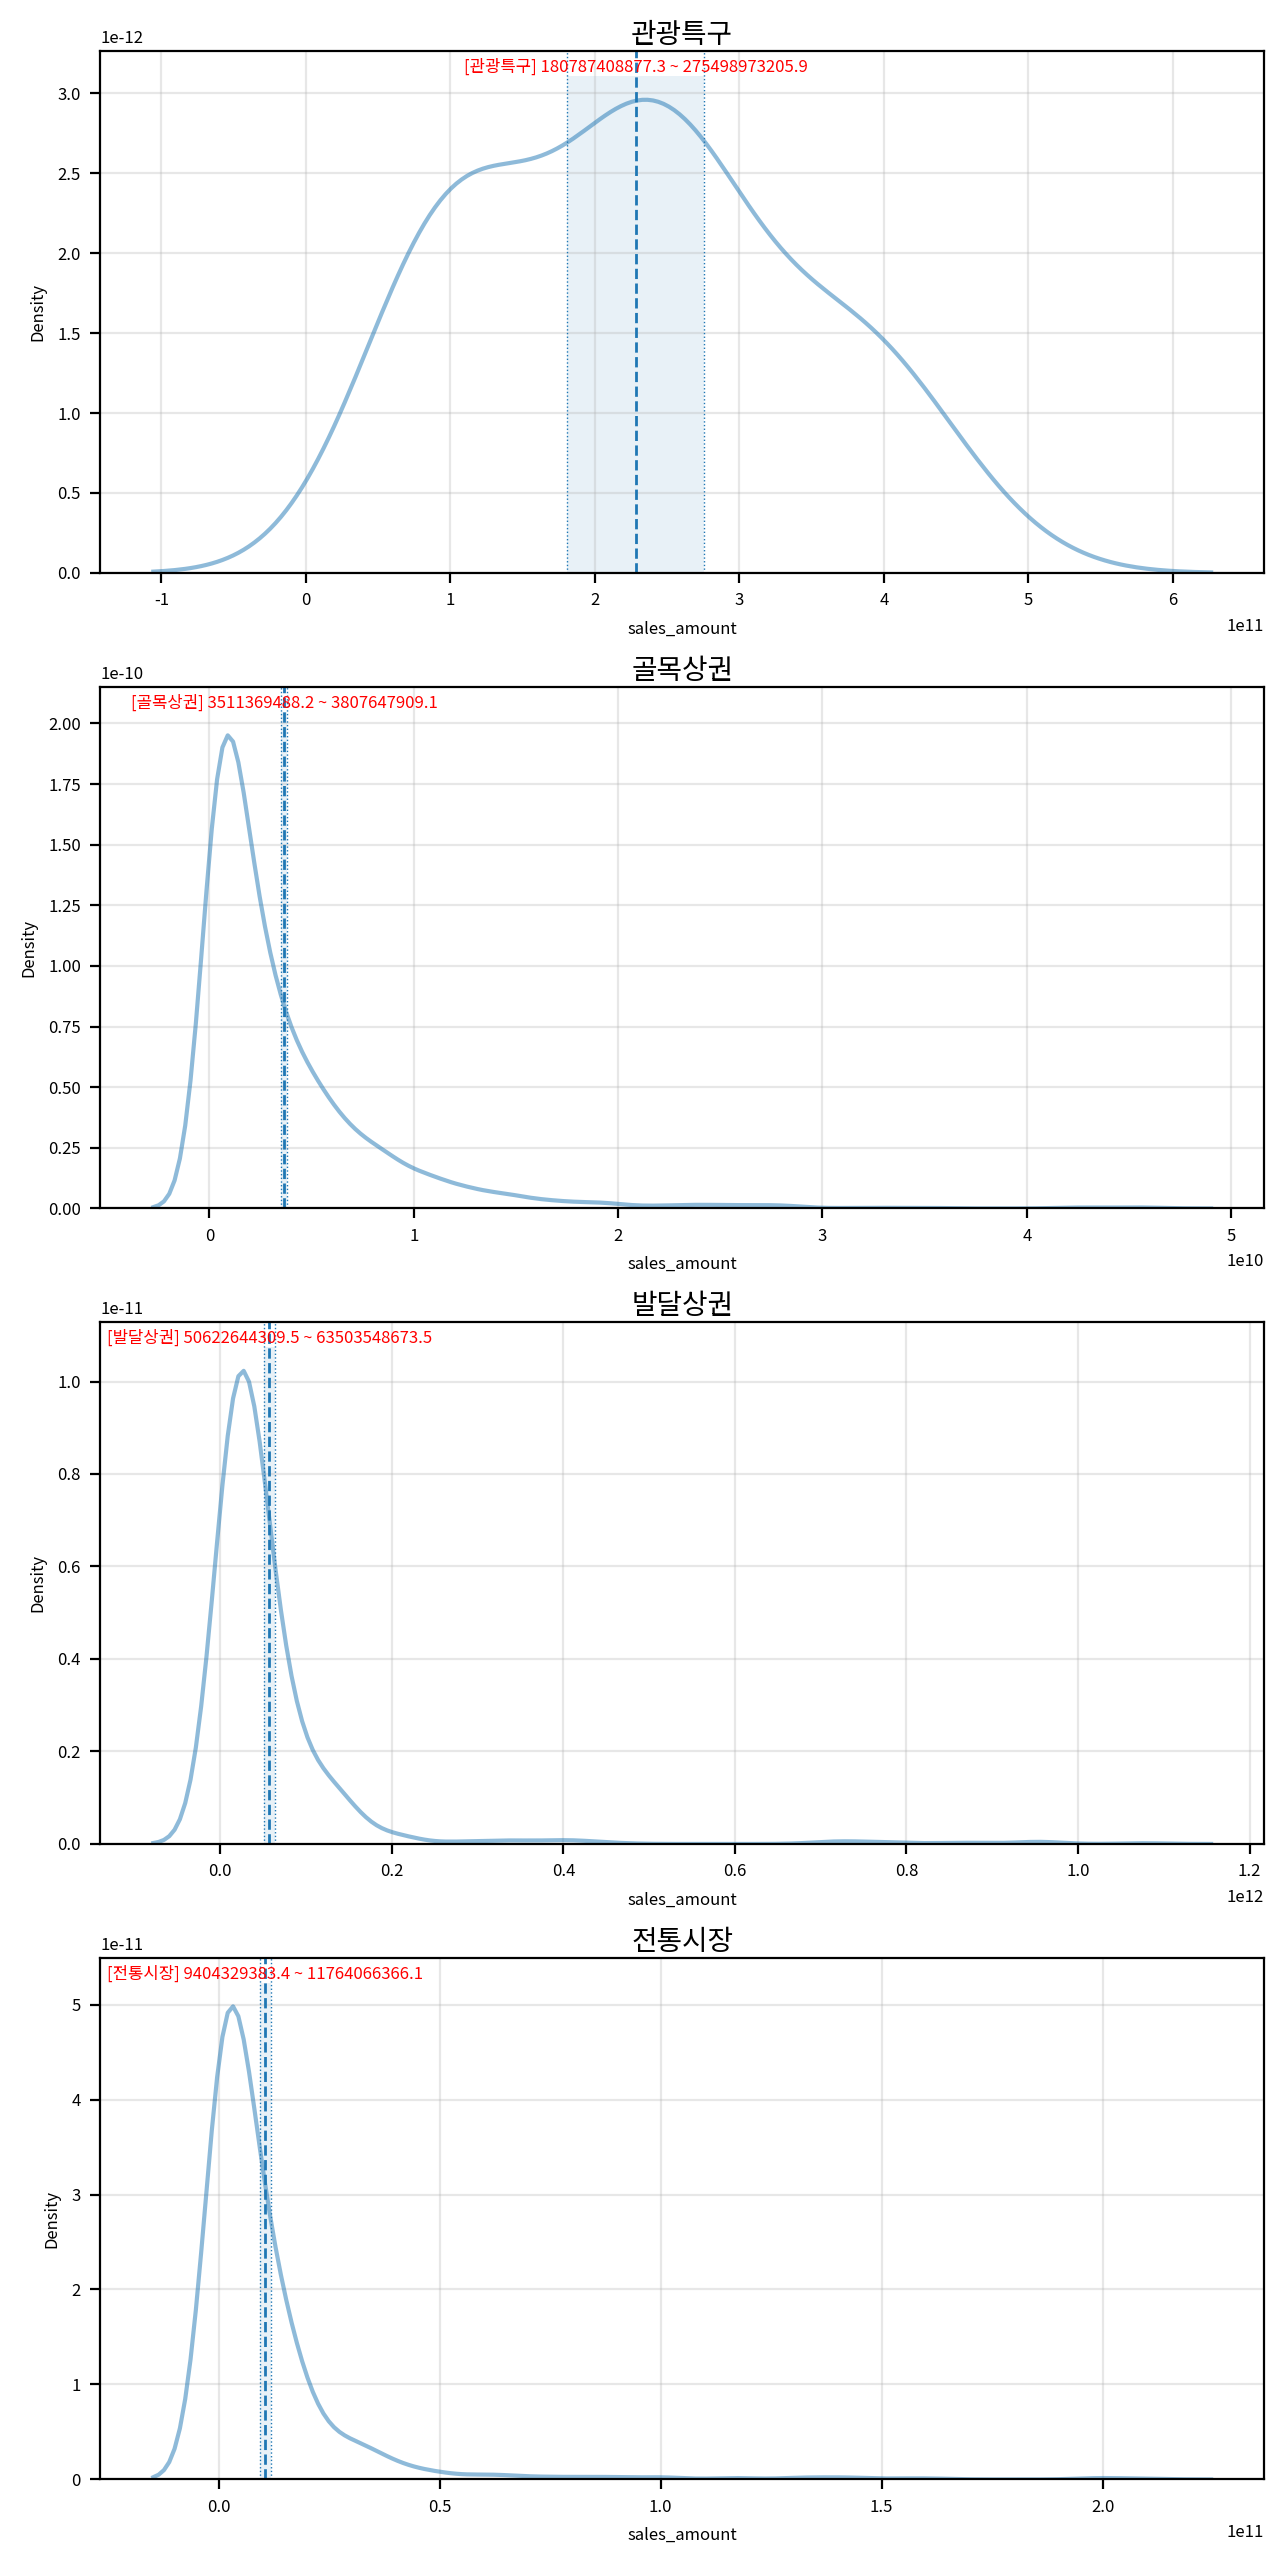

== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==


,statistic,p-value,result
field,,,
골목상권,2949.769498,0.000000e+00,False
관광특구,2.023450,3.635912e-01,True
발달상권,1174.363632,9.776365e-256,False
전통시장,1194.779826,3.604601e-260,False
Levene,268.725277,5.300718e-164,False


statistic: 161.433, p-value: 0.000, 대립가설 채택
=== Games-Howell ===


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,골목상권,관광특구,3.659509e+09,2.281432e+11,-2.244837e+11,2.289216e+10,-9.806138,23.000501,6.410146e-09,-23.206979
1,골목상권,발달상권,3.659509e+09,5.706310e+10,-5.340359e+10,3.282878e+09,-16.267309,996.054989,7.271961e-14,-1.160433
2,골목상권,전통시장,3.659509e+09,1.058420e+10,-6.924689e+09,6.060559e+08,-11.425826,1143.188337,0.000000e+00,-0.679464
3,관광특구,발달상권,2.281432e+11,5.706310e+10,1.710801e+11,2.312611e+10,7.397704,23.954998,7.128281e-07,1.647276
4,관광특구,전통시장,2.281432e+11,1.058420e+10,2.175590e+11,2.289993e+10,9.500421,23.031751,1.140238e-08,8.536768
5,발달상권,전통시장,5.706310e+10,1.058420e+10,4.647890e+10,3.336641e+09,13.929848,1061.849622,3.926859e-13,0.638976


In [34]:
df=origin.copy()

# 확인할 데이터
field='sales_amount'
hue_field='type'
hue_values=df[hue_field].unique()
hue_count=len(hue_values)

width_px=1280
height_px=640*hue_count
rows=hue_count
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for i, v in enumerate(hue_values):
    temp=df[df[hue_field]==v]
    
    sb.kdeplot(data=temp, x=field, fill=False, alpha=0.5, ax=ax[i])
    ax[i].grid(True, alpha=0.3)
    ax[i].set_title(v, fontsize=10, pad=3)

    # 신뢰구간
    max=temp[field].max()
    clevel=0.95
    dof=len(temp[field])-1
    sp_mean=temp[field].mean()
    sp_std=temp[field].std(ddof=1)
    sp_std_error=sp_std/sqrt(len(temp[field]))
    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax[i].axvline(cmin, linestyle=':', linewidth=0.5)
    ax[i].axvline(cmax, linestyle=':', linewidth=0.5)
    
    # 평균 표시
    ymin, ymax=ax[i].get_ylim()
    ax[i].fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax[i].axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax[i].text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s='[%s] %0.1f ~ %0.1f'%(v, cmin, cmax),
            horizontalalignment='center',
            verticalalignment='bottom',
            fontdict={'size':6, 'color':'red'})

plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

groups=[(name, grp[field]) for name, grp in df.groupby(hue_field)]

equal_var_fields=[]
normal_dist=True
report=[]

for name, series in groups:
    s, p=normaltest(series)

    normalize=(p>0.05)
    report.append({
        'field':name,
        'statistic':s,
        'p-value':p,
        'result':normalize
    })
    normal_dist=normal_dist and normalize

if normal_dist:
    n='Bartlett'
    s, p=bartlett(*[s.values for _, s in groups])
    homos=(p>0.05)
    if homos:
        print('== 이 데이터는 정규성과 등분산성을 모두 만족한다. ==')
    else:
        print('== 이 데이터는 정규성은 만족하지만, 등분산성을 만족하지 못한다 ==')
else:
    n='Levene'
    s, p=levene(*[s.values for _, s in groups], center='median')
    homos=(p>0.05)
    if homos:
        print('== 이 데이터는 정규성은 만족하지 못하지만, 등분산성은 만족한다. ==')
    else:
        print('== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==')

equal_var=p>0.05
report.append({
    'field':n,
    'statistic':s,
    'p-value':p,
    'result':equal_var
})

report_df=DataFrame(report).set_index('field')
display(report_df)

anova_df=origin[[field, hue_field]].copy()

if equal_var:
    pg_anova=anova(data=anova_df, dv=field, between=hue_field)
else:
    pg_anova=welch_anova(data=anova_df, dv=field, between=hue_field)

f_val=pg_anova['F'].iloc[0]
p_val=pg_anova['p-unc'].iloc[0]
print('statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(f_val, p_val, '대립' if p_val<=0.05 else '귀무'))

if equal_var:
    print('=== Tukey HSD ===')
    hoc_df=pairwise_tukey(data=anova_df, dv='sales_amount', between='type')
else:
    print('=== Games-Howell ===')
    hoc_df=pairwise_gameshowell(data=anova_df, dv='sales_amount', between='type')

display(hoc_df)

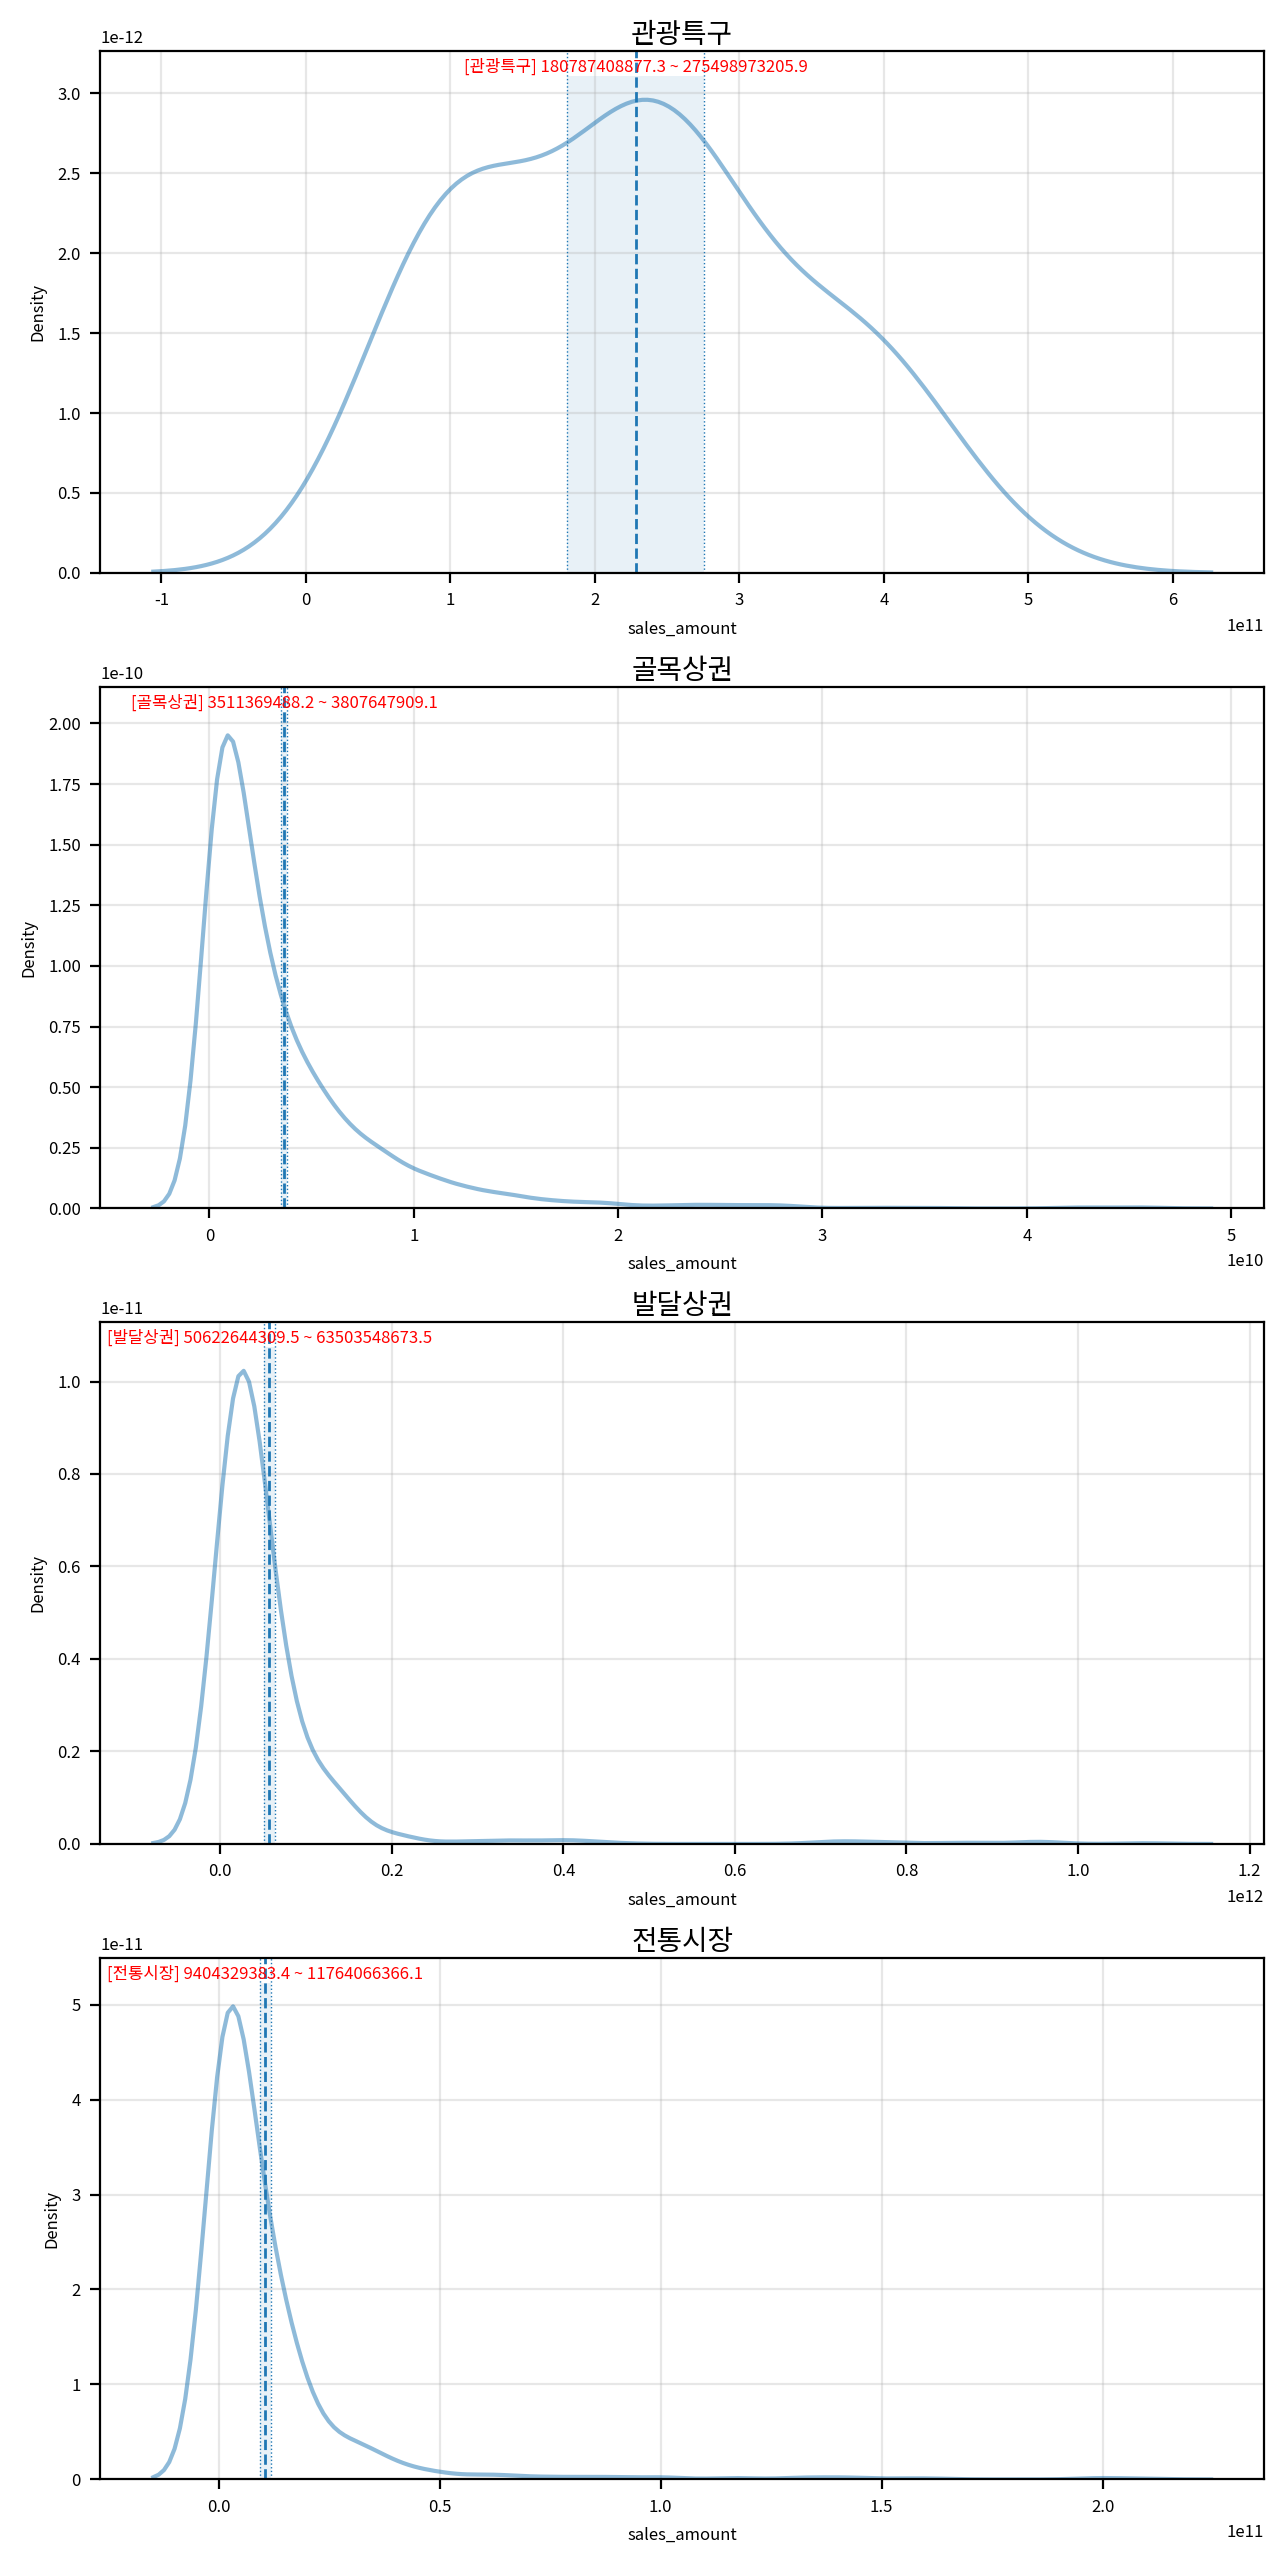

== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==


,statistic,p-value,result
field,,,
골목상권,2949.769498,0.000000e+00,False
관광특구,2.023450,3.635912e-01,True
발달상권,1174.363632,9.776365e-256,False
전통시장,1194.779826,3.604601e-260,False
Levene,268.725277,5.300718e-164,False


statistic: 161.433, p-value: 0.000, 대립가설 채택

=== Games-Howell ===


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,골목상권,관광특구,3.659509e+09,2.281432e+11,-2.244837e+11,2.289216e+10,-9.806138,23.000501,6.410146e-09,-23.206979
1,골목상권,발달상권,3.659509e+09,5.706310e+10,-5.340359e+10,3.282878e+09,-16.267309,996.054989,7.271961e-14,-1.160433
2,골목상권,전통시장,3.659509e+09,1.058420e+10,-6.924689e+09,6.060559e+08,-11.425826,1143.188337,0.000000e+00,-0.679464
3,관광특구,발달상권,2.281432e+11,5.706310e+10,1.710801e+11,2.312611e+10,7.397704,23.954998,7.128281e-07,1.647276
4,관광특구,전통시장,2.281432e+11,1.058420e+10,2.175590e+11,2.289993e+10,9.500421,23.031751,1.140238e-08,8.536768
5,발달상권,전통시장,5.706310e+10,1.058420e+10,4.647890e+10,3.336641e+09,13.929848,1061.849622,3.926859e-13,0.638976


In [35]:
df=origin.copy()

# 확인할 데이터
field='sales_amount'
hue_field='type'
hue_values=df[hue_field].unique()
hue_count=len(hue_values)

width_px=1280
height_px=640*hue_count
rows=hue_count
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for i, v in enumerate(hue_values):
    temp=df[df[hue_field]==v]
    
    sb.kdeplot(data=temp, x=field, fill=False, alpha=0.5, ax=ax[i])
    ax[i].grid(True, alpha=0.3)
    ax[i].set_title(v, fontsize=10, pad=3)

    # 신뢰구간
    max=temp[field].max()
    clevel=0.95
    dof=len(temp[field])-1
    sp_mean=temp[field].mean()
    sp_std=temp[field].std(ddof=1)
    sp_std_error=sp_std/sqrt(len(temp[field]))
    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax[i].axvline(cmin, linestyle=':', linewidth=0.5)
    ax[i].axvline(cmax, linestyle=':', linewidth=0.5)
    
    # 평균 표시
    ymin, ymax=ax[i].get_ylim()
    ax[i].fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax[i].axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax[i].text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s='[%s] %0.1f ~ %0.1f'%(v, cmin, cmax),
            horizontalalignment='center',
            verticalalignment='bottom',
            fontdict={'size':6, 'color':'red'})

plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

groups=[(name, grp[field]) for name, grp in df.groupby(hue_field)]

equal_var_fields=[]
normal_dist=True
report=[]

for name, series in groups:
    s, p=normaltest(series)

    normalize=(p>0.05)
    report.append({
        'field':name,
        'statistic':s,
        'p-value':p,
        'result':normalize
    })
    normal_dist=normal_dist and normalize

if normal_dist:
    n='Bartlett'
    s, p=bartlett(*[s.values for _, s in groups])
    homos=(p>0.05)
    if homos:
        print('== 이 데이터는 정규성과 등분산성을 모두 만족한다. ==')
    else:
        print('== 이 데이터는 정규성은 만족하지만, 등분산성을 만족하지 못한다 ==')
else:
    n='Levene'
    s, p=levene(*[s.values for _, s in groups], center='median')
    homos=(p>0.05)
    if homos:
        print('== 이 데이터는 정규성은 만족하지 못하지만, 등분산성은 만족한다. ==')
    else:
        print('== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==')

equal_var=p>0.05
report.append({
    'field':n,
    'statistic':s,
    'p-value':p,
    'result':equal_var
})

report_df=DataFrame(report).set_index('field')
display(report_df)

anova_df=origin[[field, hue_field]].copy()

if equal_var:
    pg_anova=anova(data=anova_df, dv=field, between=hue_field)
else:
    pg_anova=welch_anova(data=anova_df, dv=field, between=hue_field)

f_val=pg_anova['F'].iloc[0]
p_val=pg_anova['p-unc'].iloc[0]
print('statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(f_val, p_val, '대립' if p_val<=0.05 else '귀무'))

if equal_var:
    print('\n=== Tukey HSD ===')
    hoc_df=pairwise_tukey(data=anova_df, dv='sales_amount', between='type')
else:
    print('\n=== Games-Howell ===')
    hoc_df=pairwise_gameshowell(data=anova_df, dv='sales_amount', between='type')

display(hoc_df)

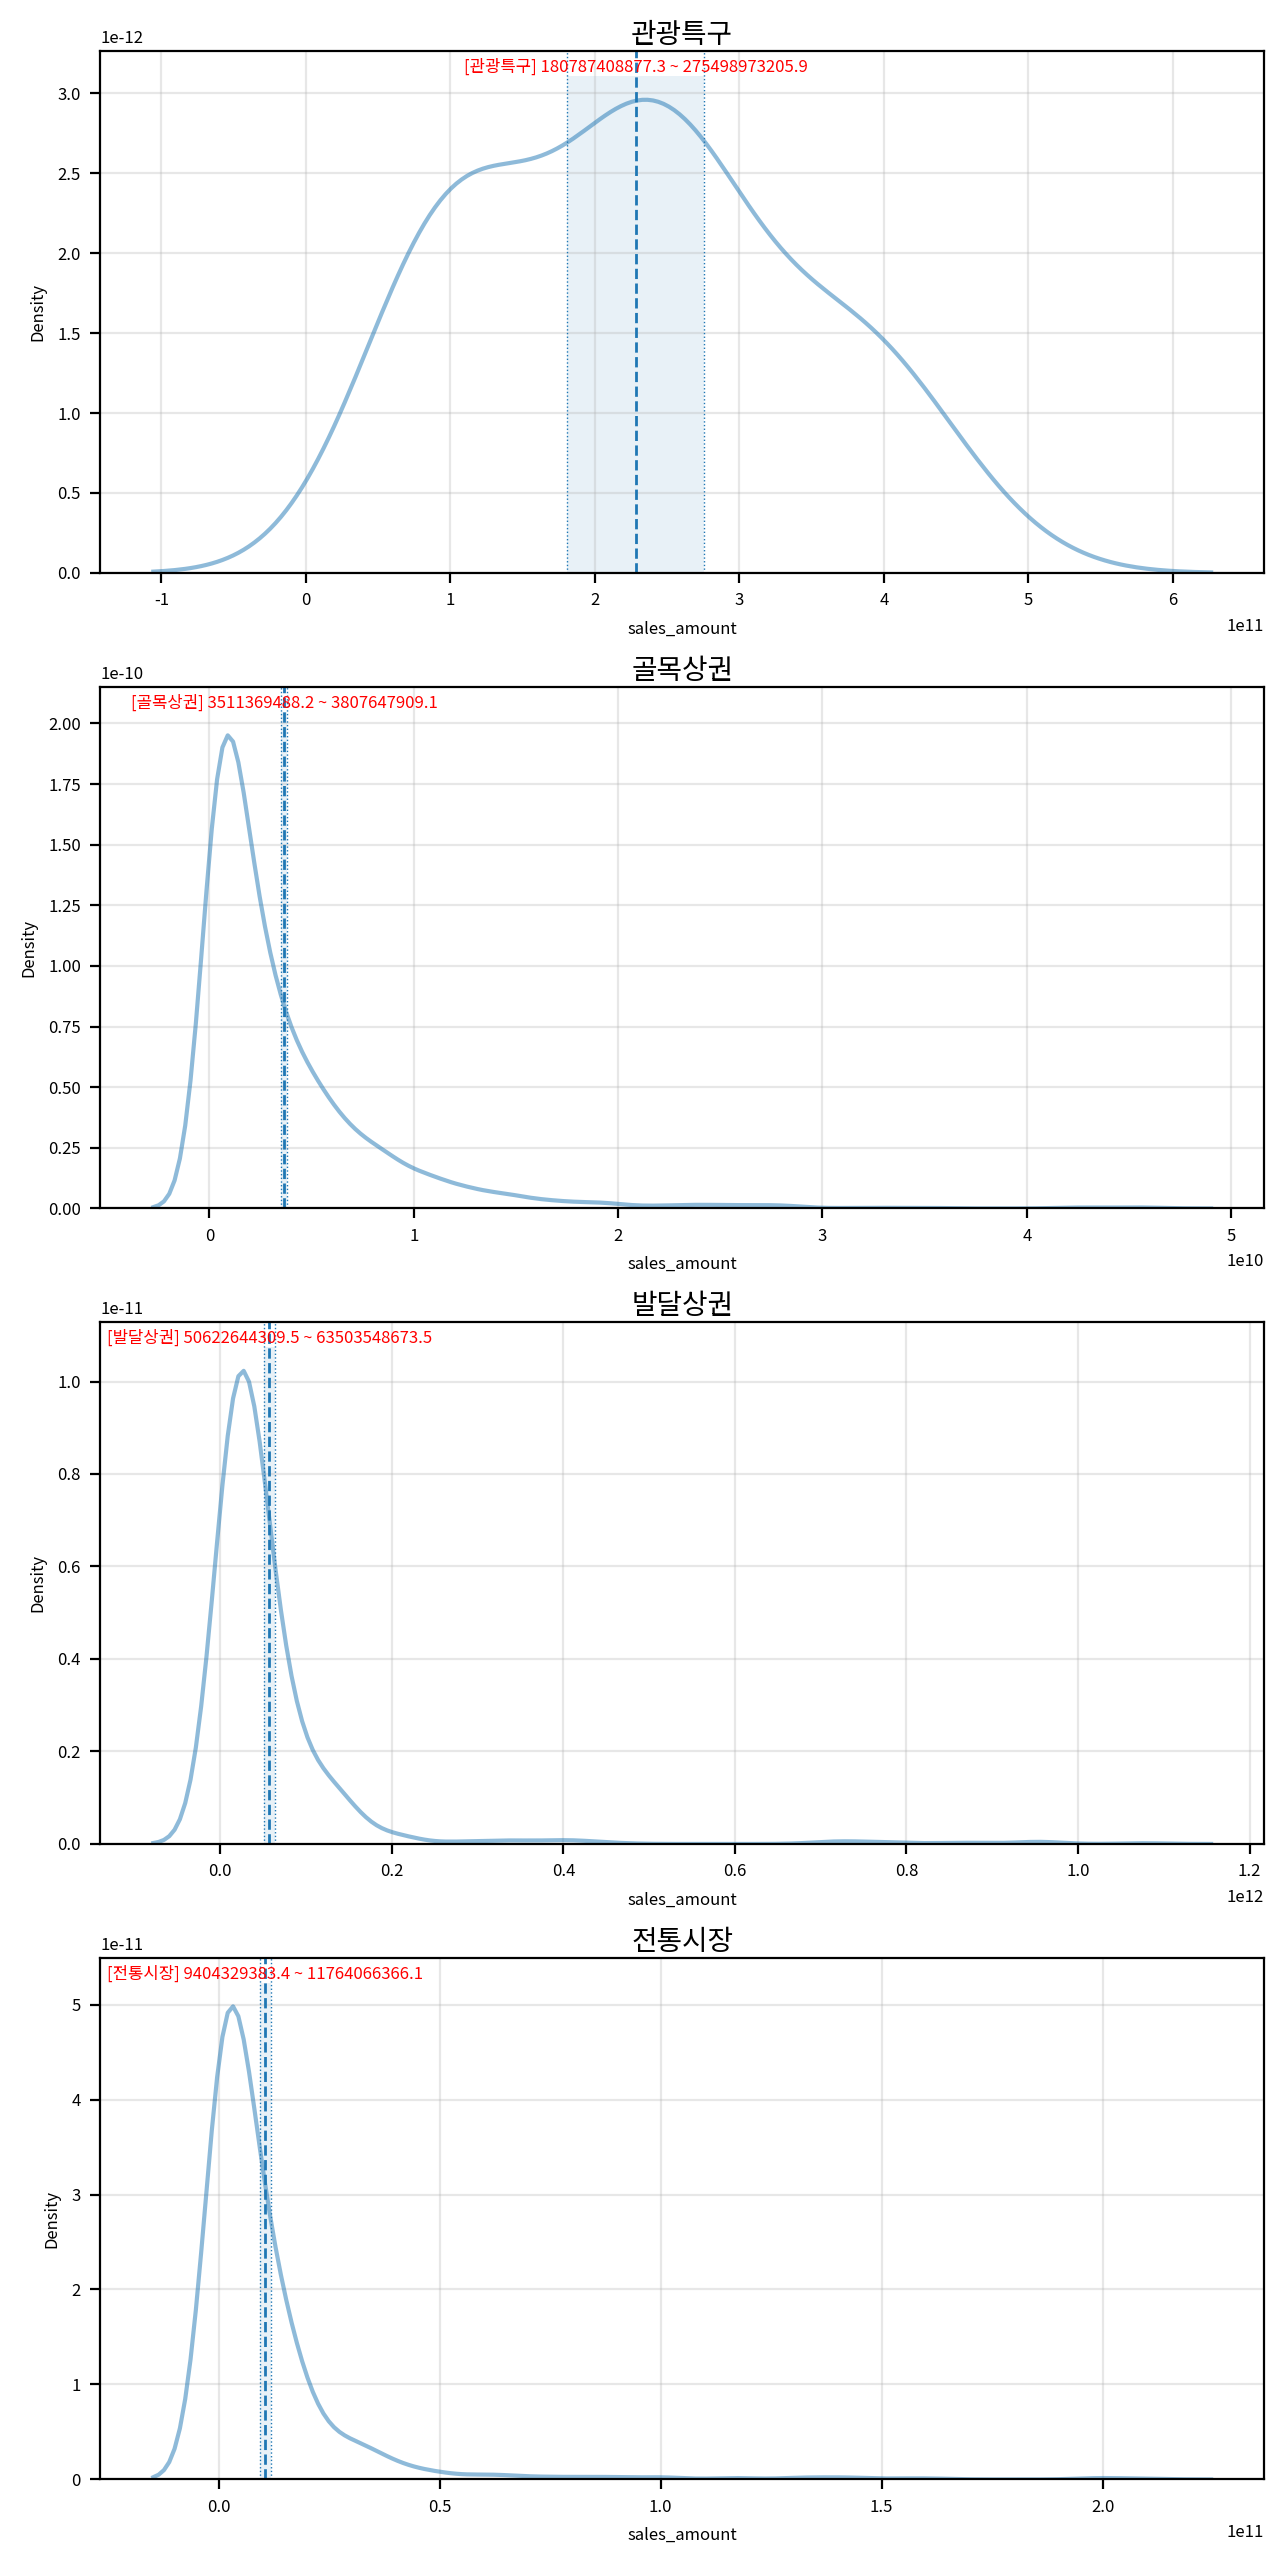

== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==


,statistic,p-value,result
field,,,
골목상권,2949.769498,0.000000e+00,False
관광특구,2.023450,3.635912e-01,True
발달상권,1174.363632,9.776365e-256,False
전통시장,1194.779826,3.604601e-260,False
Levene,268.725277,5.300718e-164,False


statistic: 161.433, p-value: 0.000, 대립가설 채택


,Source,ddof1,ddof2,F,p-unc,np2
0,type,3,110.238825,161.432719,3.495920e-40,0.228001



=== Games-Howell ===


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,골목상권,관광특구,3.659509e+09,2.281432e+11,-2.244837e+11,2.289216e+10,-9.806138,23.000501,6.410146e-09,-23.206979
1,골목상권,발달상권,3.659509e+09,5.706310e+10,-5.340359e+10,3.282878e+09,-16.267309,996.054989,7.271961e-14,-1.160433
2,골목상권,전통시장,3.659509e+09,1.058420e+10,-6.924689e+09,6.060559e+08,-11.425826,1143.188337,0.000000e+00,-0.679464
3,관광특구,발달상권,2.281432e+11,5.706310e+10,1.710801e+11,2.312611e+10,7.397704,23.954998,7.128281e-07,1.647276
4,관광특구,전통시장,2.281432e+11,1.058420e+10,2.175590e+11,2.289993e+10,9.500421,23.031751,1.140238e-08,8.536768
5,발달상권,전통시장,5.706310e+10,1.058420e+10,4.647890e+10,3.336641e+09,13.929848,1061.849622,3.926859e-13,0.638976


In [36]:
df=origin.copy()

# 확인할 데이터

field='sales_amount'
hue_field='type'
hue_values=df[hue_field].unique()
hue_count=len(hue_values)

width_px=1280
height_px=640*hue_count
rows=hue_count
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for i, v in enumerate(hue_values):
    temp=df[df[hue_field]==v]
    
    sb.kdeplot(data=temp, x=field, fill=False, alpha=0.5, ax=ax[i])
    ax[i].grid(True, alpha=0.3)
    ax[i].set_title(v, fontsize=10, pad=3)

    # 신뢰구간
    max=temp[field].max()
    clevel=0.95
    dof=len(temp[field])-1
    sp_mean=temp[field].mean()
    sp_std=temp[field].std(ddof=1)
    sp_std_error=sp_std/sqrt(len(temp[field]))
    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax[i].axvline(cmin, linestyle=':', linewidth=0.5)
    ax[i].axvline(cmax, linestyle=':', linewidth=0.5)
    
    # 평균 표시
    ymin, ymax=ax[i].get_ylim()
    ax[i].fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax[i].axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax[i].text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s='[%s] %0.1f ~ %0.1f'%(v, cmin, cmax),
            horizontalalignment='center',
            verticalalignment='bottom',
            fontdict={'size':6, 'color':'red'})

plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

groups=[(name, grp[field]) for name, grp in df.groupby(hue_field)]

equal_var_fields=[]
normal_dist=True
report=[]

for name, series in groups:
    s, p=normaltest(series)

    normalize=(p>0.05)
    report.append({
        'field':name,
        'statistic':s,
        'p-value':p,
        'result':normalize
    })
    normal_dist=normal_dist and normalize

if normal_dist:
    n='Bartlett'
    s, p=bartlett(*[s.values for _, s in groups])
    homos=(p>0.05)
    if homos:
        print('== 이 데이터는 정규성과 등분산성을 모두 만족한다. ==')
    else:
        print('== 이 데이터는 정규성은 만족하지만, 등분산성을 만족하지 못한다 ==')
else:
    n='Levene'
    s, p=levene(*[s.values for _, s in groups], center='median')
    homos=(p>0.05)
    if homos:
        print('== 이 데이터는 정규성은 만족하지 못하지만, 등분산성은 만족한다. ==')
    else:
        print('== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==')

equal_var=p>0.05
report.append({
    'field':n,
    'statistic':s,
    'p-value':p,
    'result':equal_var
})

report_df=DataFrame(report).set_index('field')
display(report_df)

anova_df=origin[[field, hue_field]].copy()

if equal_var:
    pg_anova=anova(data=anova_df, dv=field, between=hue_field)
else:
    pg_anova=welch_anova(data=anova_df, dv=field, between=hue_field)

f_val=pg_anova['F'].iloc[0]
p_val=pg_anova['p-unc'].iloc[0]
print('statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(f_val, p_val, '대립' if p_val<=0.05 else '귀무'))

if equal_var:
    pg_anova=anova(data=anova_df, dv='sales_amount', between='type')
    display(pg_anova)
    print('\n=== Tukey HSD ===')
    hoc_df=pairwise_tukey(data=anova_df, dv='sales_amount', between='type')
else:
    pg_anova=welch_anova(data=anova_df, dv='sales_amount', between='type')
    display(pg_anova)
    print('\n=== Games-Howell ===')
    hoc_df=pairwise_gameshowell(data=anova_df, dv='sales_amount', between='type')

display(hoc_df)

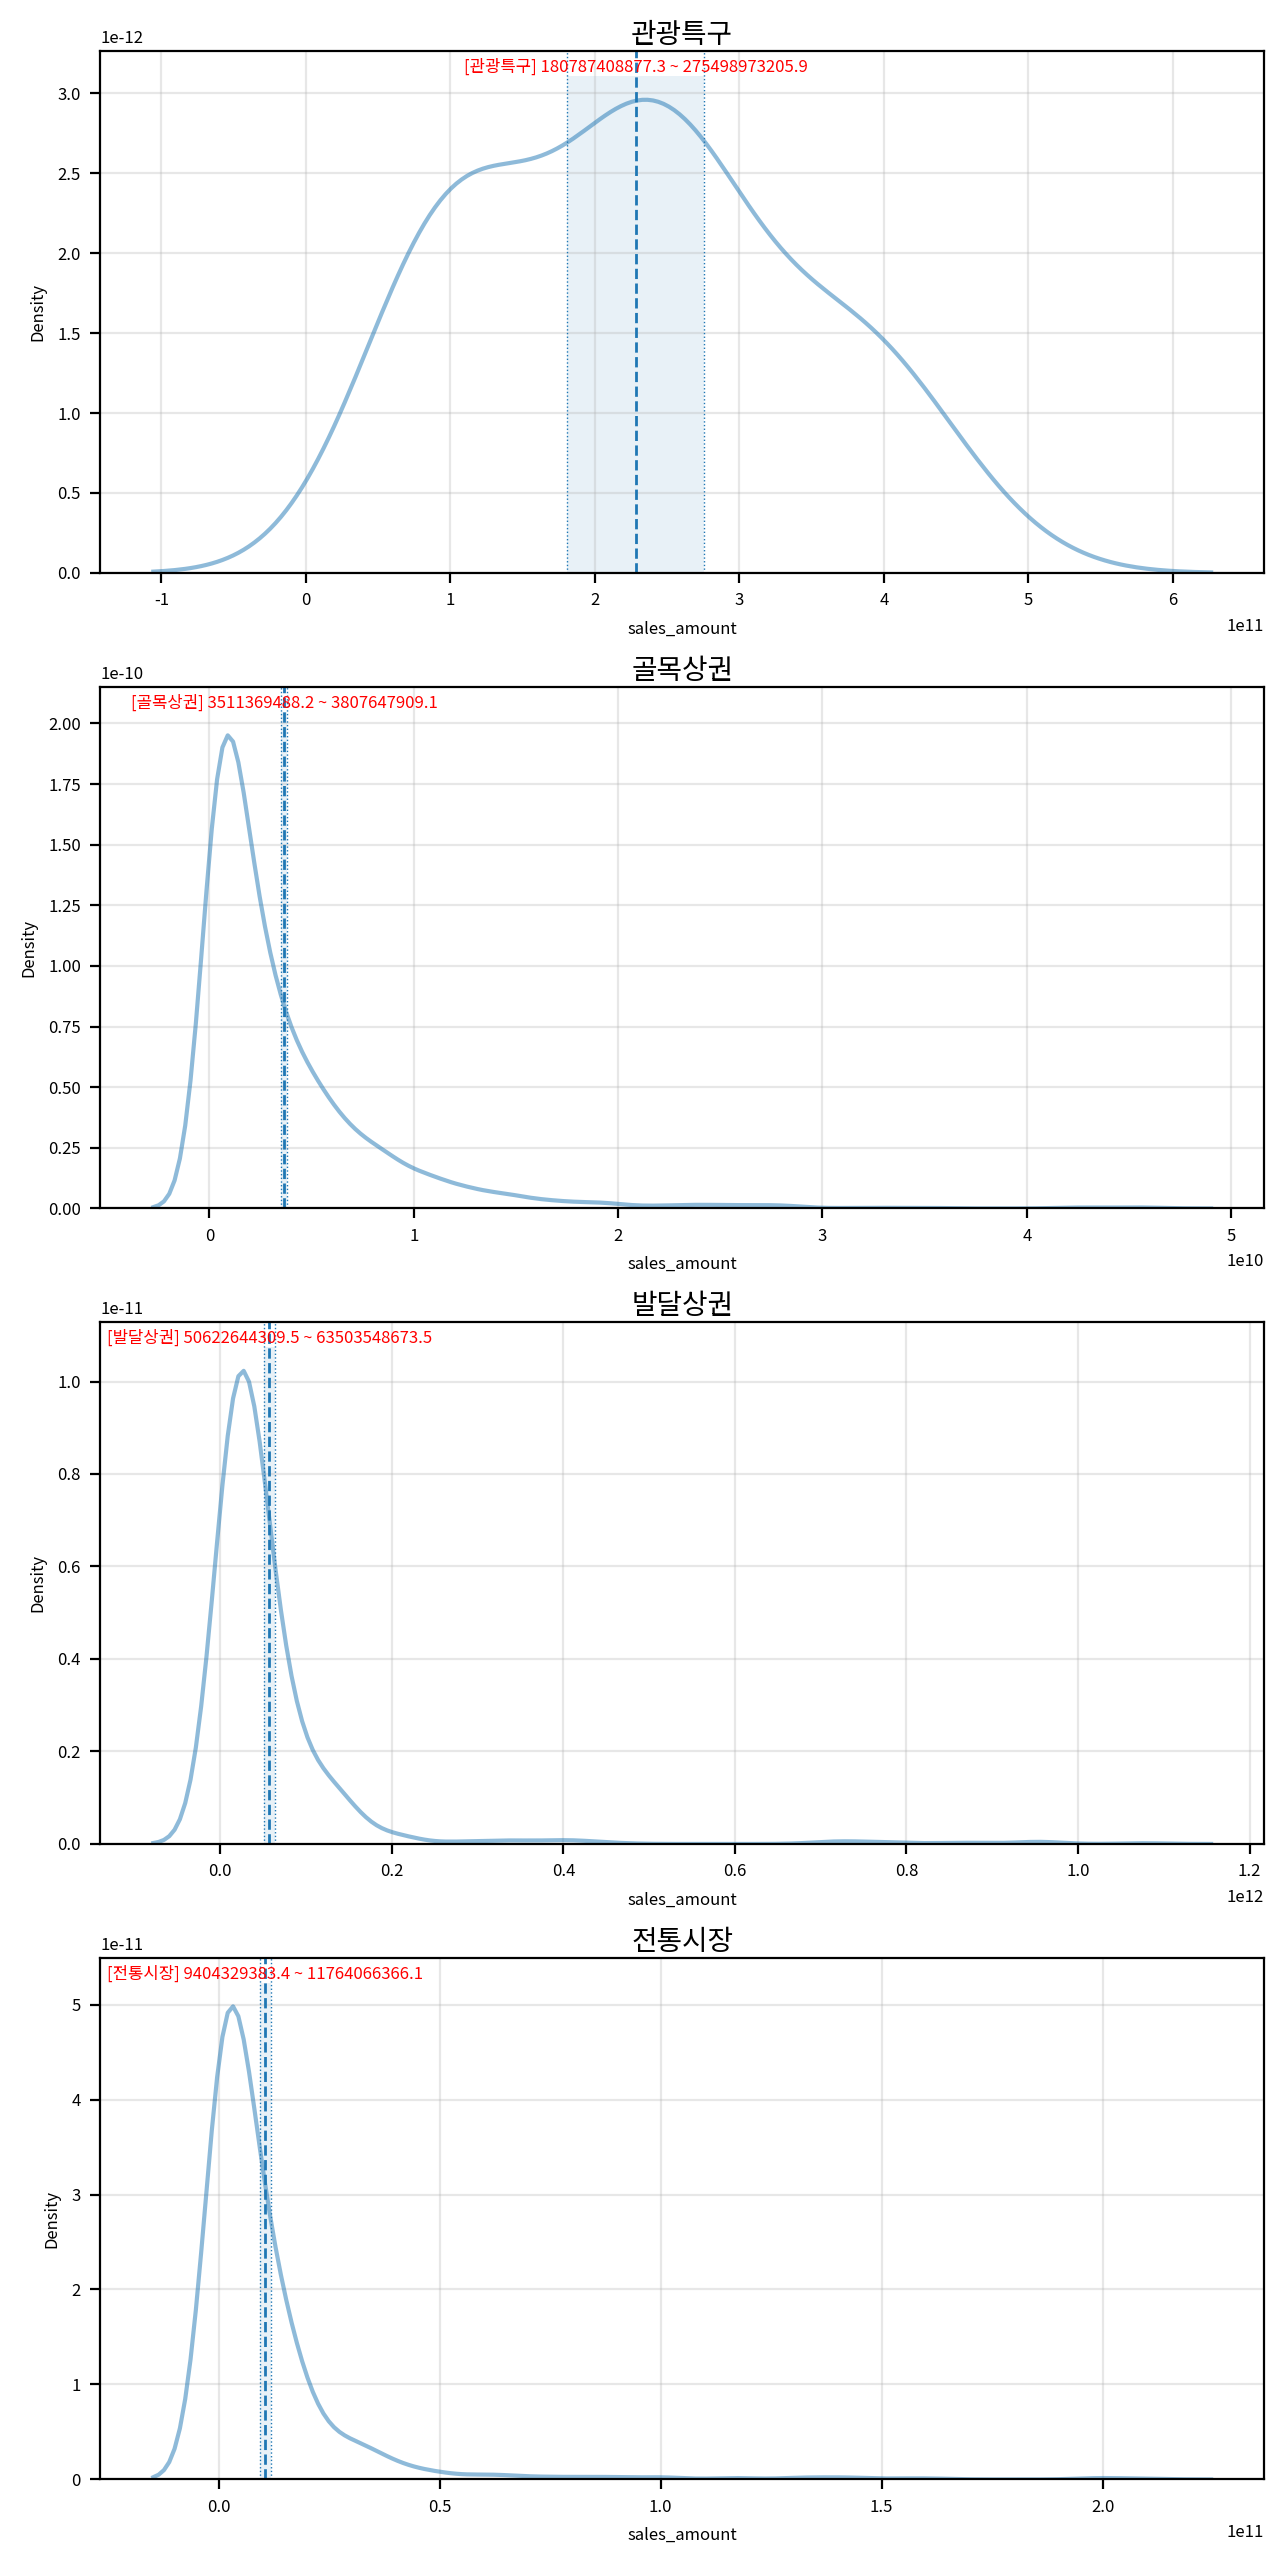

== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==


,statistic,p-value,result
field,,,
골목상권,2949.769498,0.000000e+00,False
관광특구,2.023450,3.635912e-01,True
발달상권,1174.363632,9.776365e-256,False
전통시장,1194.779826,3.604601e-260,False
Levene,268.725277,5.300718e-164,False


,Source,ddof1,ddof2,F,p-unc,np2
0,type,3,110.238825,161.432719,3.495920e-40,0.228001


statistic: 161.433, p-value: 0.000, 대립가설 채택

=== Games-Howell ===


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,골목상권,관광특구,3.659509e+09,2.281432e+11,-2.244837e+11,2.289216e+10,-9.806138,23.000501,6.410146e-09,-23.206979
1,골목상권,발달상권,3.659509e+09,5.706310e+10,-5.340359e+10,3.282878e+09,-16.267309,996.054989,7.271961e-14,-1.160433
2,골목상권,전통시장,3.659509e+09,1.058420e+10,-6.924689e+09,6.060559e+08,-11.425826,1143.188337,0.000000e+00,-0.679464
3,관광특구,발달상권,2.281432e+11,5.706310e+10,1.710801e+11,2.312611e+10,7.397704,23.954998,7.128281e-07,1.647276
4,관광특구,전통시장,2.281432e+11,1.058420e+10,2.175590e+11,2.289993e+10,9.500421,23.031751,1.140238e-08,8.536768
5,발달상권,전통시장,5.706310e+10,1.058420e+10,4.647890e+10,3.336641e+09,13.929848,1061.849622,3.926859e-13,0.638976


In [38]:
df=origin.copy()

# 확인할 데이터

field='sales_amount'
hue_field='type'
hue_values=df[hue_field].unique()
hue_count=len(hue_values)

width_px=1280
height_px=640*hue_count
rows=hue_count
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for i, v in enumerate(hue_values):
    temp=df[df[hue_field]==v]
    
    sb.kdeplot(data=temp, x=field, fill=False, alpha=0.5, ax=ax[i])
    ax[i].grid(True, alpha=0.3)
    ax[i].set_title(v, fontsize=10, pad=3)

    # 신뢰구간
    max=temp[field].max()
    clevel=0.95
    dof=len(temp[field])-1
    sp_mean=temp[field].mean()
    sp_std=temp[field].std(ddof=1)
    sp_std_error=sp_std/sqrt(len(temp[field]))
    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax[i].axvline(cmin, linestyle=':', linewidth=0.5)
    ax[i].axvline(cmax, linestyle=':', linewidth=0.5)
    
    # 평균 표시
    ymin, ymax=ax[i].get_ylim()
    ax[i].fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax[i].axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax[i].text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s='[%s] %0.1f ~ %0.1f'%(v, cmin, cmax),
            horizontalalignment='center',
            verticalalignment='bottom',
            fontdict={'size':6, 'color':'red'})

plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

groups=[(name, grp[field]) for name, grp in df.groupby(hue_field)]

equal_var_fields=[]
normal_dist=True
report=[]

for name, series in groups:
    s, p=normaltest(series)

    normalize=(p>0.05)
    report.append({
        'field':name,
        'statistic':s,
        'p-value':p,
        'result':normalize
    })
    normal_dist=normal_dist and normalize

if normal_dist:
    n='Bartlett'
    s, p=bartlett(*[s.values for _, s in groups])
    homos=(p>0.05)
    if homos:
        print('== 이 데이터는 정규성과 등분산성을 모두 만족한다. ==')
    else:
        print('== 이 데이터는 정규성은 만족하지만, 등분산성을 만족하지 못한다 ==')
else:
    n='Levene'
    s, p=levene(*[s.values for _, s in groups], center='median')
    homos=(p>0.05)
    if homos:
        print('== 이 데이터는 정규성은 만족하지 못하지만, 등분산성은 만족한다. ==')
    else:
        print('== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==')

equal_var=p>0.05
report.append({
    'field':n,
    'statistic':s,
    'p-value':p,
    'result':equal_var
})

report_df=DataFrame(report).set_index('field')
display(report_df)

anova_df=origin[[field, hue_field]].copy()

if equal_var:
    pg_anova=anova(data=anova_df, dv=field, between=hue_field)
else:
    pg_anova=welch_anova(data=anova_df, dv=field, between=hue_field)

f_val=pg_anova['F'].iloc[0]
p_val=pg_anova['p-unc'].iloc[0]
if equal_var:
    pg_anova=anova(data=anova_df, dv='sales_amount', between='type')
else:
    pg_anova=welch_anova(data=anova_df, dv='sales_amount', between='type')
display(pg_anova)
print('statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(f_val, p_val, '대립' if p_val<=0.05 else '귀무'))

if equal_var:
    print('\n=== Tukey HSD ===')
    hoc_df=pairwise_tukey(data=anova_df, dv='sales_amount', between='type')
else:
    print('\n=== Games-Howell ===')
    hoc_df=pairwise_gameshowell(data=anova_df, dv='sales_amount', between='type')

display(hoc_df)

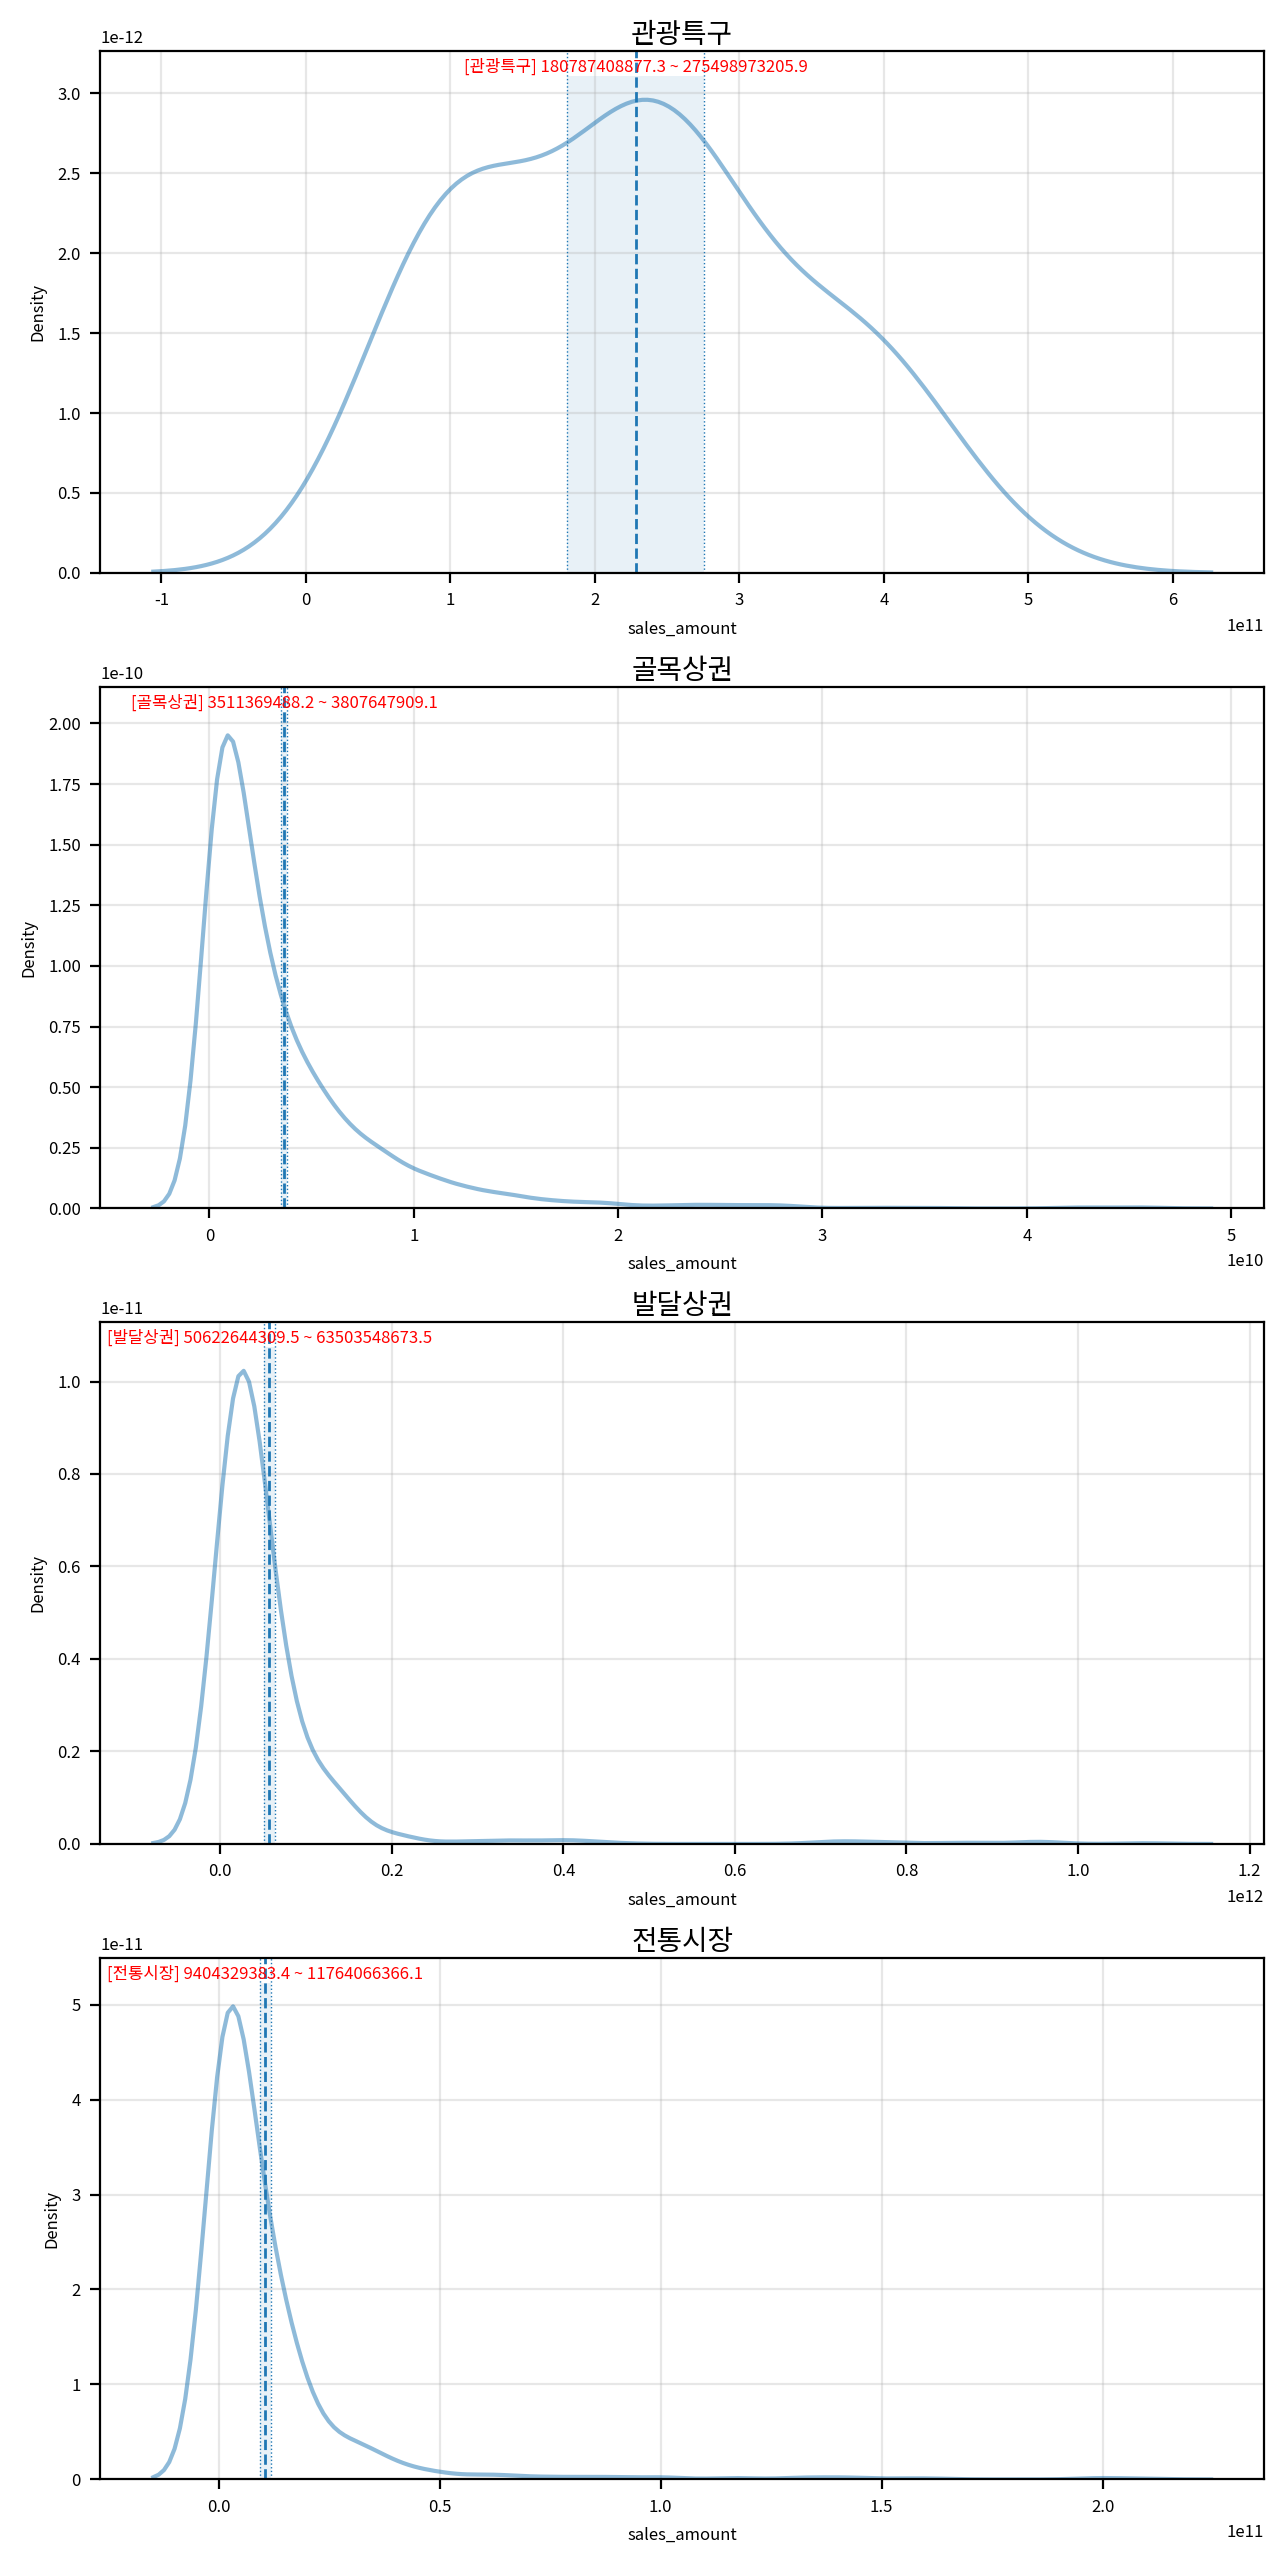

== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==


,statistic,p-value,result
field,,,
골목상권,2949.769498,0.000000e+00,False
관광특구,2.023450,3.635912e-01,True
발달상권,1174.363632,9.776365e-256,False
전통시장,1194.779826,3.604601e-260,False
Levene,268.725277,5.300718e-164,False


,Source,ddof1,ddof2,F,p-unc,np2
0,type,3,110.238825,161.432719,3.495920e-40,0.228001


statistic: 161.433, p-value: 0.000, 대립가설 채택

=== Games-Howell ===


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,골목상권,관광특구,3.659509e+09,2.281432e+11,-2.244837e+11,2.289216e+10,-9.806138,23.000501,6.410146e-09,-23.206979
1,골목상권,발달상권,3.659509e+09,5.706310e+10,-5.340359e+10,3.282878e+09,-16.267309,996.054989,7.271961e-14,-1.160433
2,골목상권,전통시장,3.659509e+09,1.058420e+10,-6.924689e+09,6.060559e+08,-11.425826,1143.188337,0.000000e+00,-0.679464
3,관광특구,발달상권,2.281432e+11,5.706310e+10,1.710801e+11,2.312611e+10,7.397704,23.954998,7.128281e-07,1.647276
4,관광특구,전통시장,2.281432e+11,1.058420e+10,2.175590e+11,2.289993e+10,9.500421,23.031751,1.140238e-08,8.536768
5,발달상권,전통시장,5.706310e+10,1.058420e+10,4.647890e+10,3.336641e+09,13.929848,1061.849622,3.926859e-13,0.638976


골목상권와(과) 관광특구은(는) pval 값이 0.05보다 작으므로 유의미한 차이가 존재한다.
골목상권와(과) 발달상권은(는) pval 값이 0.05보다 작으므로 유의미한 차이가 존재한다.
골목상권와(과) 전통시장은(는) pval 값이 0.05보다 작으므로 유의미한 차이가 존재한다.
관광특구와(과) 발달상권은(는) pval 값이 0.05보다 작으므로 유의미한 차이가 존재한다.
관광특구와(과) 전통시장은(는) pval 값이 0.05보다 작으므로 유의미한 차이가 존재한다.
발달상권와(과) 전통시장은(는) pval 값이 0.05보다 작으므로 유의미한 차이가 존재한다.


In [42]:
df=origin.copy()

# 확인할 데이터

field='sales_amount'
hue_field='type'
hue_values=df[hue_field].unique()
hue_count=len(hue_values)

width_px=1280
height_px=640*hue_count
rows=hue_count
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for i, v in enumerate(hue_values):
    temp=df[df[hue_field]==v]
    
    sb.kdeplot(data=temp, x=field, fill=False, alpha=0.5, ax=ax[i])
    ax[i].grid(True, alpha=0.3)
    ax[i].set_title(v, fontsize=10, pad=3)

    # 신뢰구간
    max=temp[field].max()
    clevel=0.95
    dof=len(temp[field])-1
    sp_mean=temp[field].mean()
    sp_std=temp[field].std(ddof=1)
    sp_std_error=sp_std/sqrt(len(temp[field]))
    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax[i].axvline(cmin, linestyle=':', linewidth=0.5)
    ax[i].axvline(cmax, linestyle=':', linewidth=0.5)
    
    # 평균 표시
    ymin, ymax=ax[i].get_ylim()
    ax[i].fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax[i].axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax[i].text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s='[%s] %0.1f ~ %0.1f'%(v, cmin, cmax),
            horizontalalignment='center',
            verticalalignment='bottom',
            fontdict={'size':6, 'color':'red'})

plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

groups=[(name, grp[field]) for name, grp in df.groupby(hue_field)]

equal_var_fields=[]
normal_dist=True
report=[]

for name, series in groups:
    s, p=normaltest(series)

    normalize=(p>0.05)
    report.append({
        'field':name,
        'statistic':s,
        'p-value':p,
        'result':normalize
    })
    normal_dist=normal_dist and normalize

if normal_dist:
    n='Bartlett'
    s, p=bartlett(*[s.values for _, s in groups])
    homos=(p>0.05)
    if homos:
        print('== 이 데이터는 정규성과 등분산성을 모두 만족한다. ==')
    else:
        print('== 이 데이터는 정규성은 만족하지만, 등분산성을 만족하지 못한다 ==')
else:
    n='Levene'
    s, p=levene(*[s.values for _, s in groups], center='median')
    homos=(p>0.05)
    if homos:
        print('== 이 데이터는 정규성은 만족하지 못하지만, 등분산성은 만족한다. ==')
    else:
        print('== 이 데이터는 정규성과 등분산성을 모두 만족하지 못한다. ==')

equal_var=p>0.05
report.append({
    'field':n,
    'statistic':s,
    'p-value':p,
    'result':equal_var
})

report_df=DataFrame(report).set_index('field')
display(report_df)

anova_df=origin[[field, hue_field]].copy()

if equal_var:
    pg_anova=anova(data=anova_df, dv=field, between=hue_field)
else:
    pg_anova=welch_anova(data=anova_df, dv=field, between=hue_field)

f_val=pg_anova['F'].iloc[0]
p_val=pg_anova['p-unc'].iloc[0]
if equal_var:
    pg_anova=anova(data=anova_df, dv='sales_amount', between='type')
else:
    pg_anova=welch_anova(data=anova_df, dv='sales_amount', between='type')
display(pg_anova)
print('statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(f_val, p_val, '대립' if p_val<=0.05 else '귀무'))

if equal_var:
    print('\n=== Tukey HSD ===')
    hoc_df=pairwise_tukey(data=anova_df, dv='sales_amount', between='type')
    display(hoc_df)
    for i in range(0, len(hoc_df)):
        if hoc_df['pval'][i]<0.05:
            print('%s와(과) %s은(는) p-tukey 값이 0.05보다 작으므로 유의미한 차이가 존재한다.'%(hoc_df['A'][i], hoc_df['B'][i]))
        else:
            print('%s와(과) %s은(는) p-tukey 값이 0.05보다 크므로 유의미한 차이가 존재하지 않는다.'%(hoc_df['A'][i], hoc_df['B'][i]))
else:
    print('\n=== Games-Howell ===')
    hoc_df=pairwise_gameshowell(data=anova_df, dv='sales_amount', between='type')
    display(hoc_df)
    for i in range(0, len(hoc_df)):
        if hoc_df['pval'][i]<0.05:
            print('%s와(과) %s은(는) pval 값이 0.05보다 작으므로 유의미한 차이가 존재한다.'%(hoc_df['A'][i], hoc_df['B'][i]))
        else:
            print('%s와(과) %s은(는) pval 값이 0.05보다 크므로 유의미한 차이가 존재하지 않는다.'%(hoc_df['A'][i], hoc_df['B'][i]))